In [1]:
import os

# Change to the parent directory
os.chdir('../..')

# Verify the path using getcwd()
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: c:\Users\onyer\OneDrive\Desktop\Research work\1. Projects\Battery_Analysis1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import src.file_loader as fl
import src.sysid_util as sid
import src.data_processing as dp
import src.plotting as plot
import scipy as sp
import control as ct

ModuleNotFoundError: No module named 'src.sysid_util'

In [ ]:
import importlib
importlib.reload(dp)
importlib.reload(sid)

<module 'src.sysid_util' from 'c:\\Users\\onyer\\OneDrive\\Desktop\\Research work\\1. Projects\\Battery_Analysis1\\src\\sysid_util.py'>

Columns: Index(['flags', 'Ns', 'time/s', 'control/mA', 'Ewe/V', 'I/mA', 'dQ/C',
       '(Q-Qo)/C', 'half cycle', 'Q charge/discharge/mA.h', 'I Range'],
      dtype='object')
Data: 0     0.000000
1    10.000000
2    19.999999
3    29.999999
4    39.999999
Name: time/s, dtype: float64
Columns: Index(['control/mA', 'Ewe/V'], dtype='object')
Data:            control/mA     Ewe/V
time/s                         
0.000000         0.01  0.407403
10.000000        0.01  0.729420
19.999999        0.01  0.746633
29.999999        0.01  0.757071
39.999999        0.01  0.764113


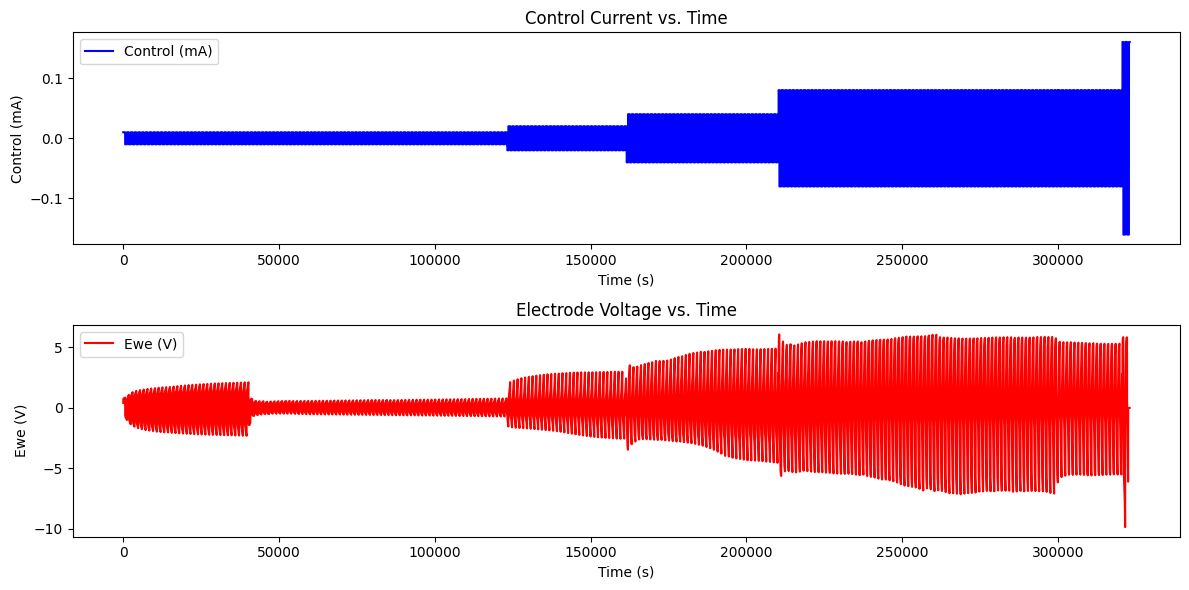

In [ ]:
# Load data
mpr_file4 = fl.load_mpr("12to1-25%CNC-3%GQDs _C01.mpr")
df4 = pd.DataFrame(mpr_file4.data)

# Get columns
print("Columns:", df4.columns)
print("Data:", df4['time/s'].head())

df4 = df4.set_index('time/s')[['control/mA', 'Ewe/V']]

print("Columns:", df4.columns)
print("Data:", df4.head())

# Plotting
plt.figure(figsize=(12, 6))

# Plot 'control/mA'
plt.subplot(2, 1, 1)
plt.plot(df4.index, df4['control/mA'], color='blue', label='Control (mA)')
plt.xlabel('Time (s)')
plt.ylabel('Control (mA)')
plt.title('Control Current vs. Time')
plt.legend()

# Plot 'Ewe/V'
plt.subplot(2, 1, 2)
plt.plot(df4.index, df4['Ewe/V'], color='red', label='Ewe (V)')
plt.xlabel('Time (s)')
plt.ylabel('Ewe (V)')
plt.title('Electrode Voltage vs. Time')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
print(df4['control/mA'].unique())

[ 0.01 -0.01  0.   -0.02  0.02 -0.04  0.04  0.08 -0.08  0.16 -0.16]


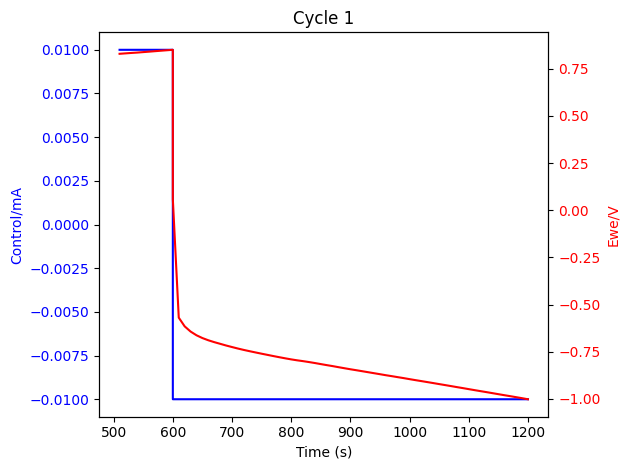

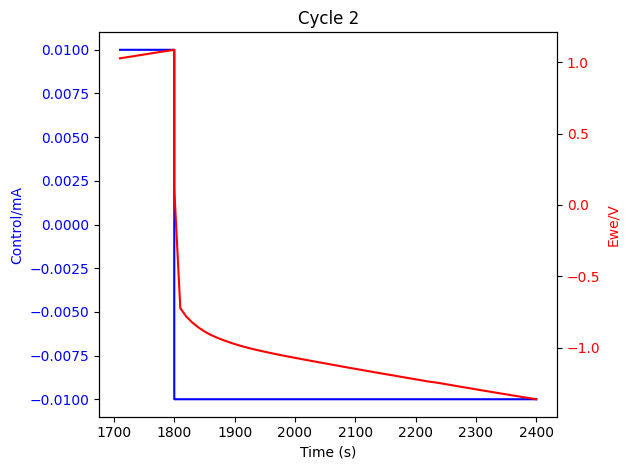

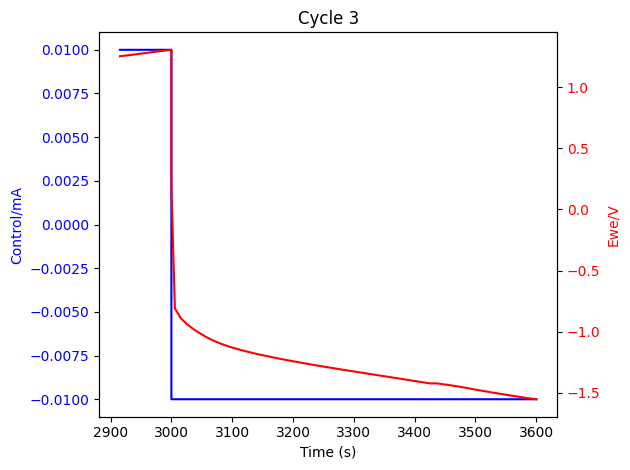

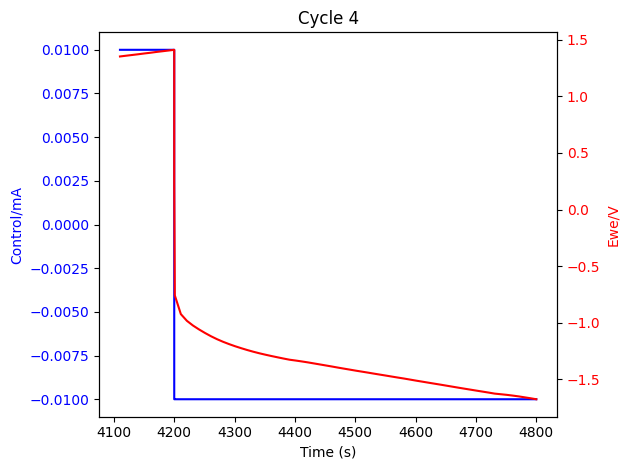

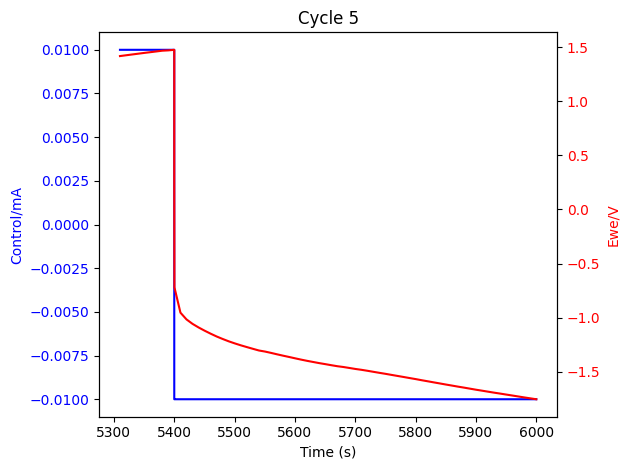

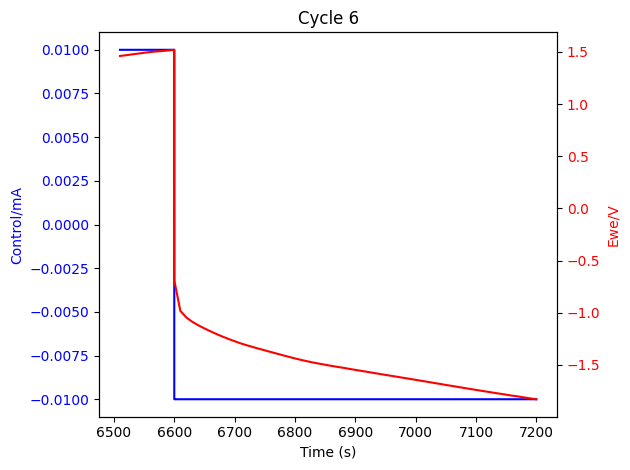

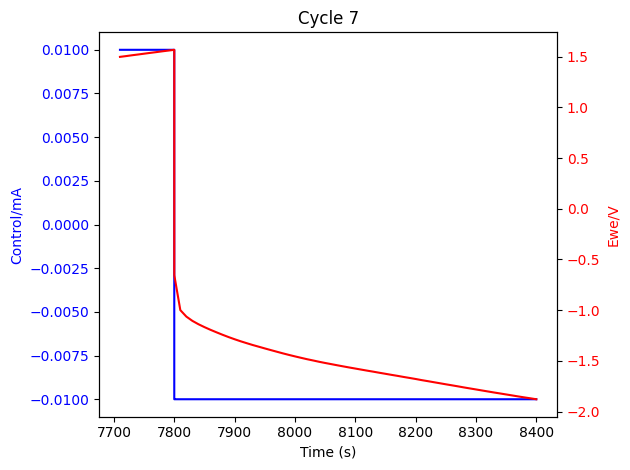

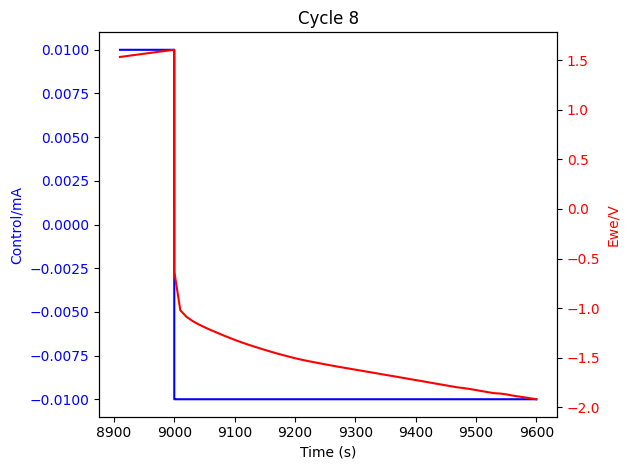

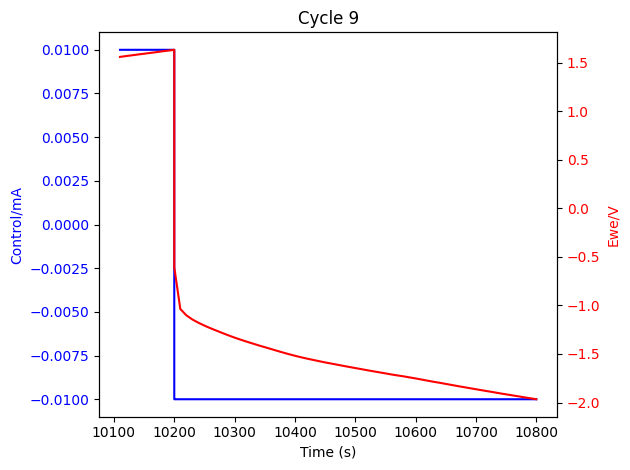

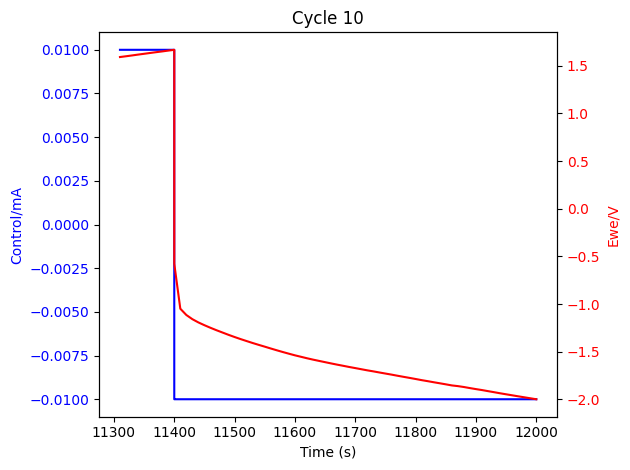

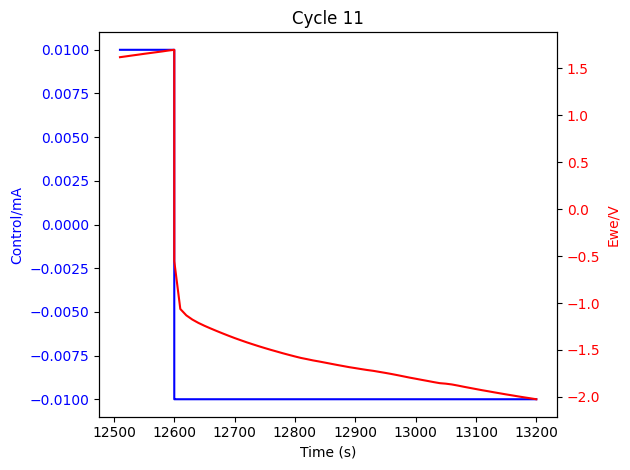

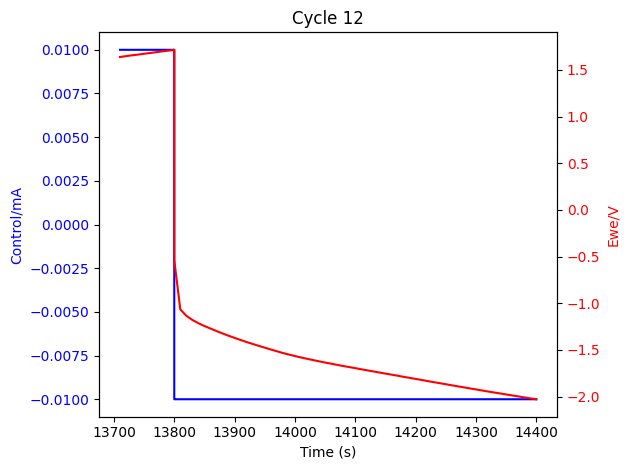

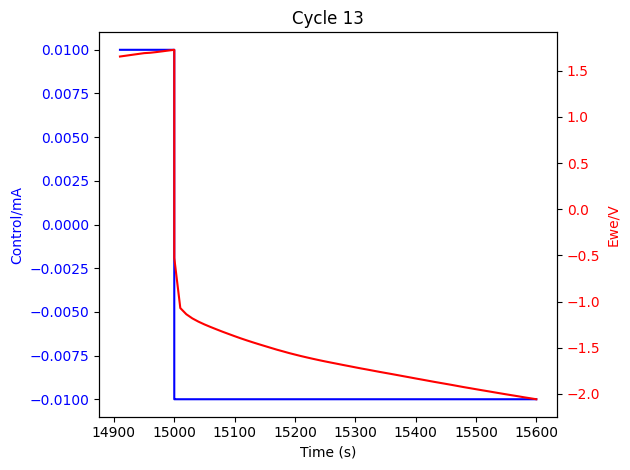

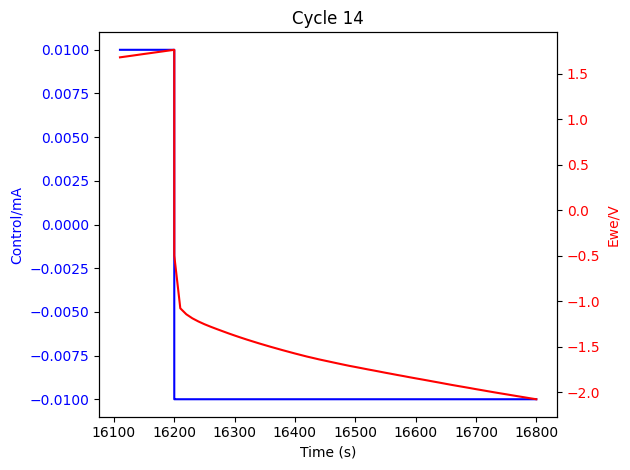

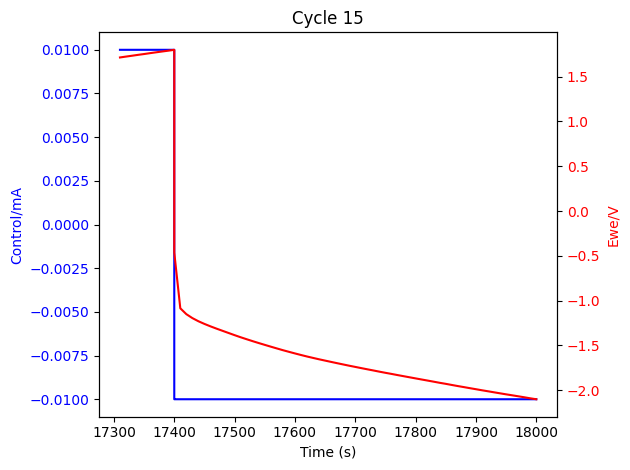

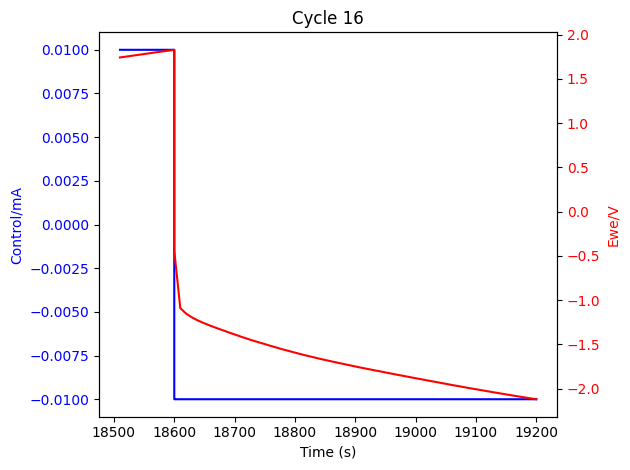

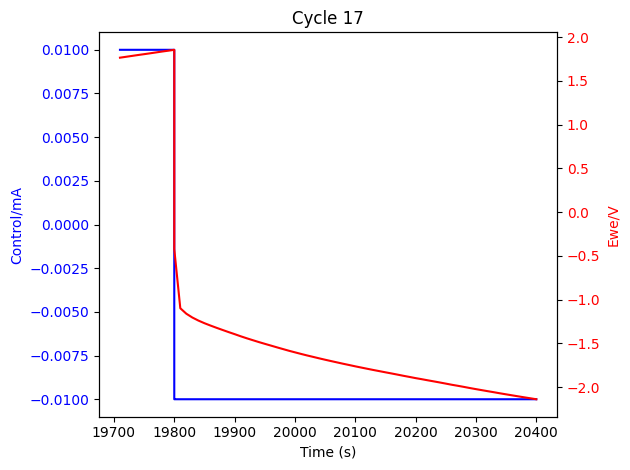

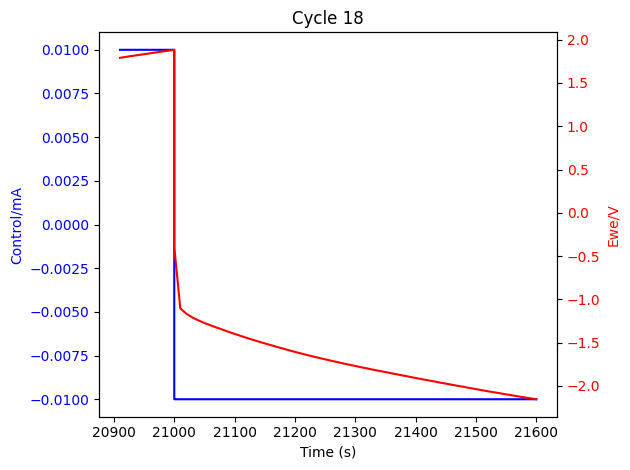

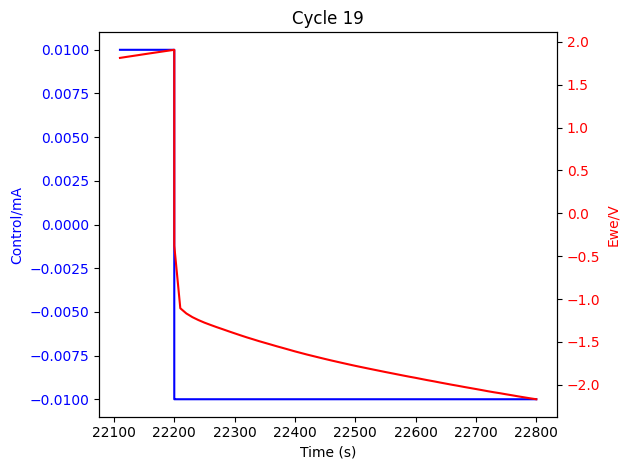

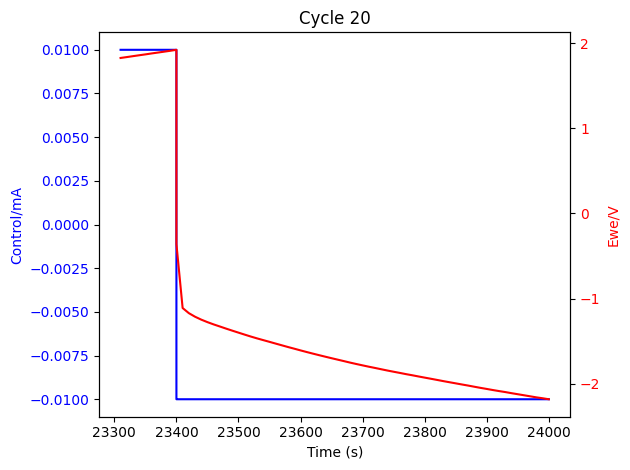

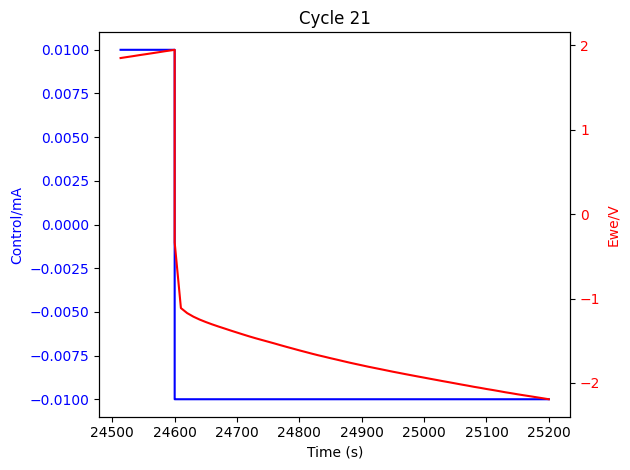

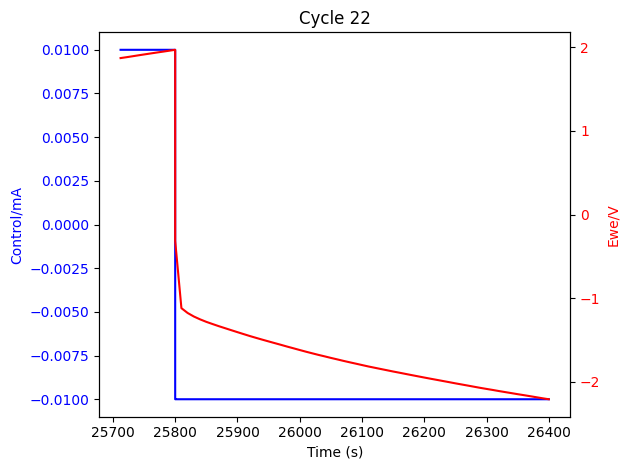

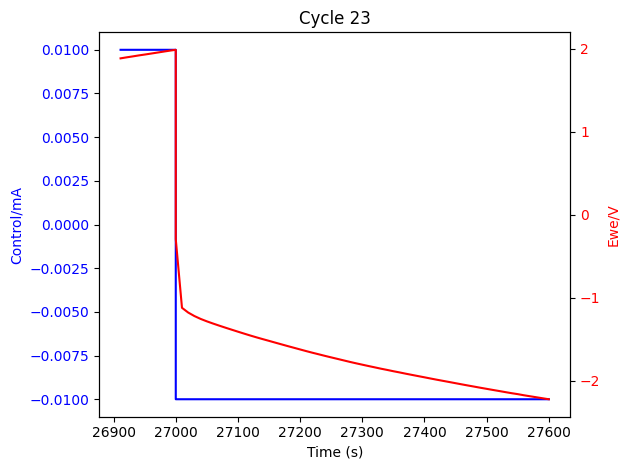

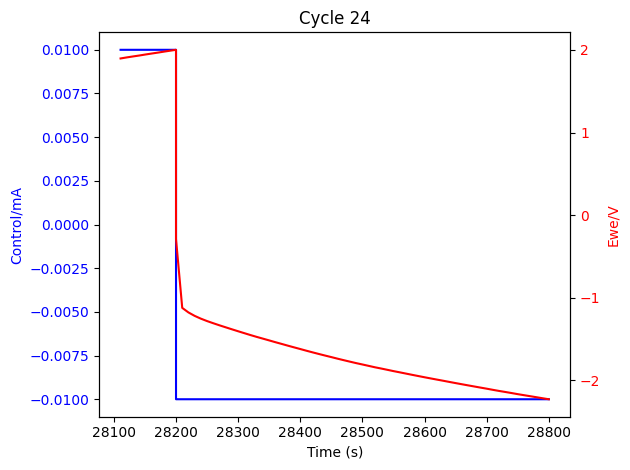

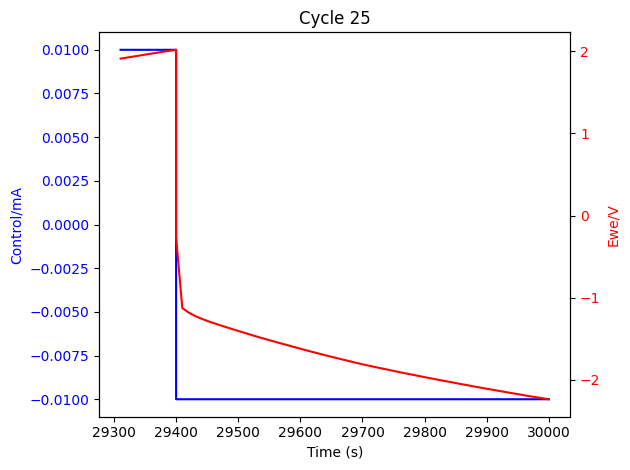

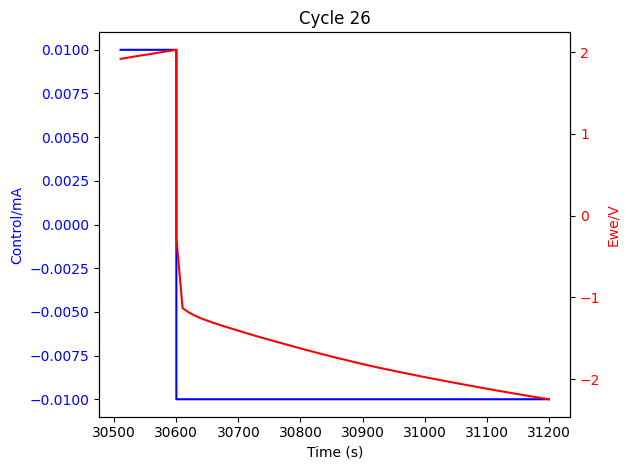

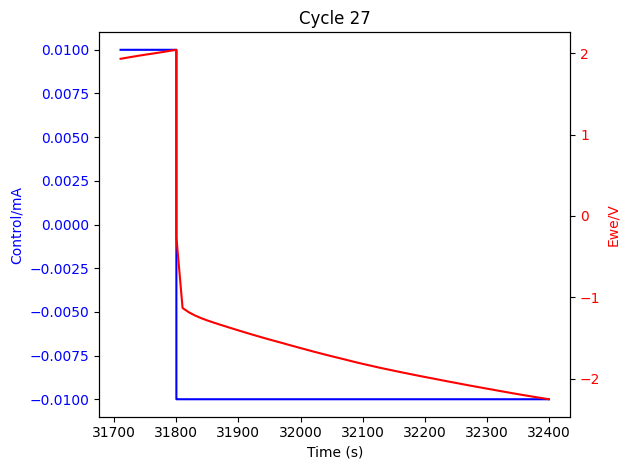

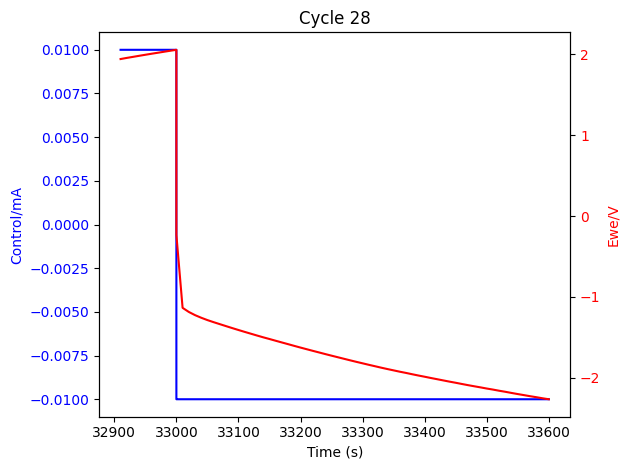

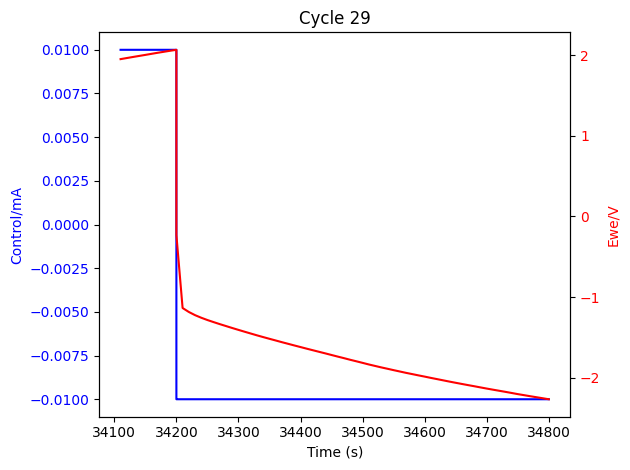

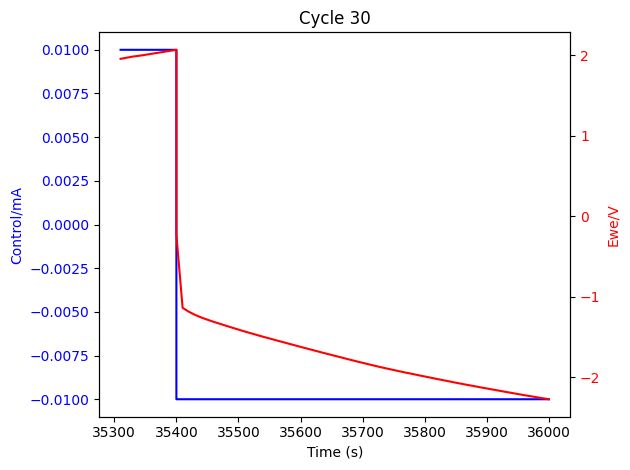

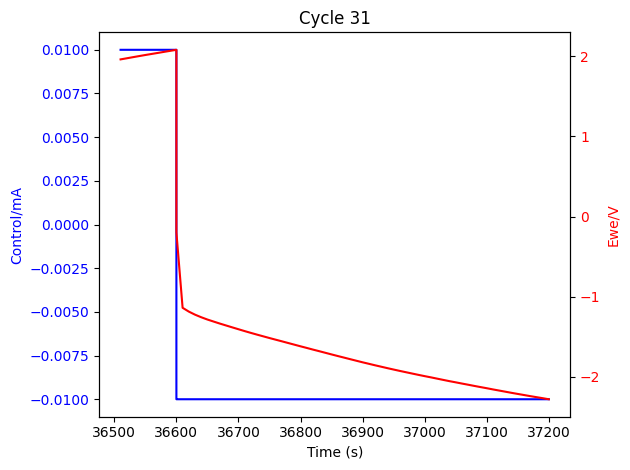

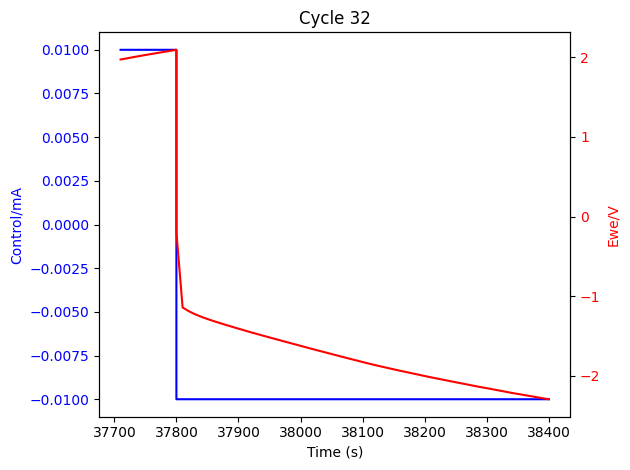

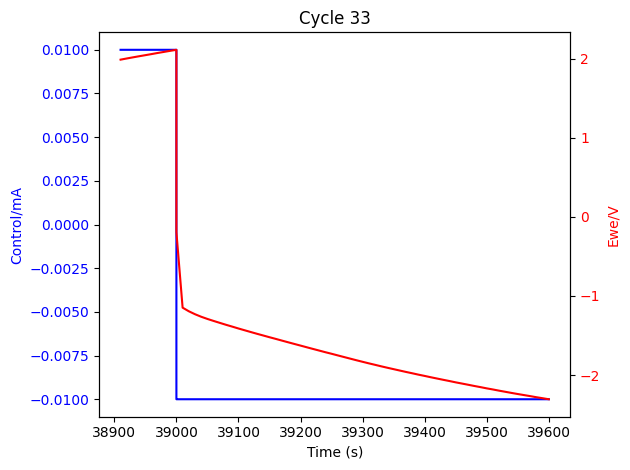

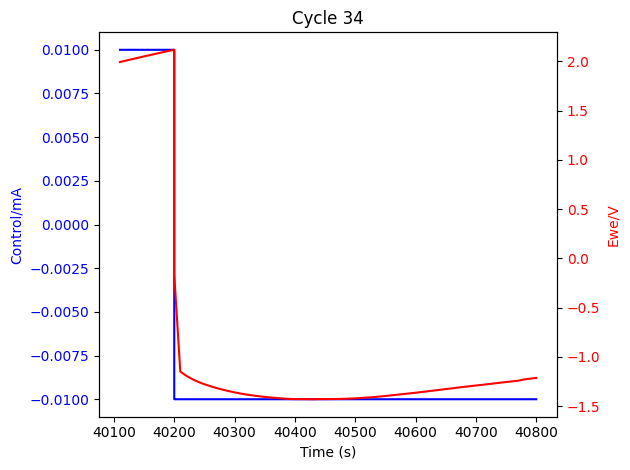

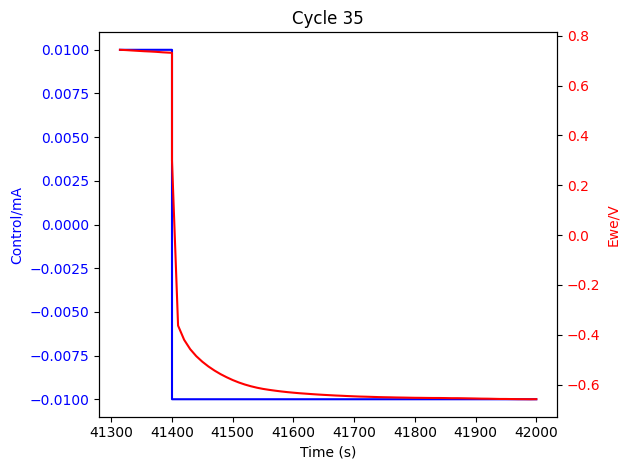

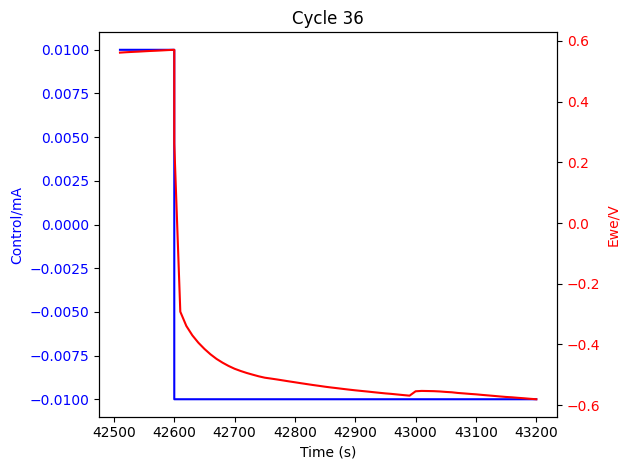

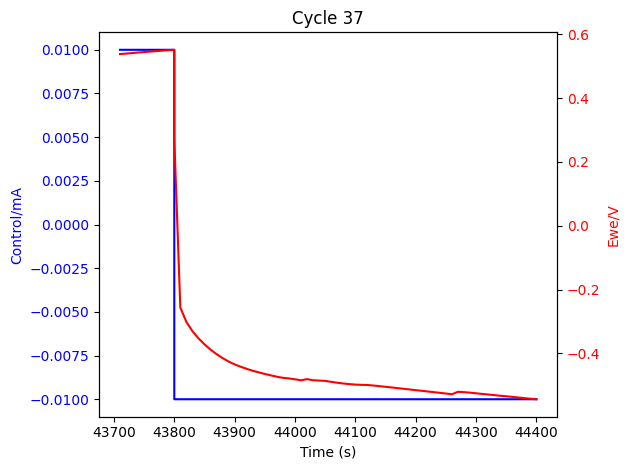

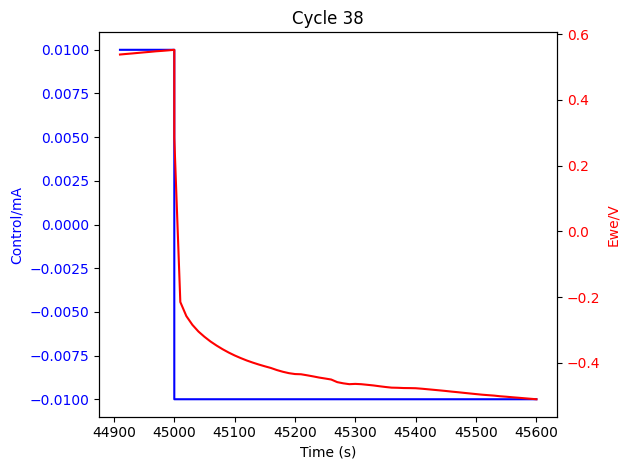

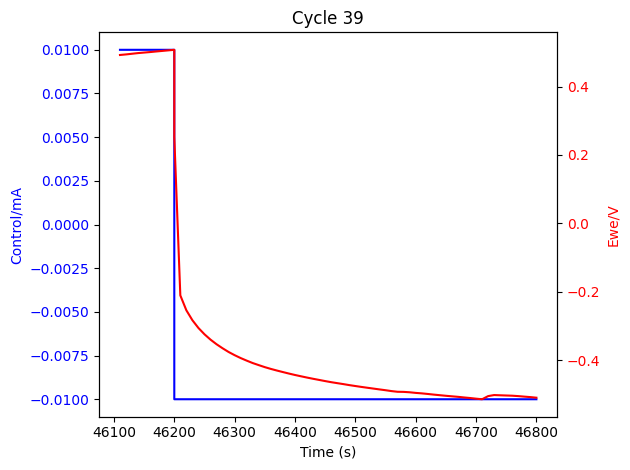

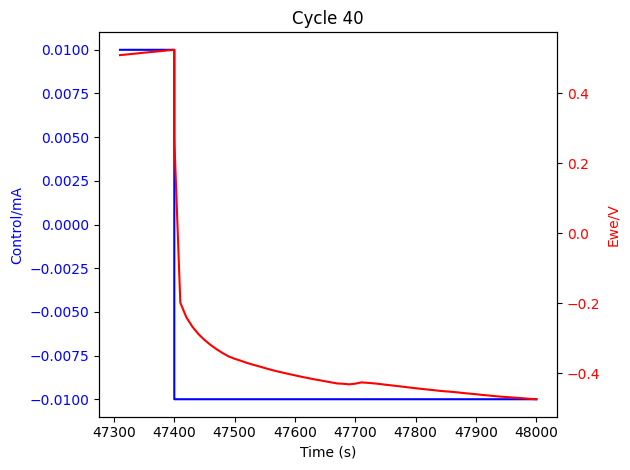

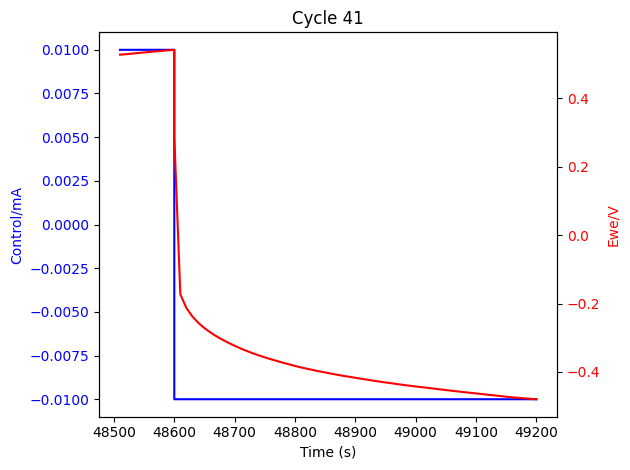

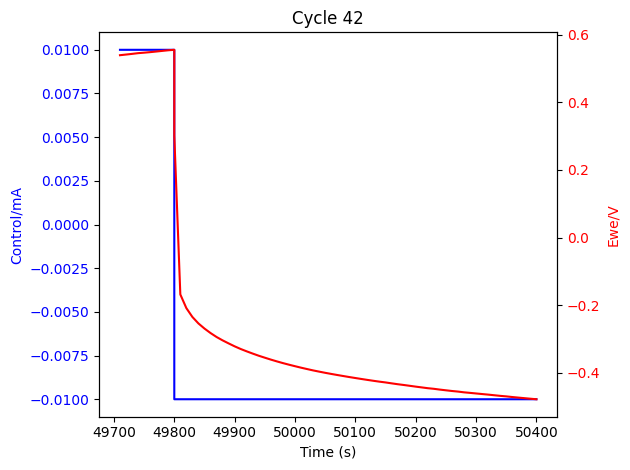

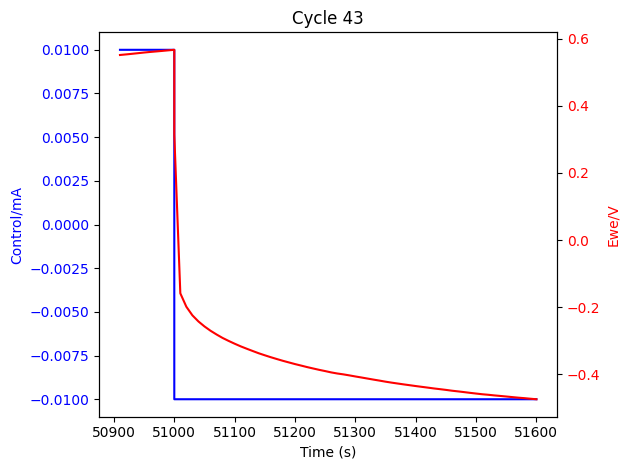

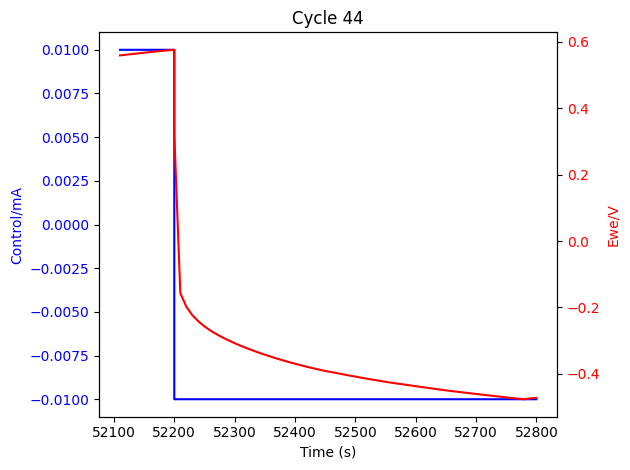

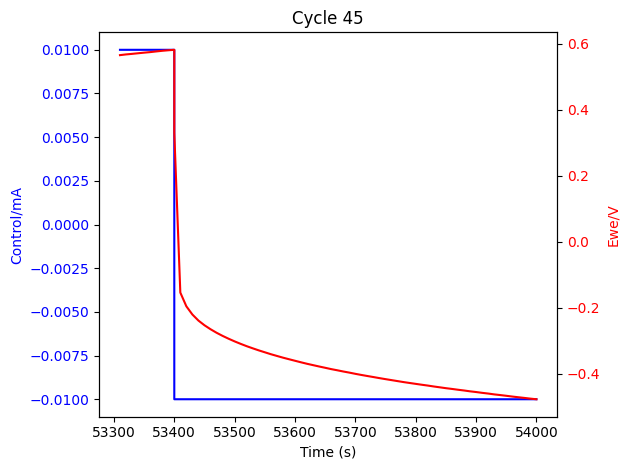

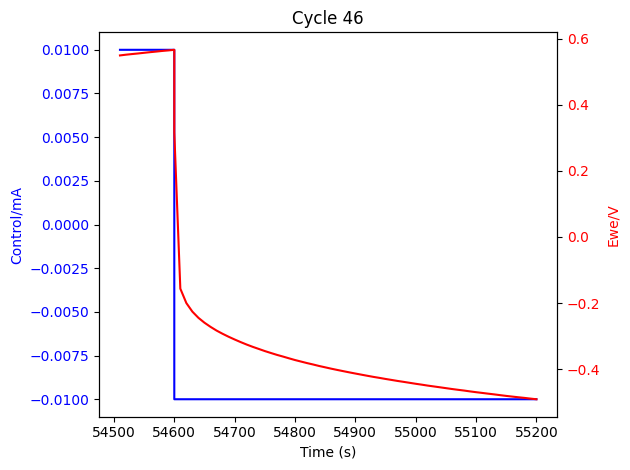

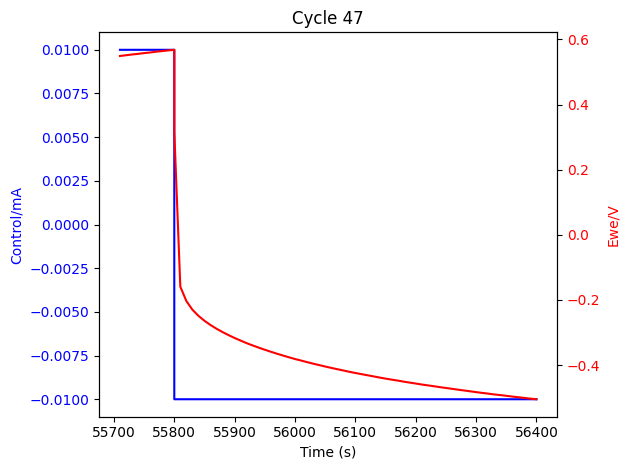

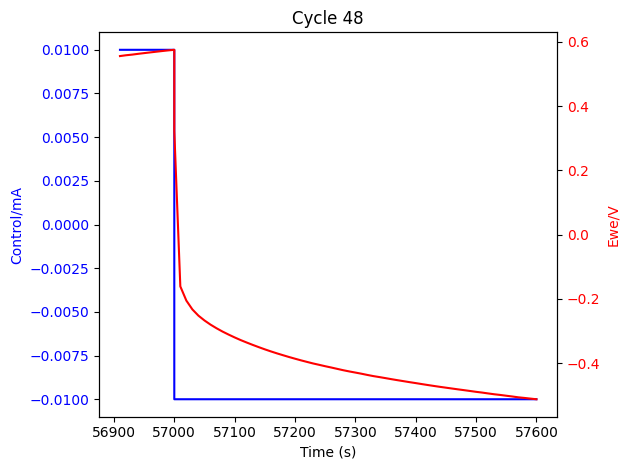

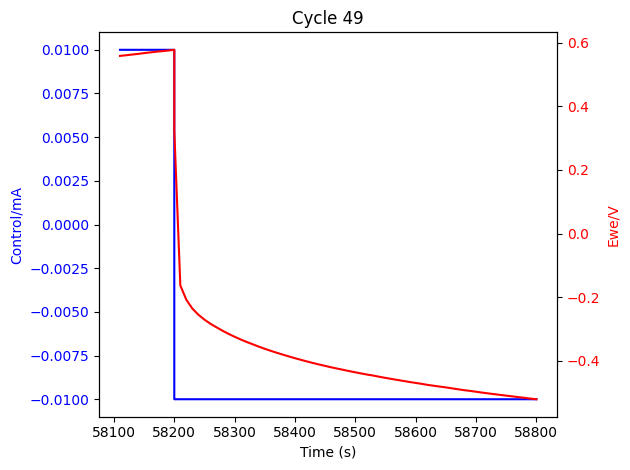

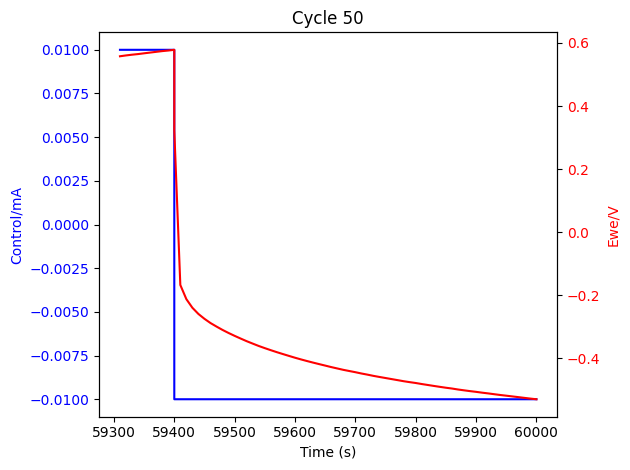

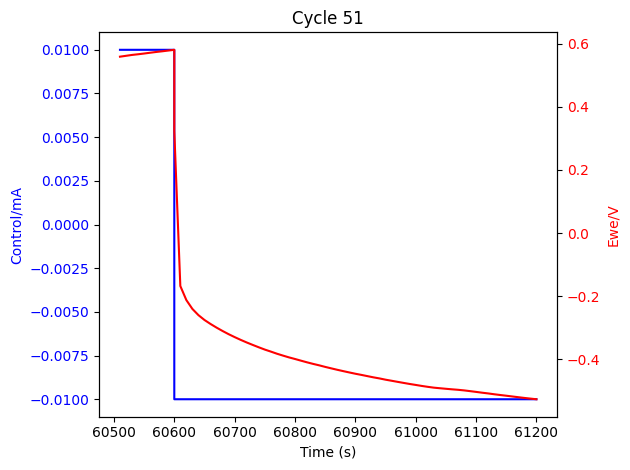

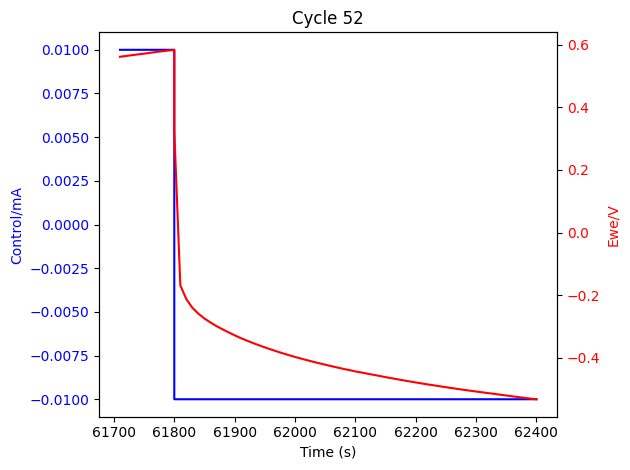

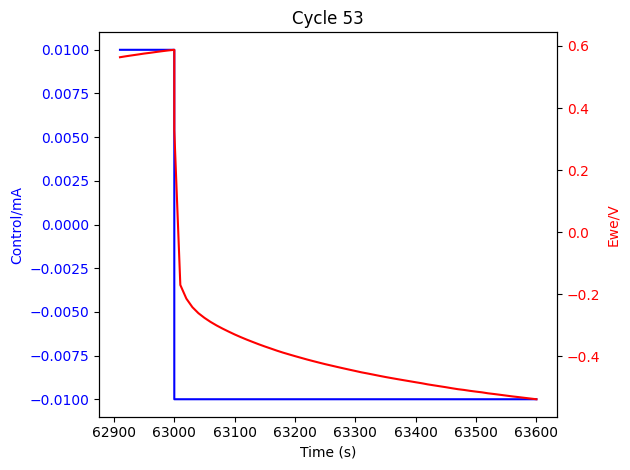

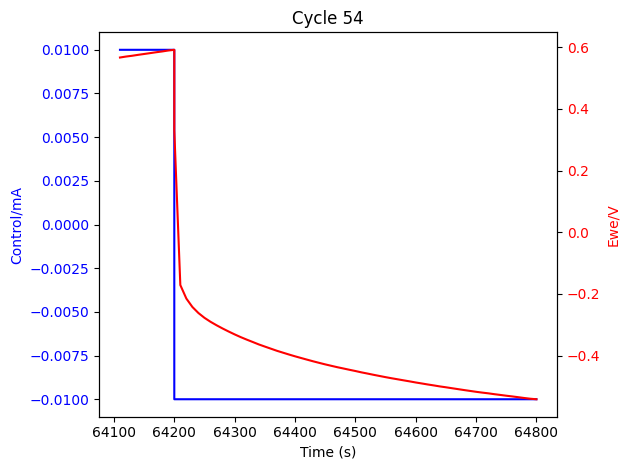

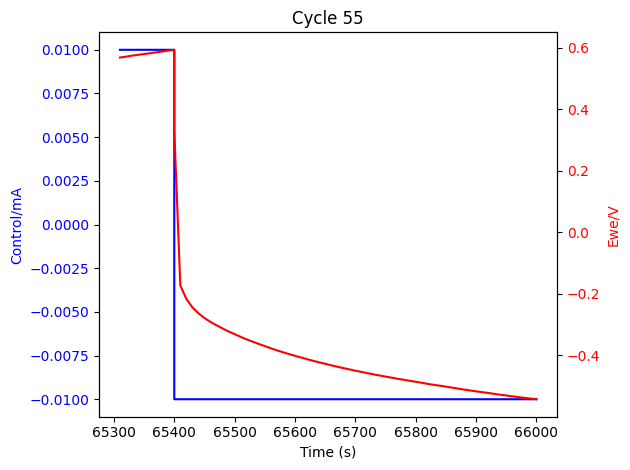

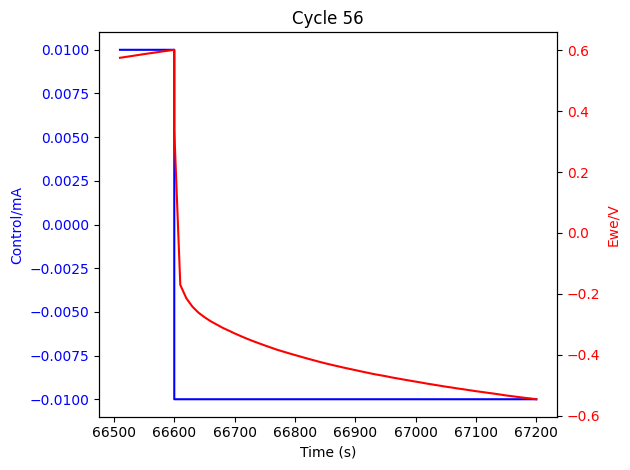

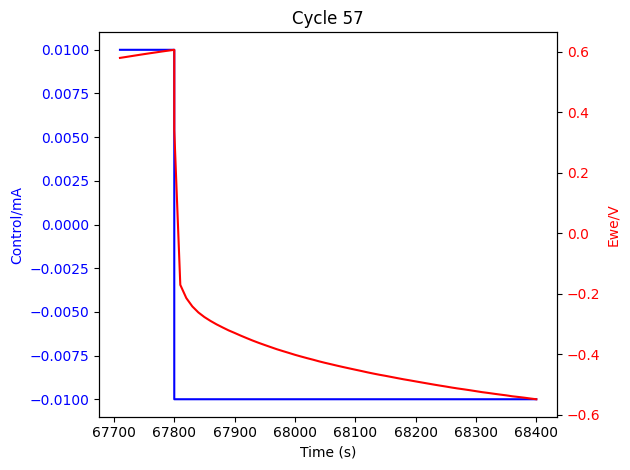

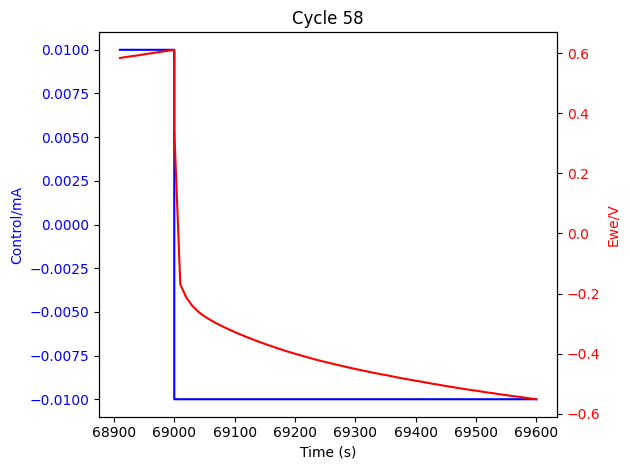

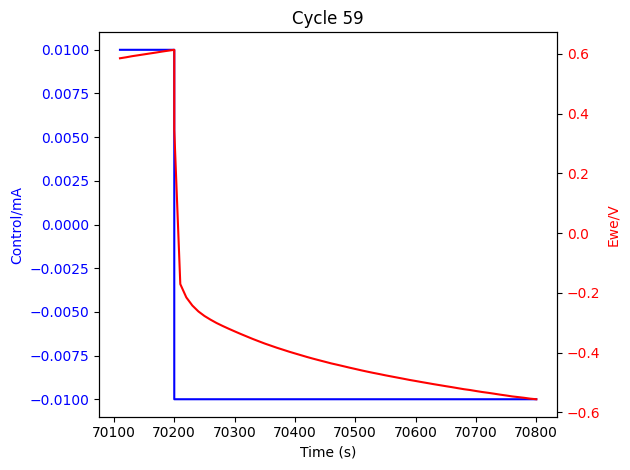

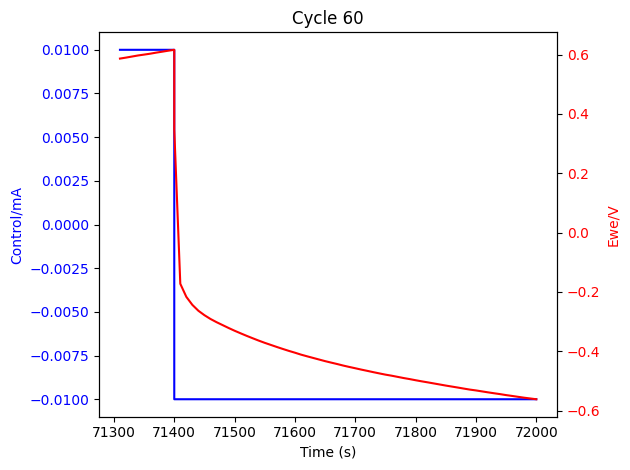

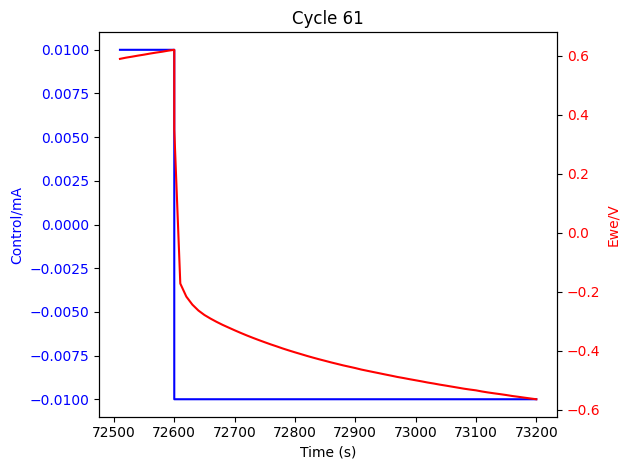

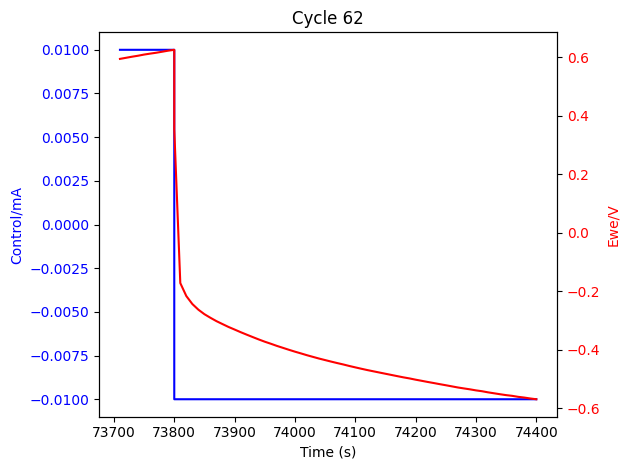

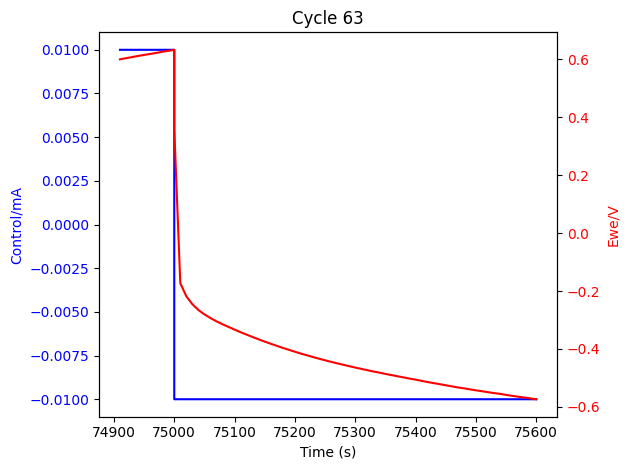

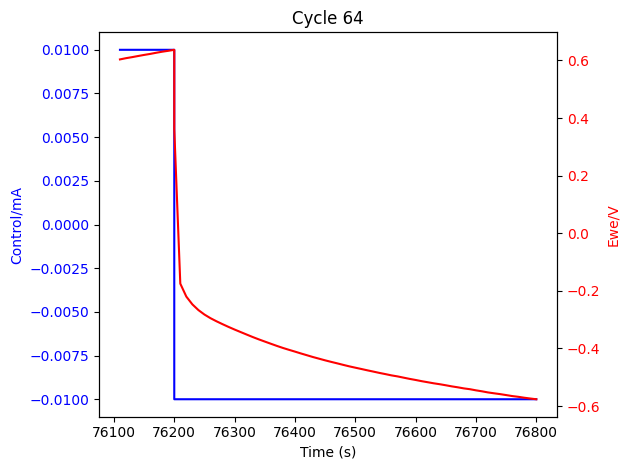

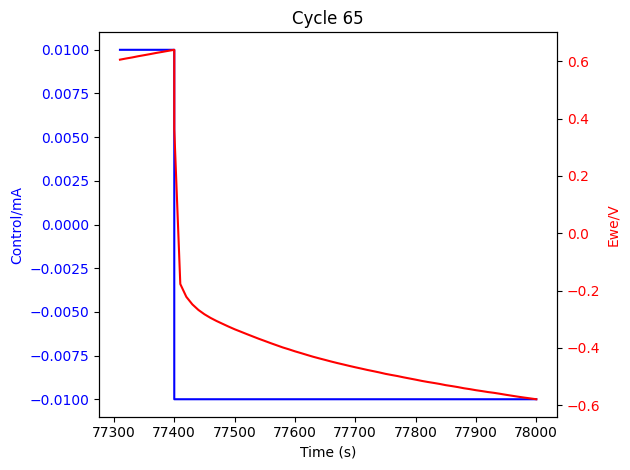

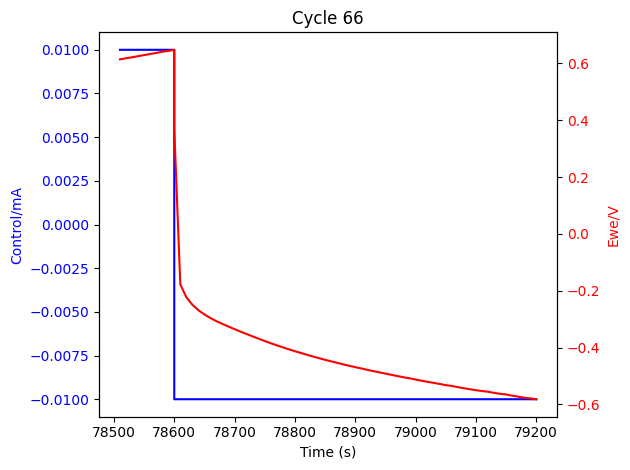

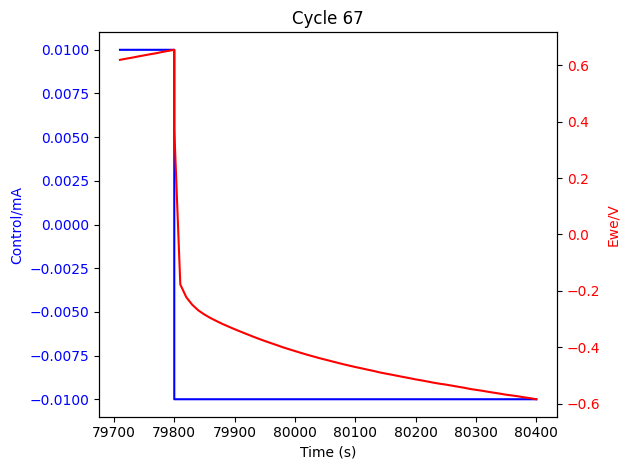

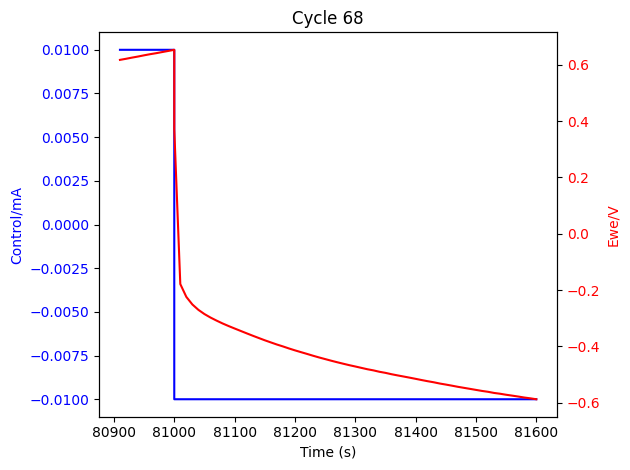

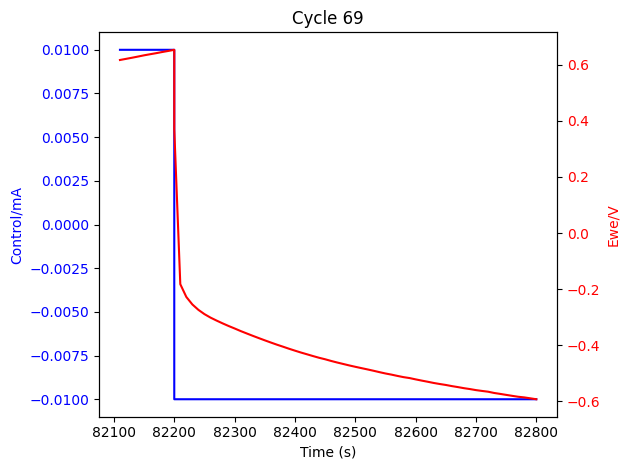

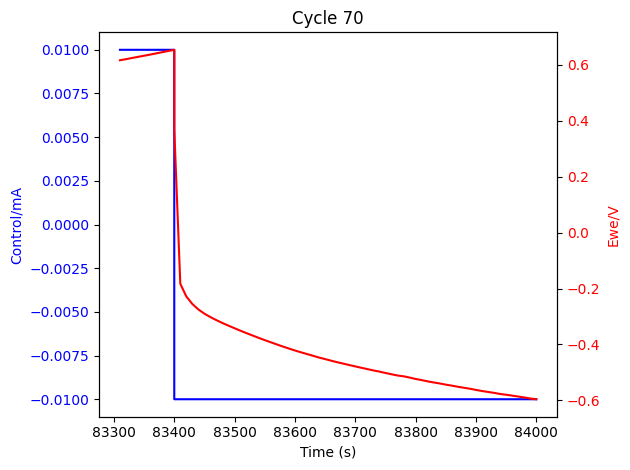

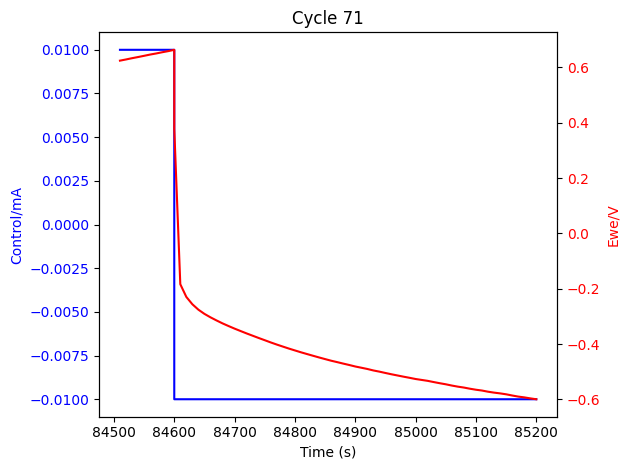

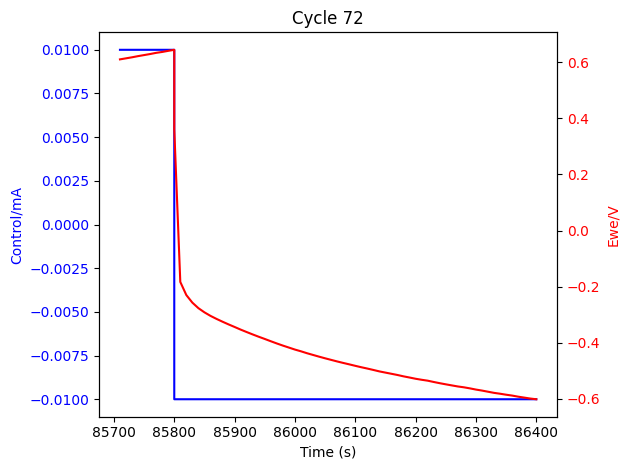

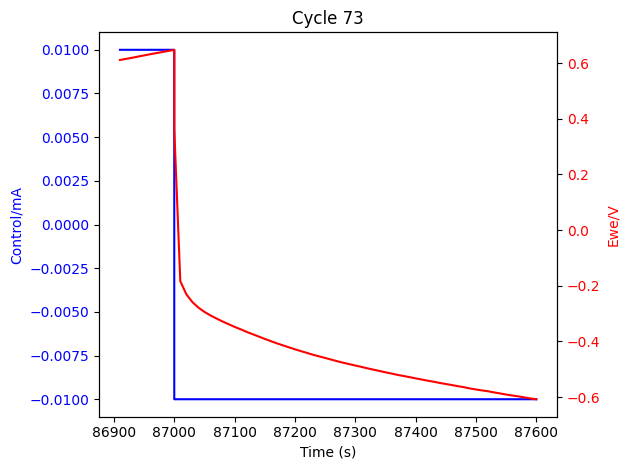

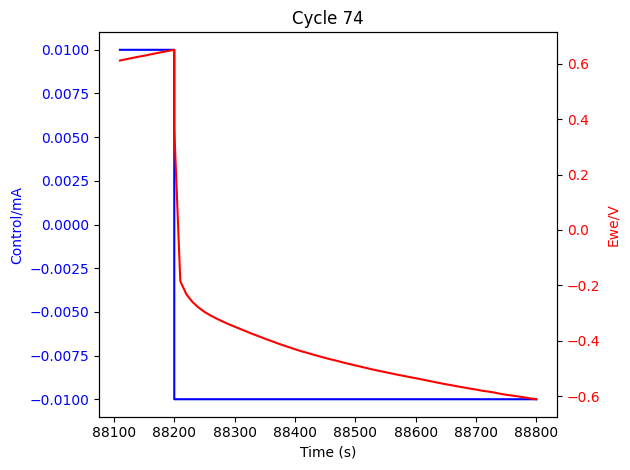

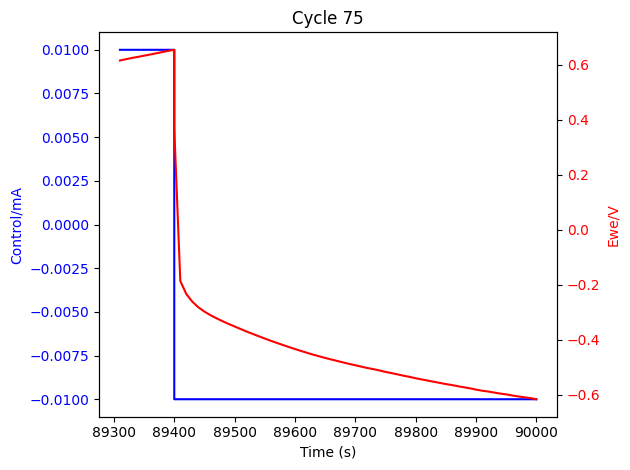

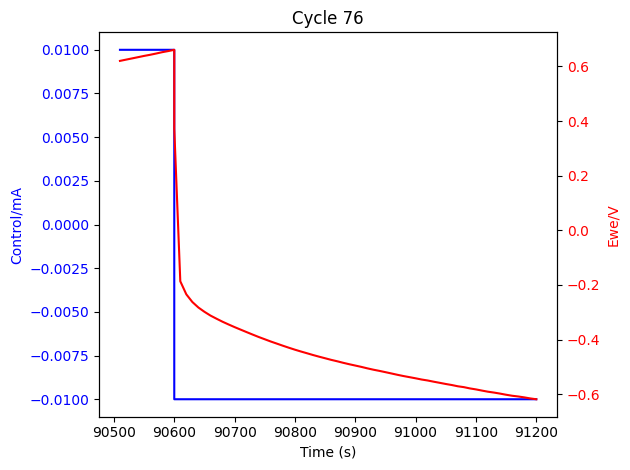

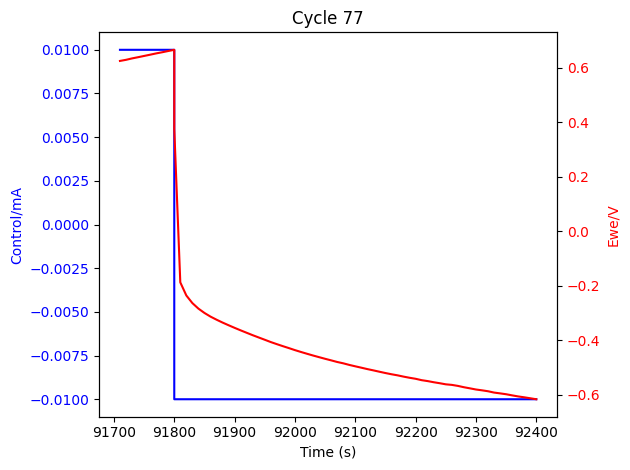

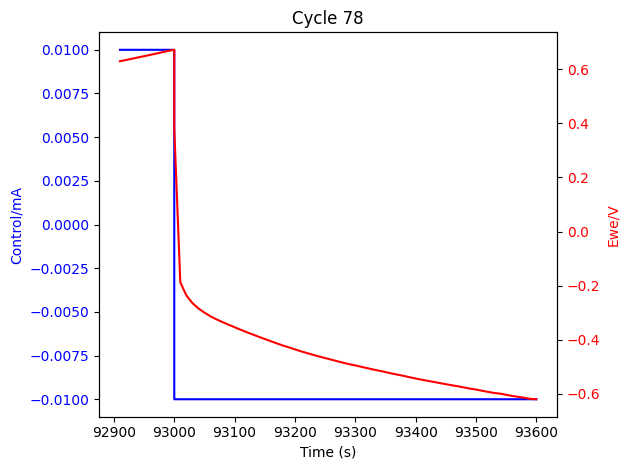

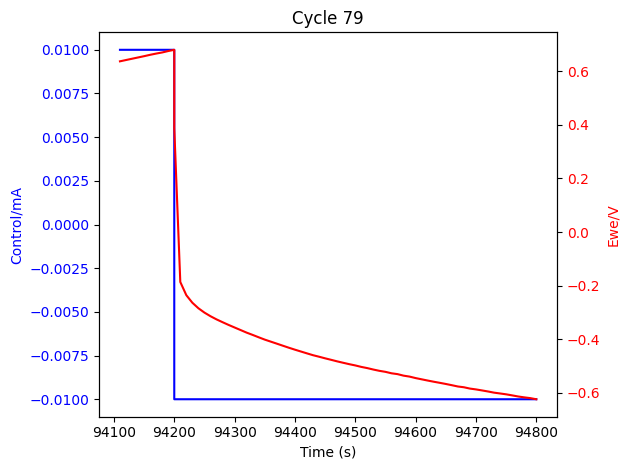

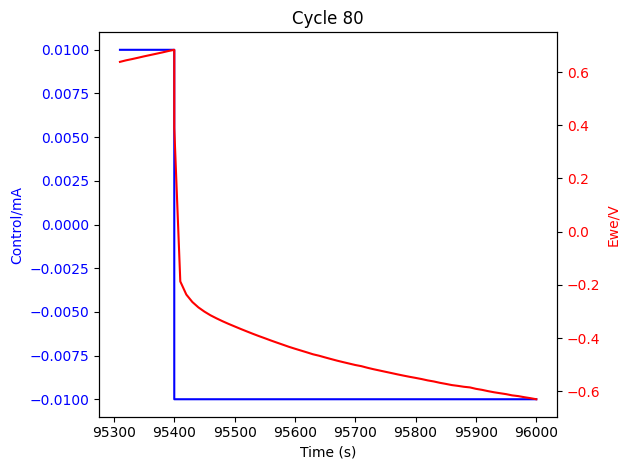

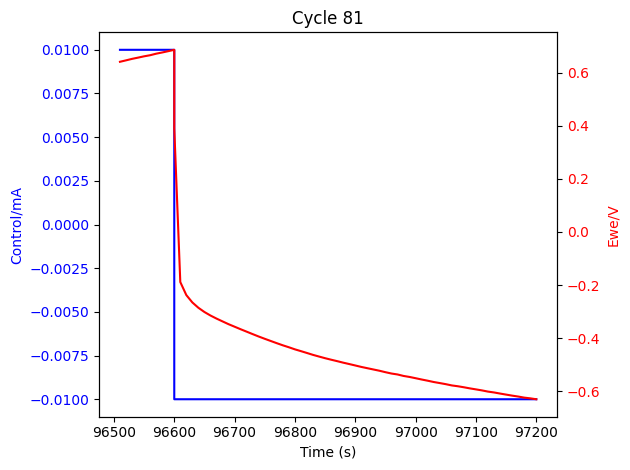

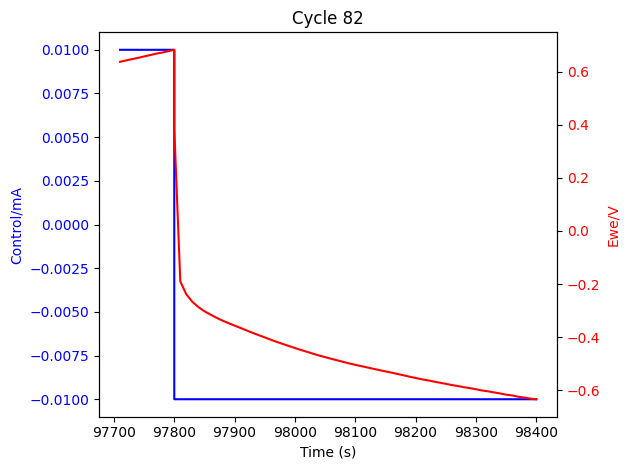

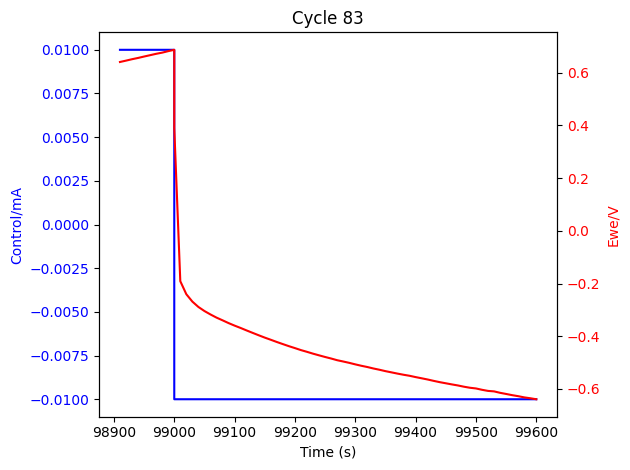

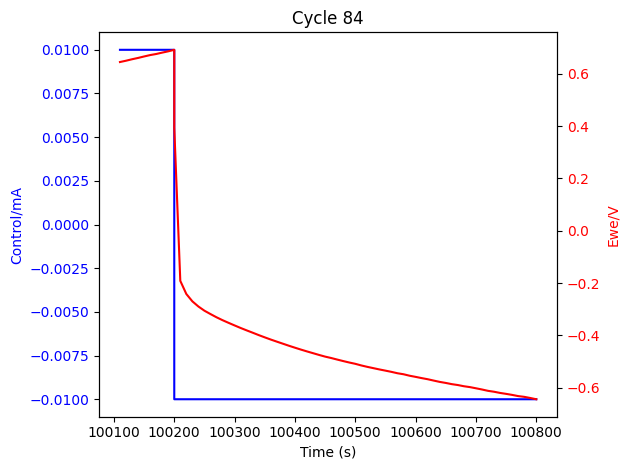

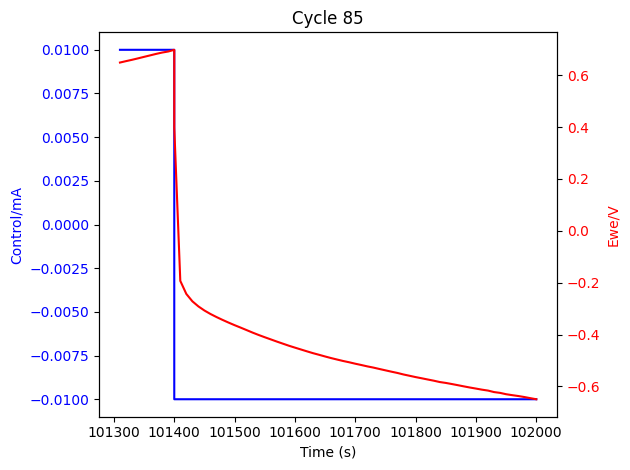

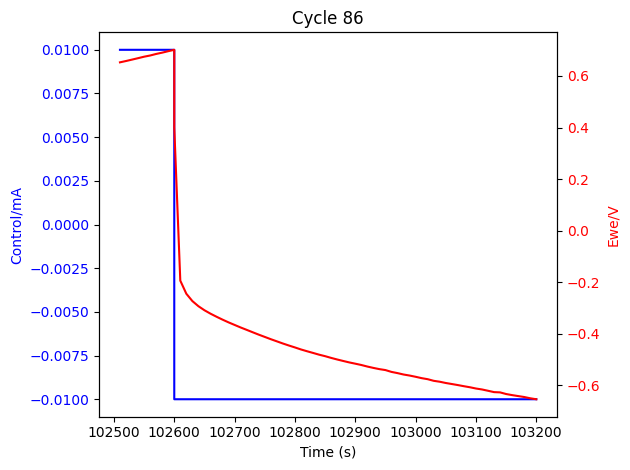

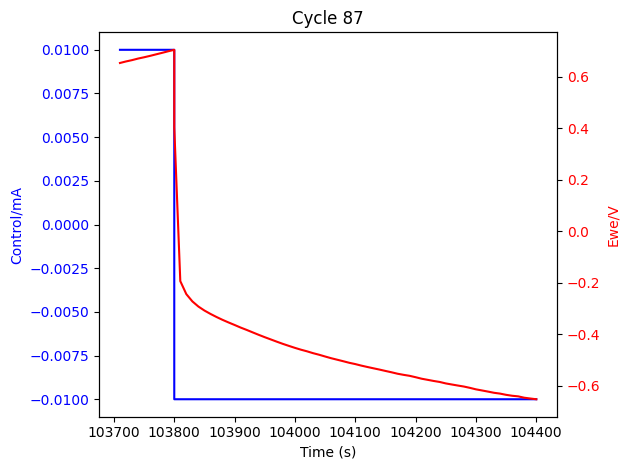

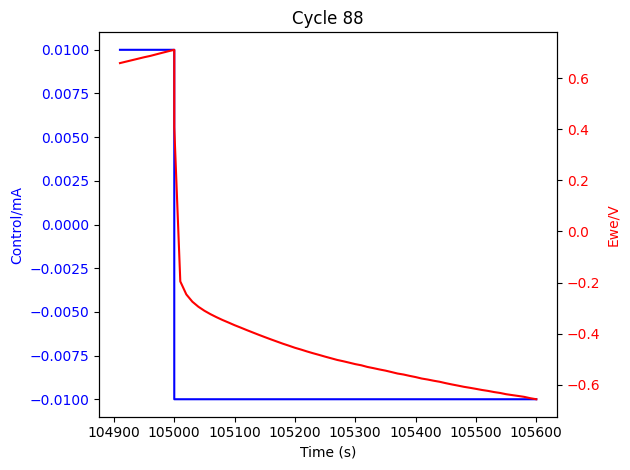

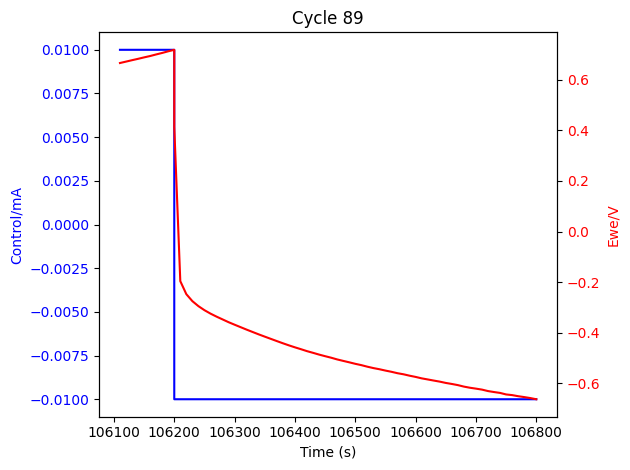

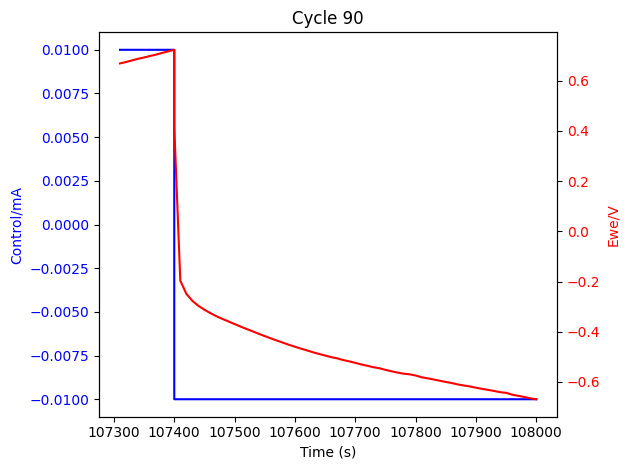

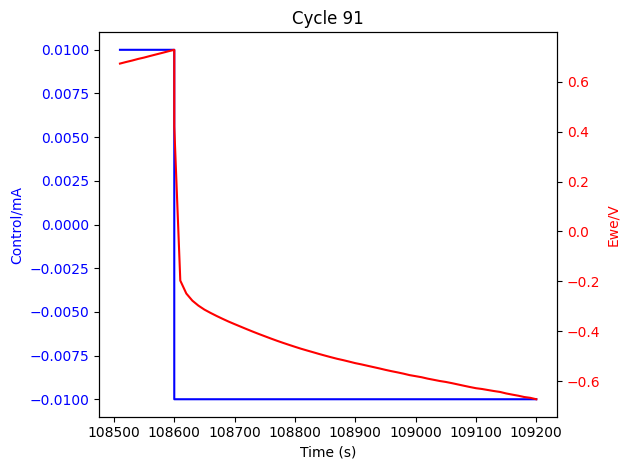

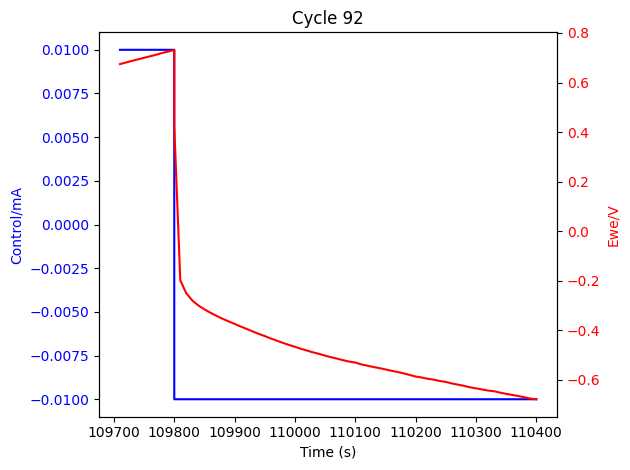

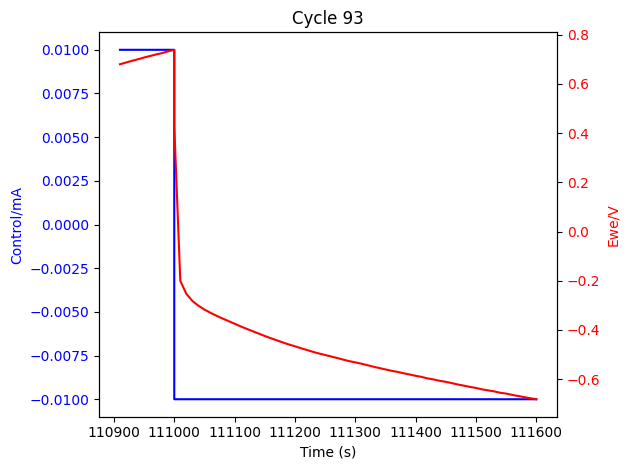

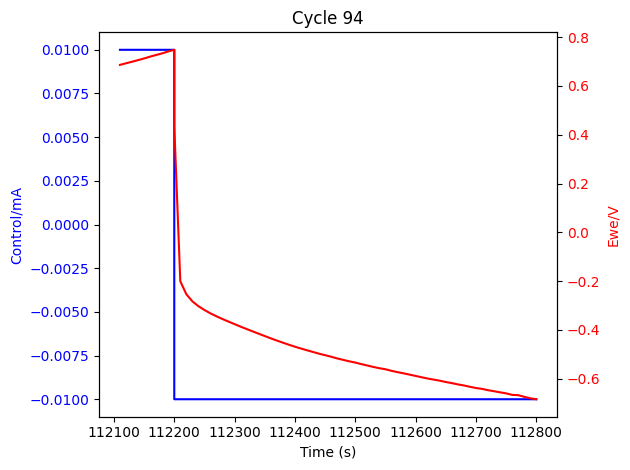

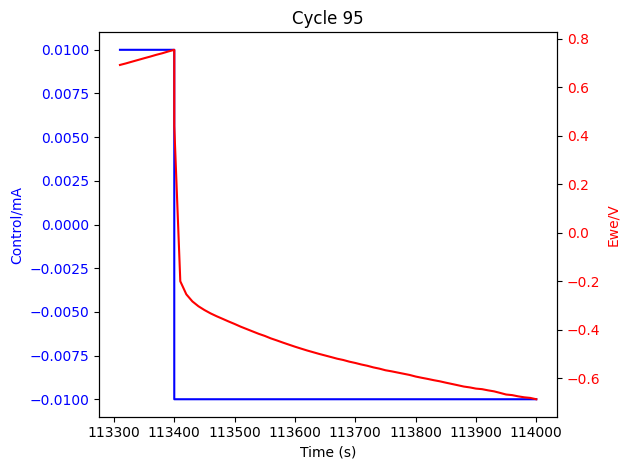

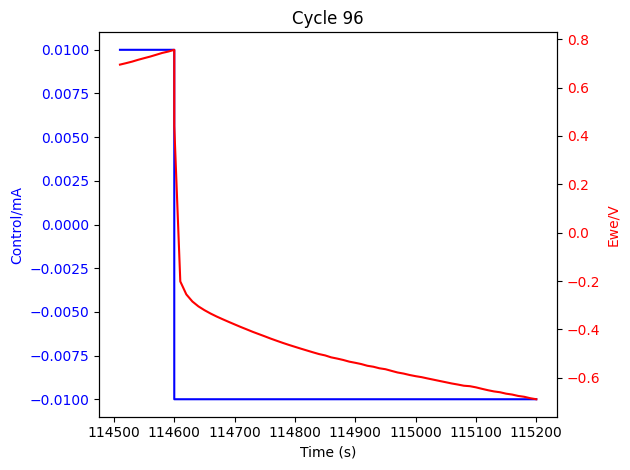

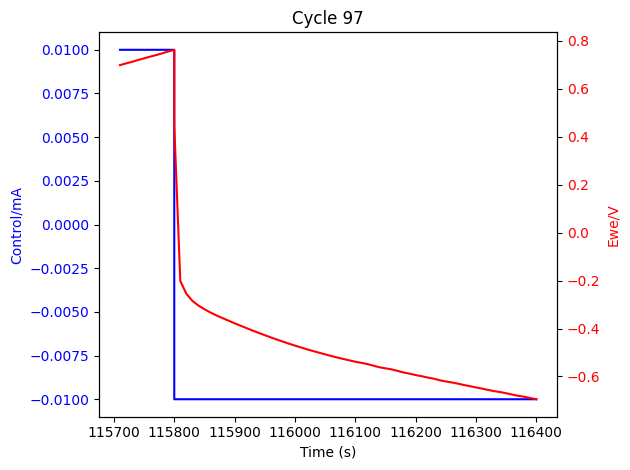

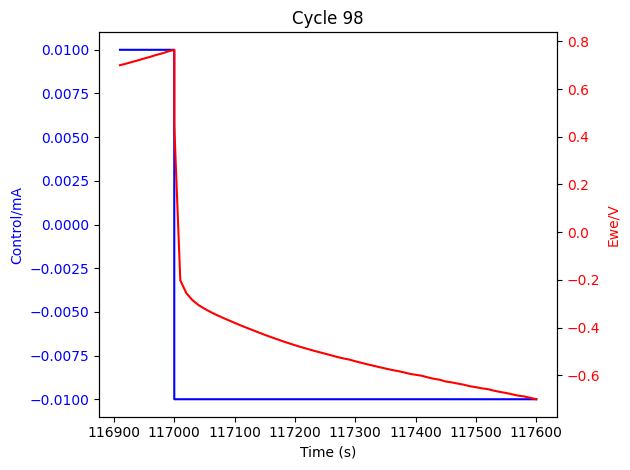

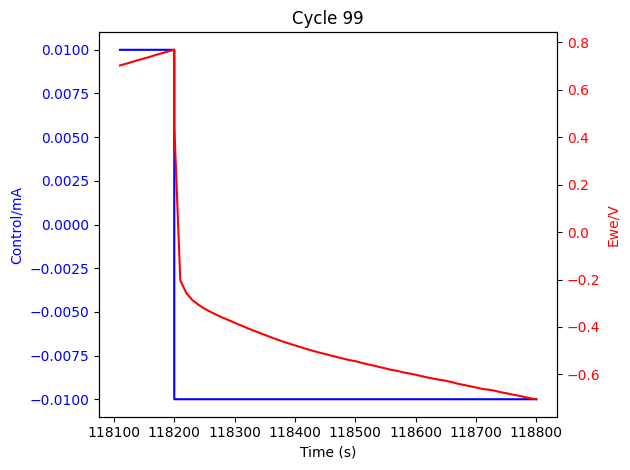

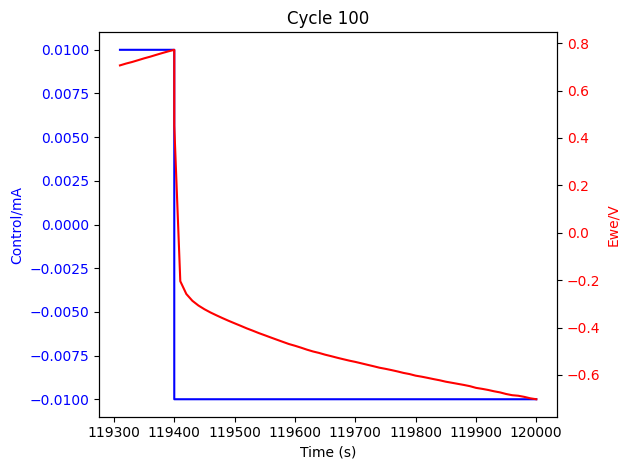

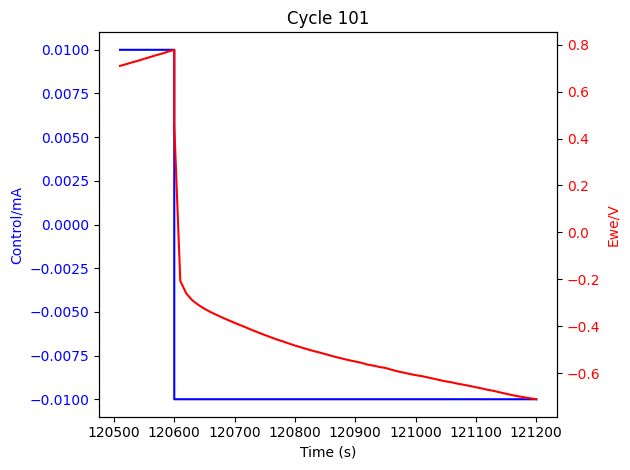

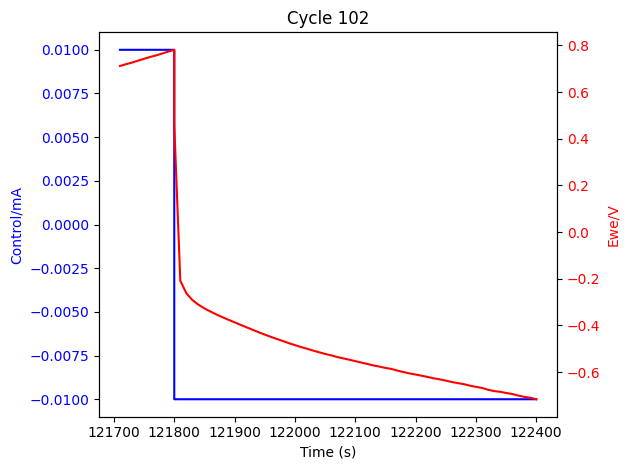

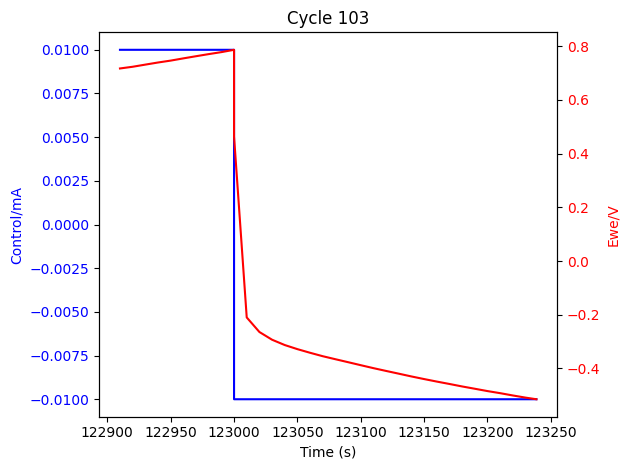

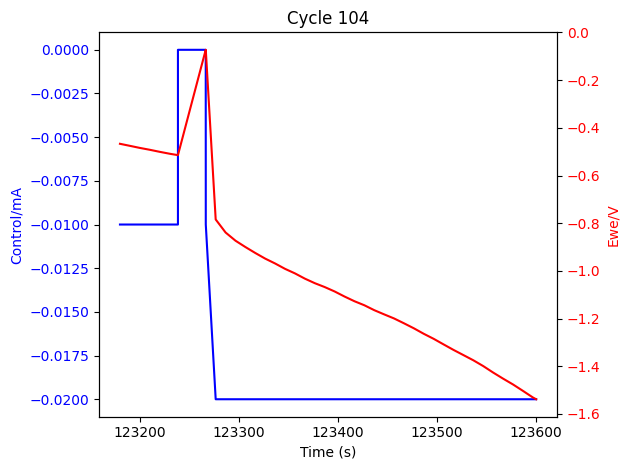

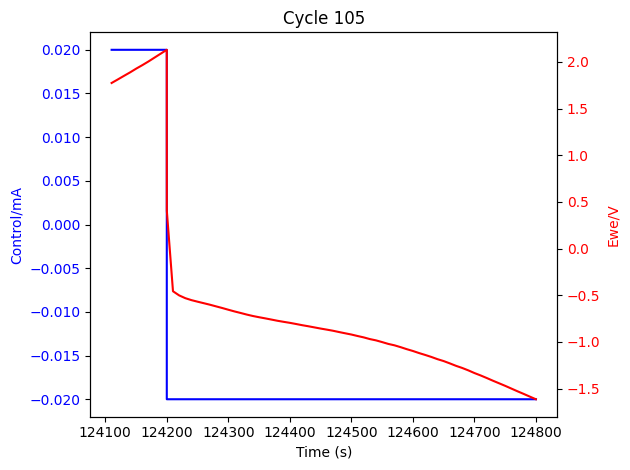

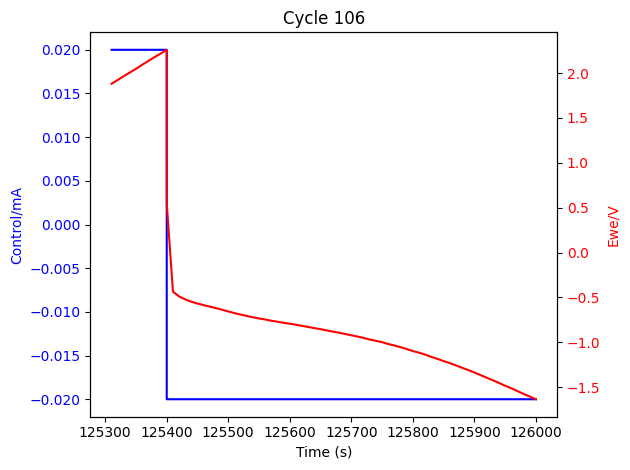

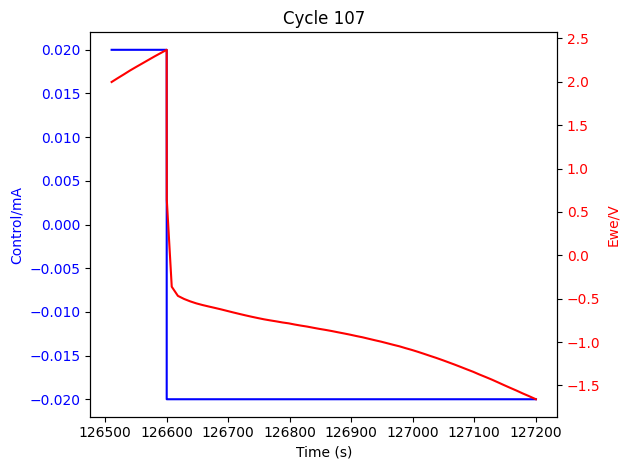

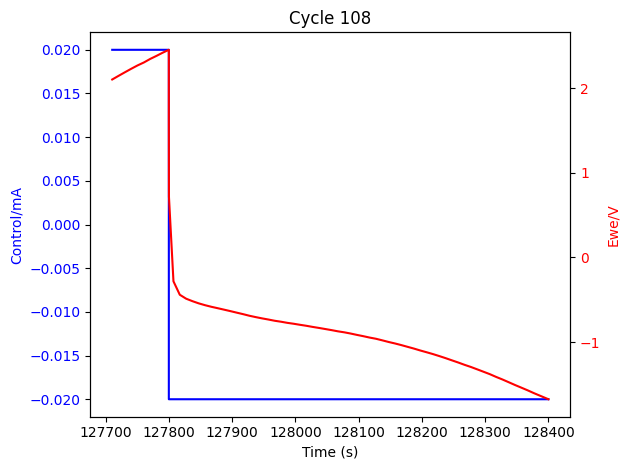

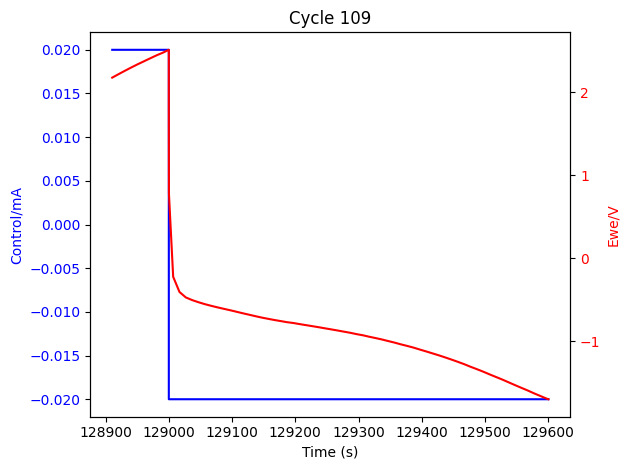

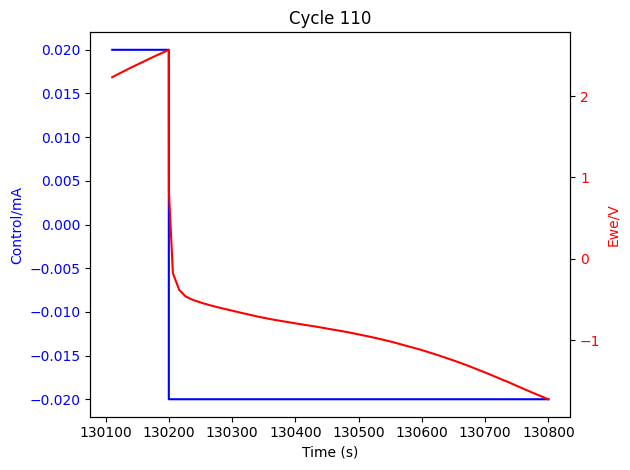

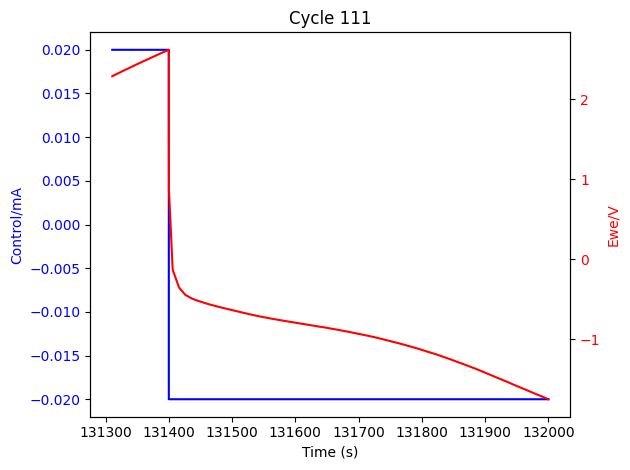

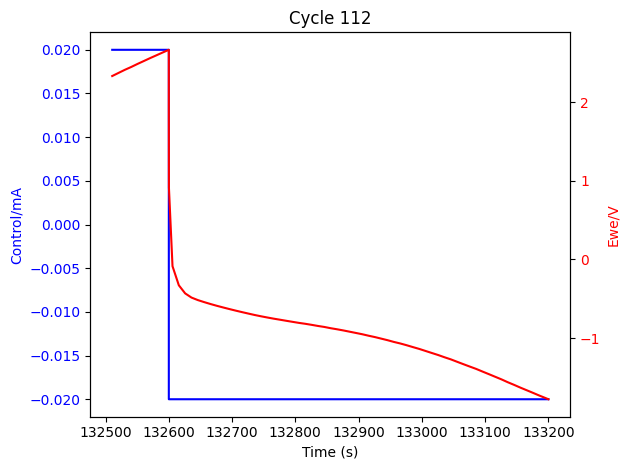

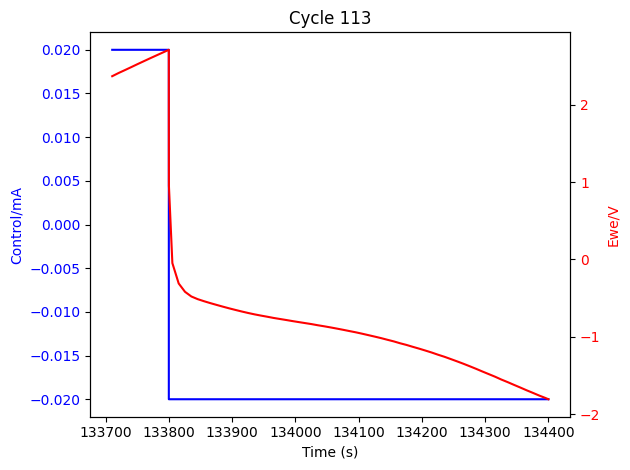

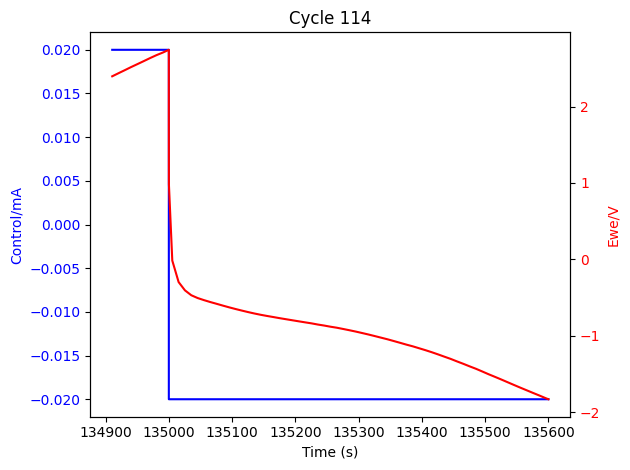

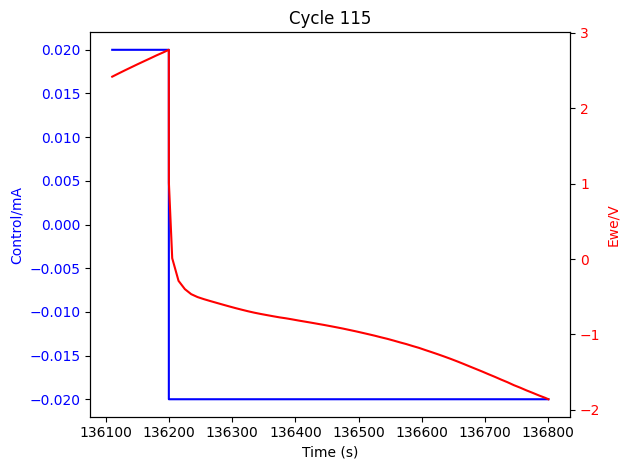

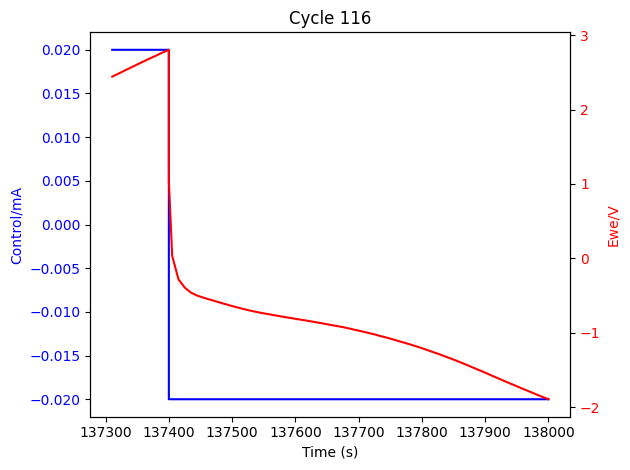

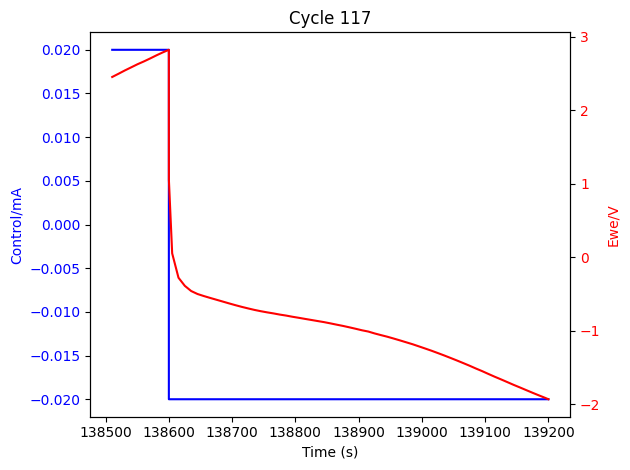

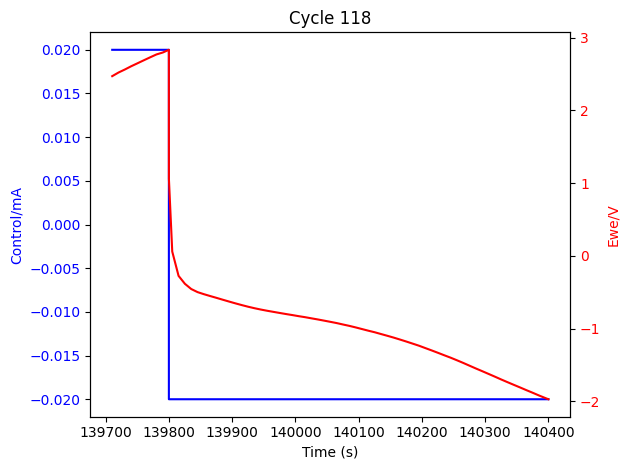

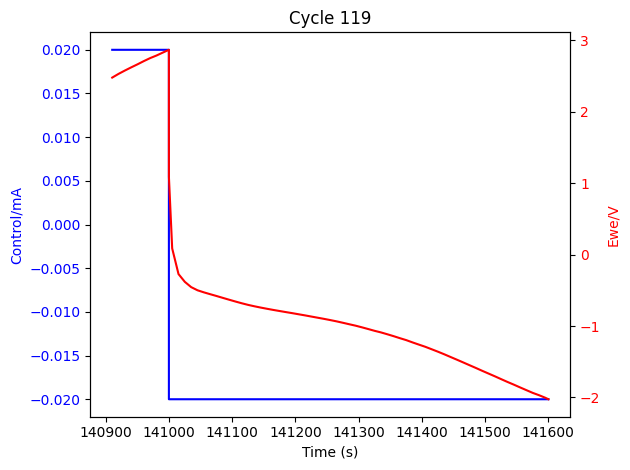

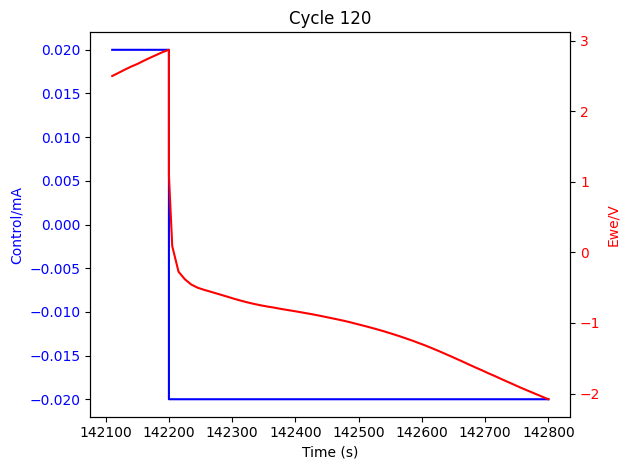

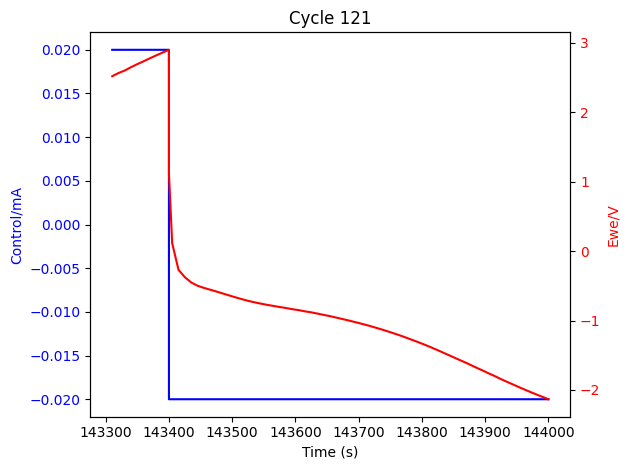

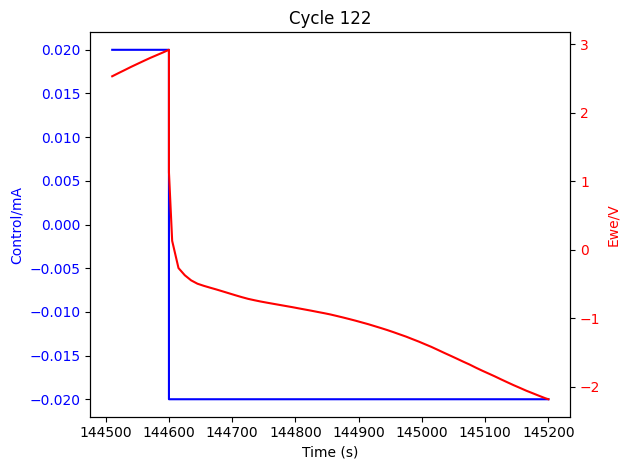

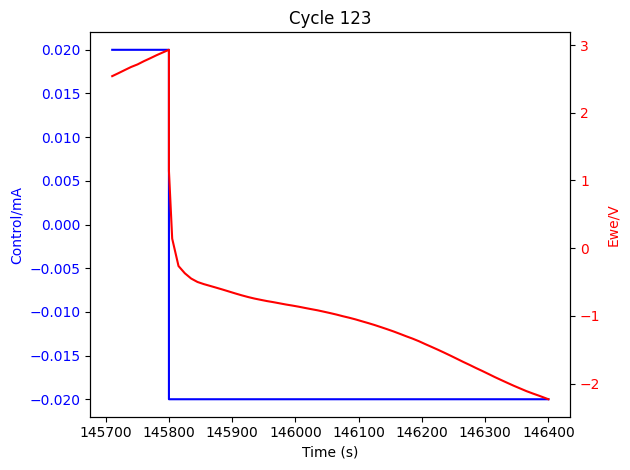

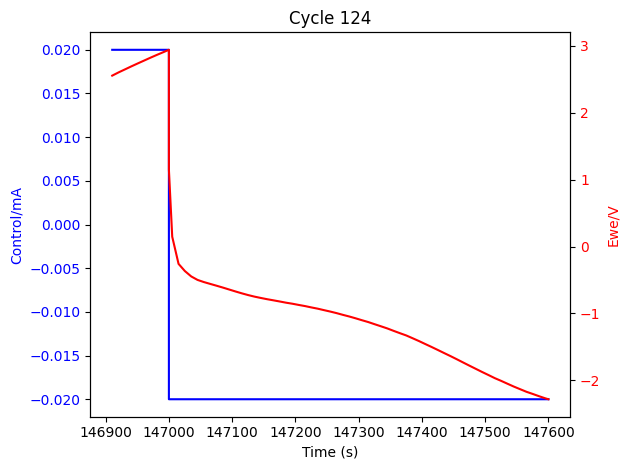

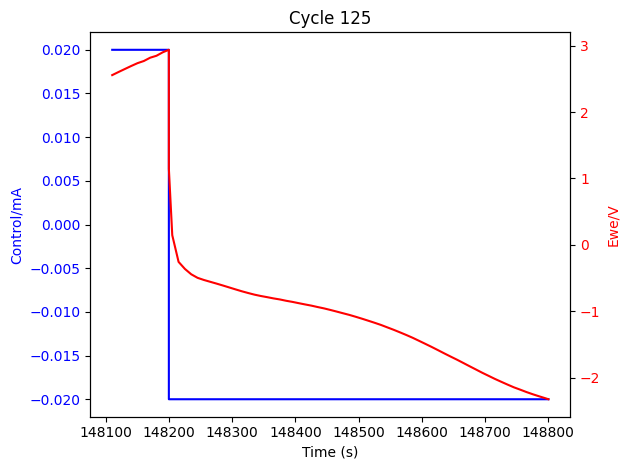

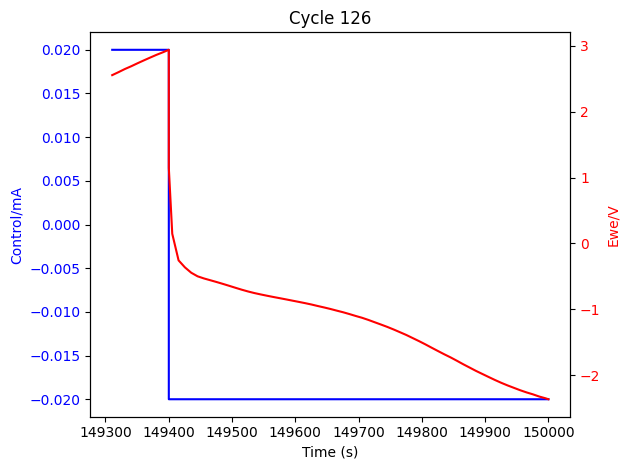

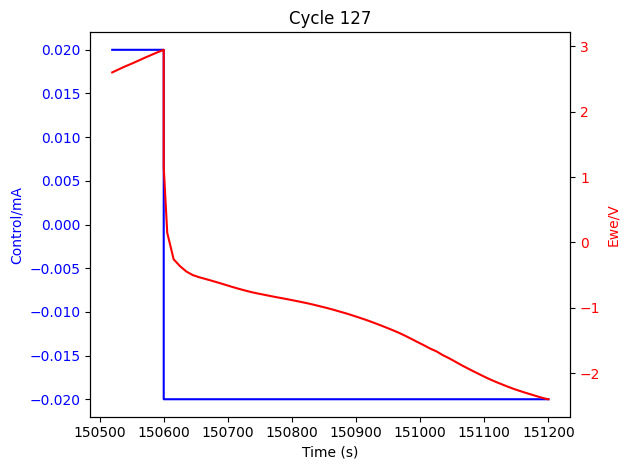

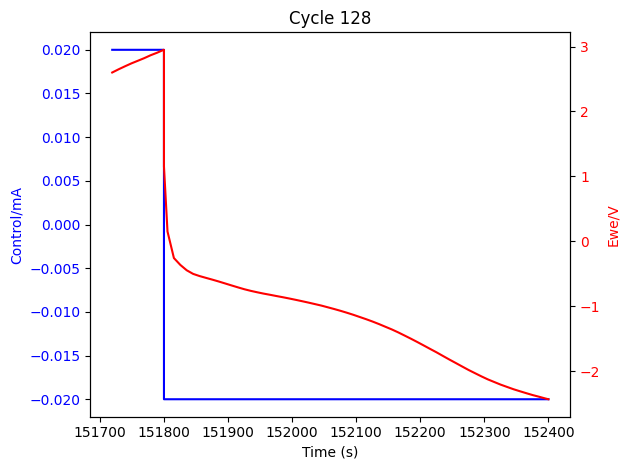

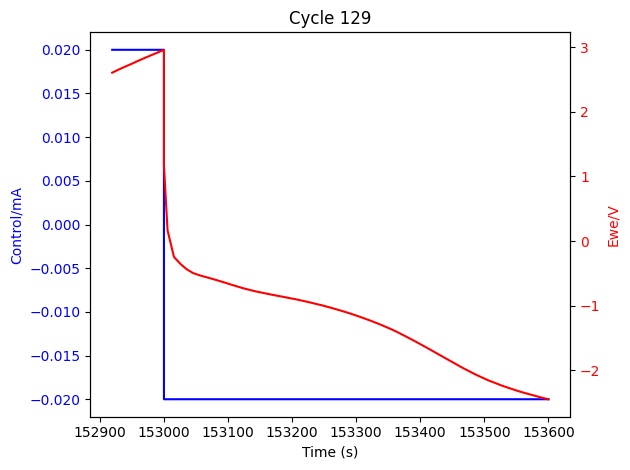

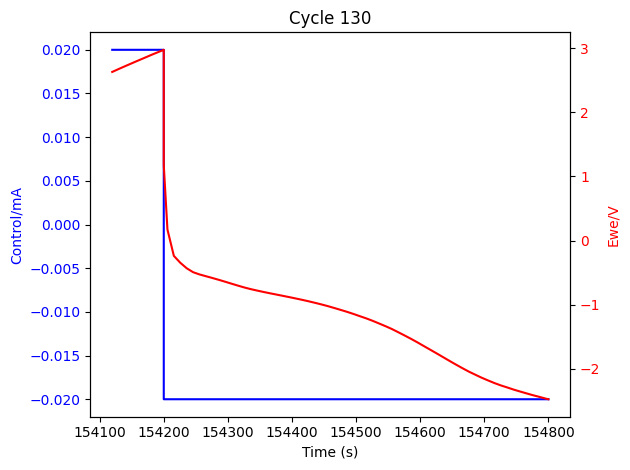

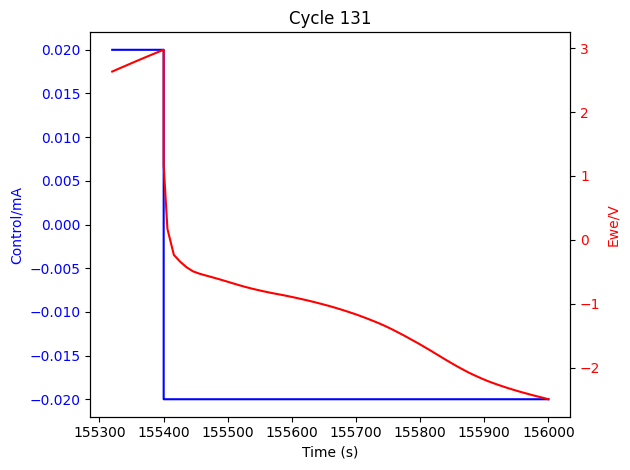

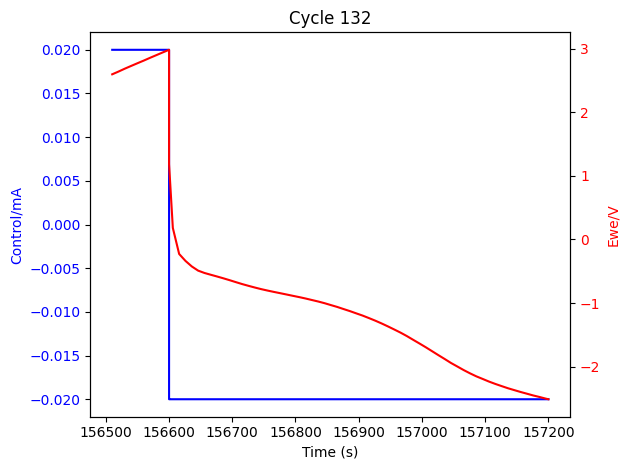

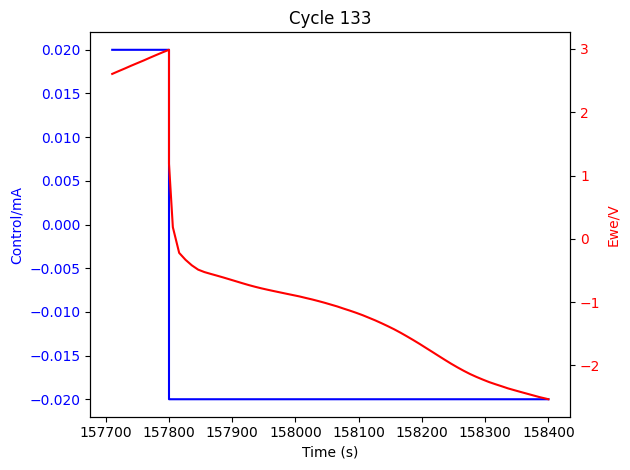

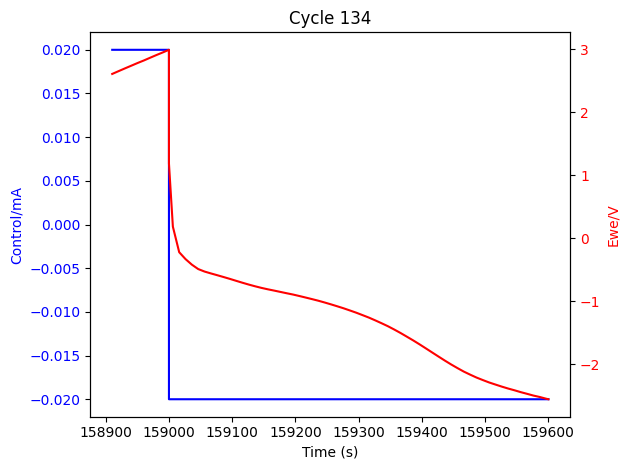

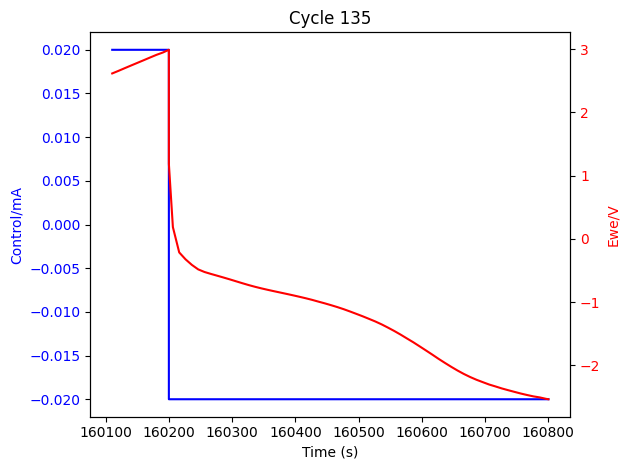

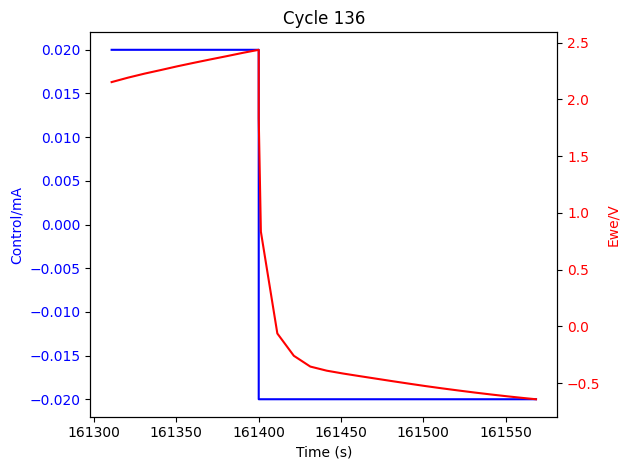

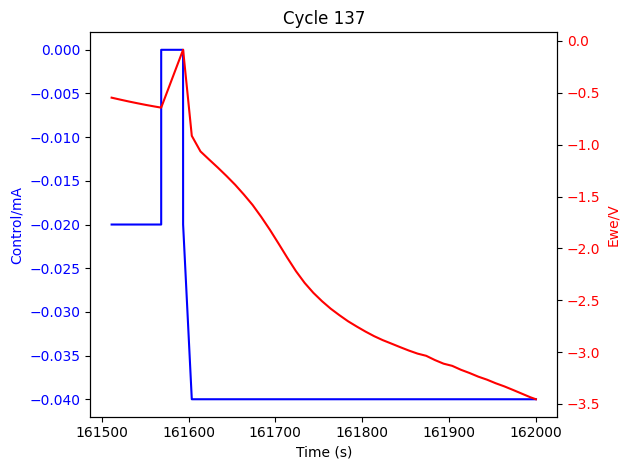

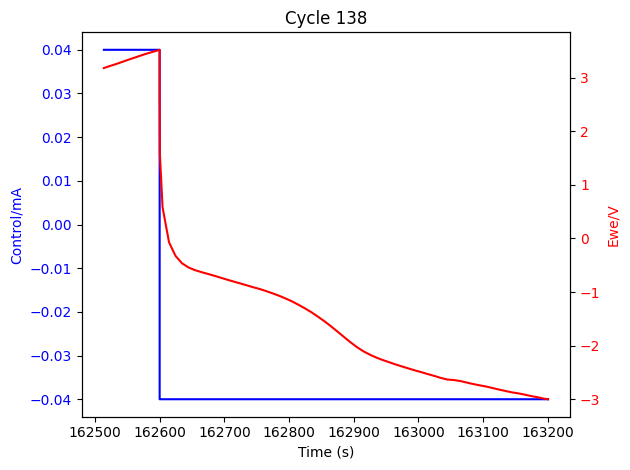

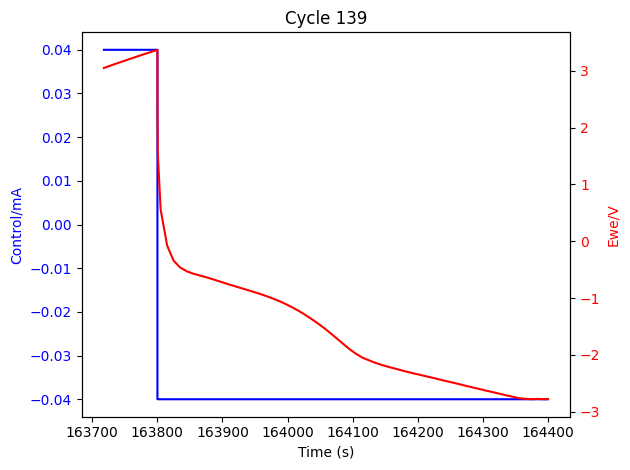

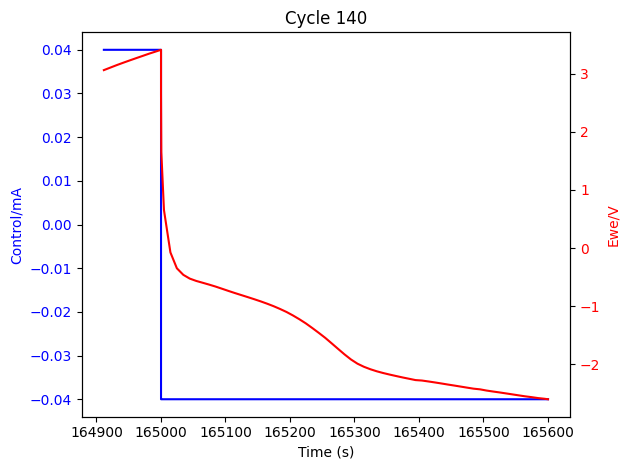

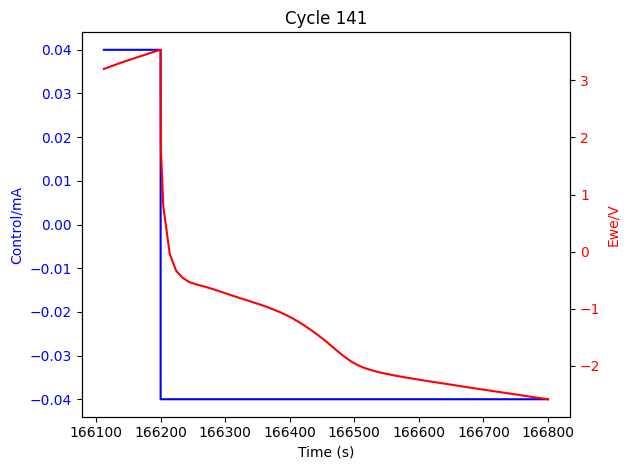

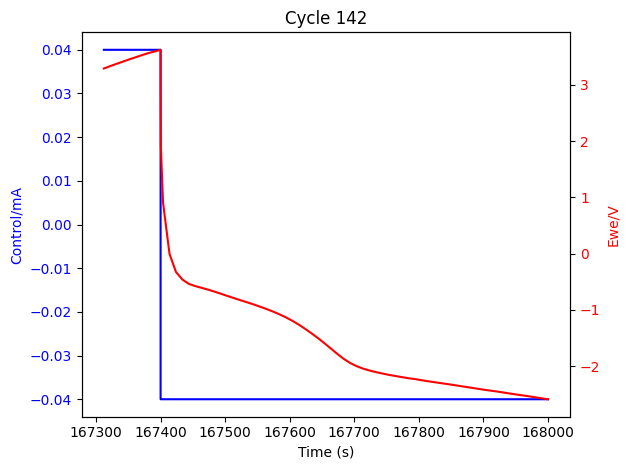

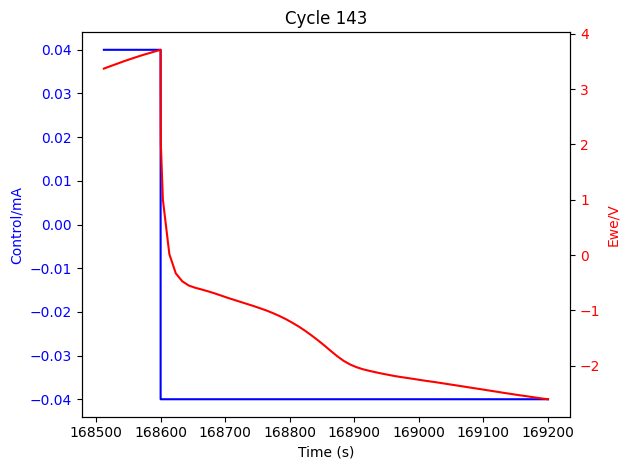

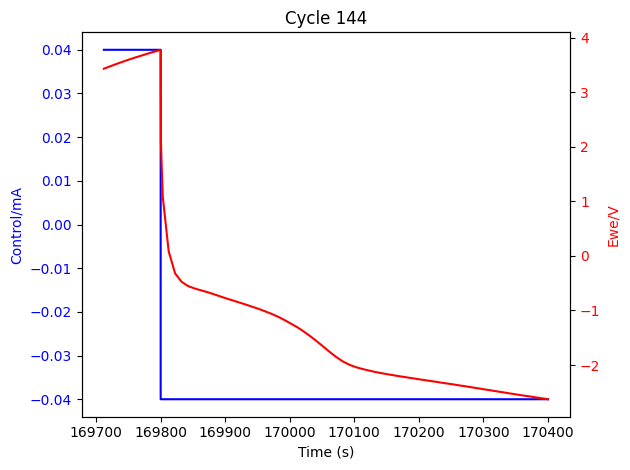

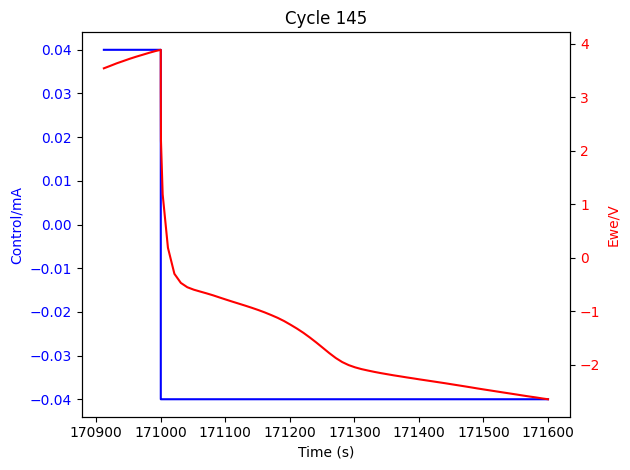

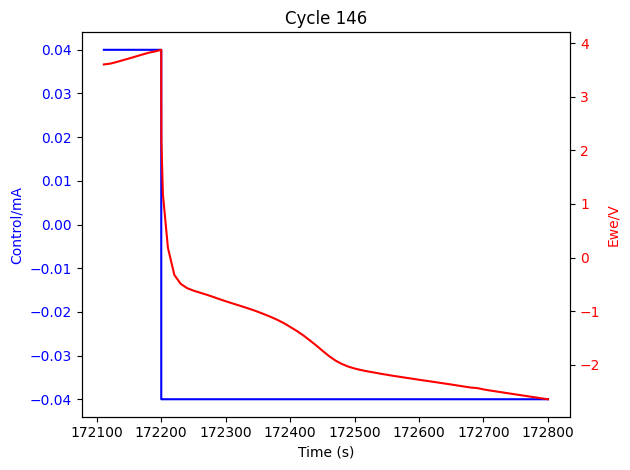

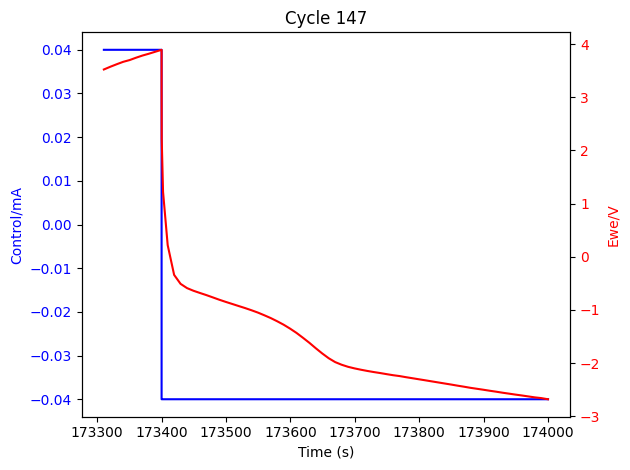

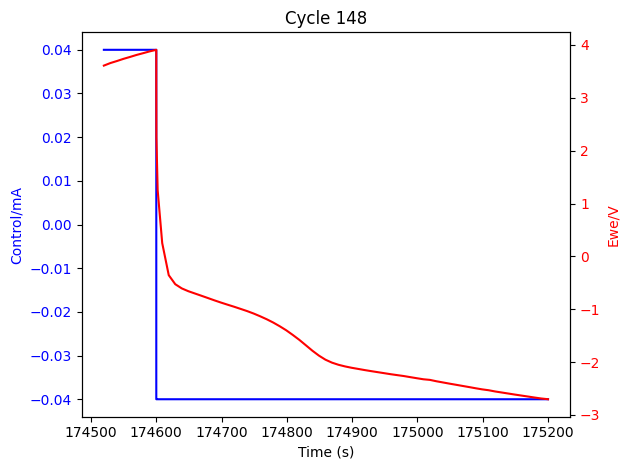

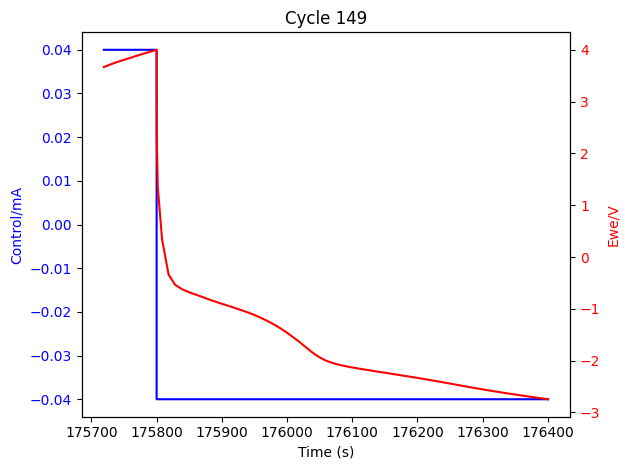

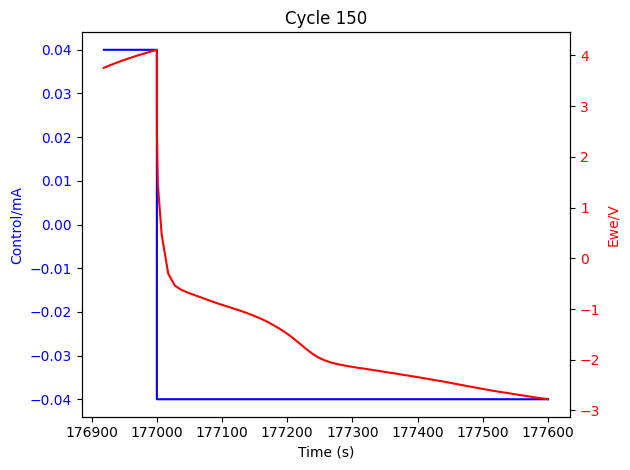

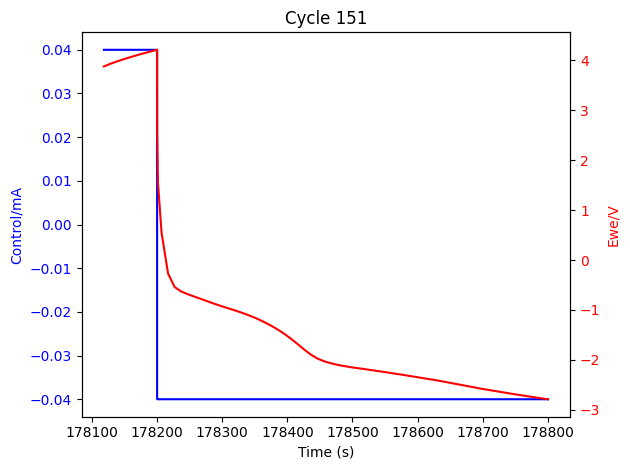

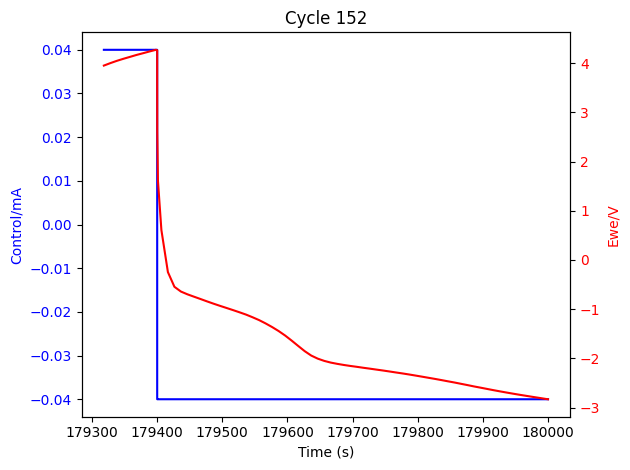

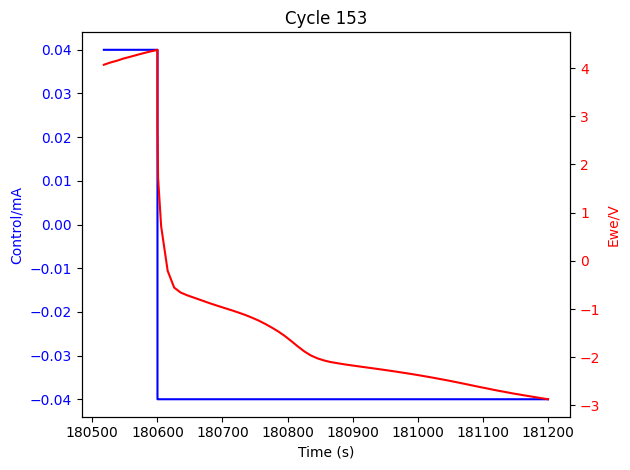

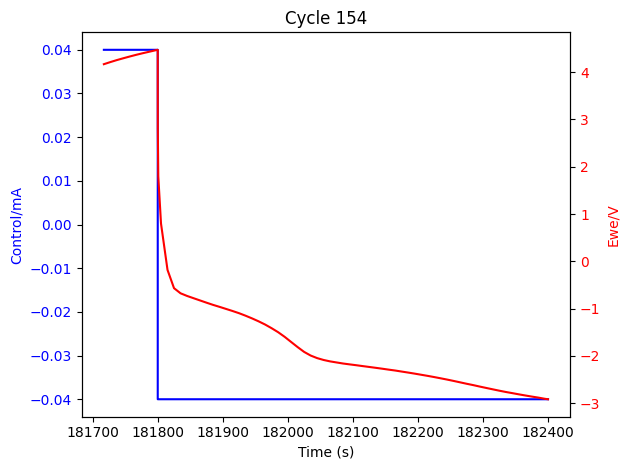

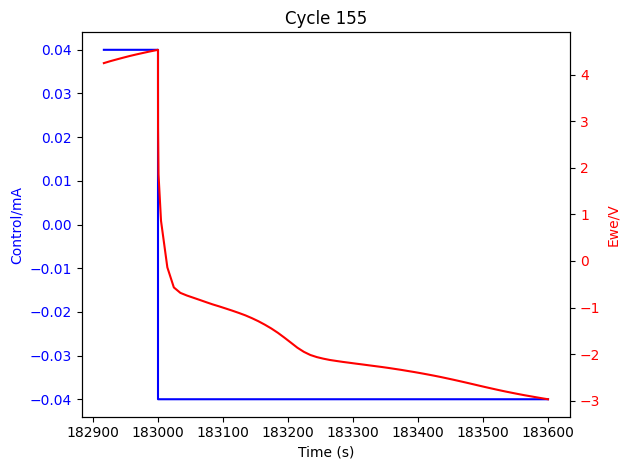

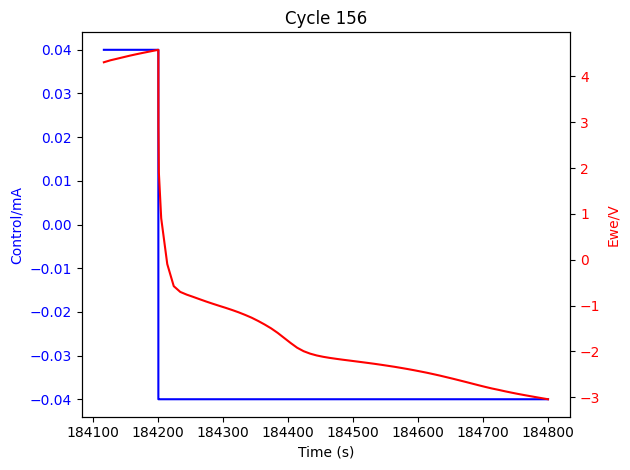

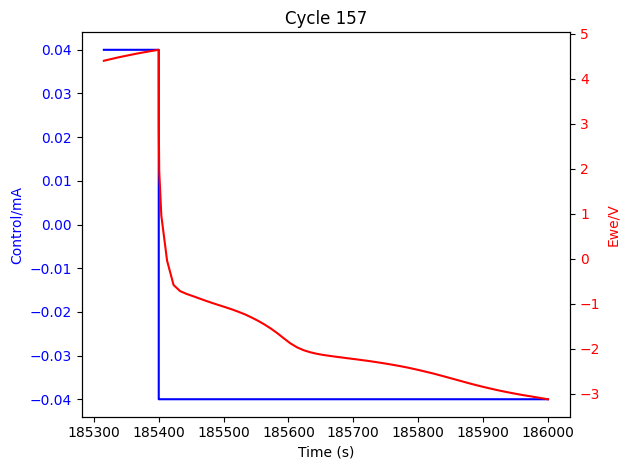

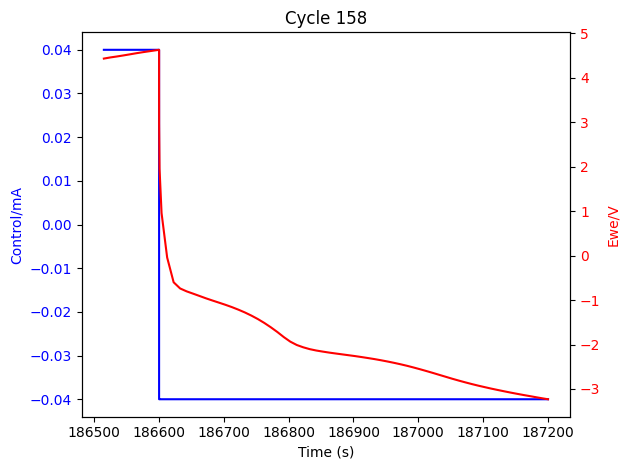

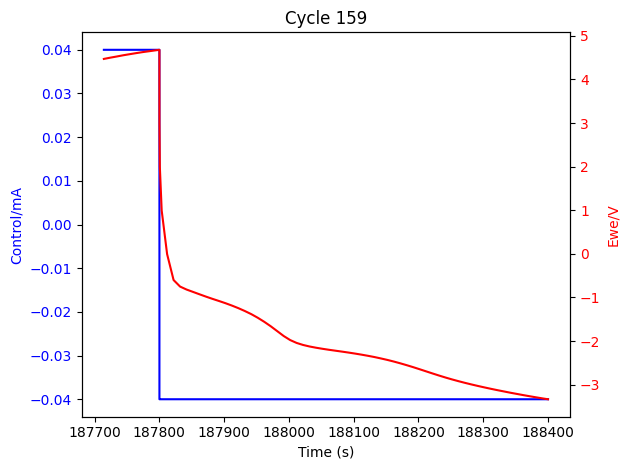

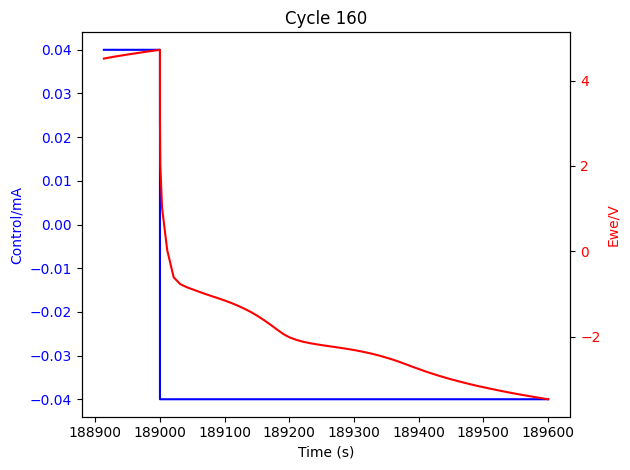

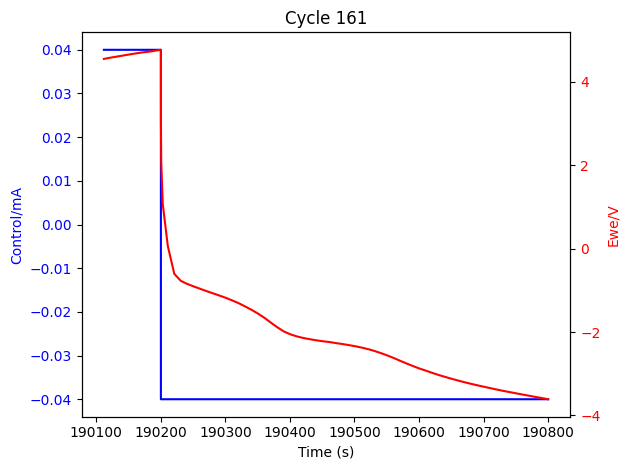

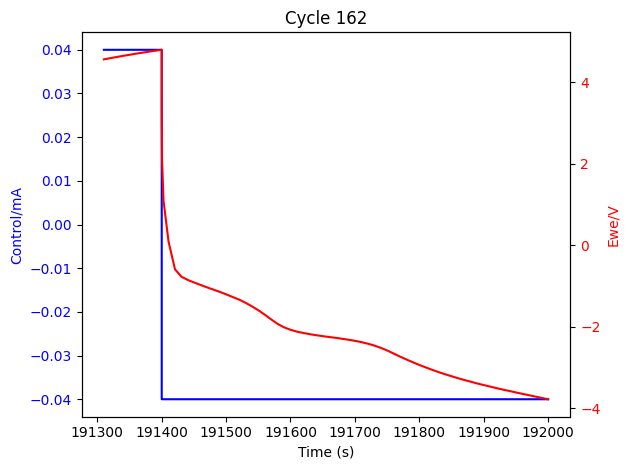

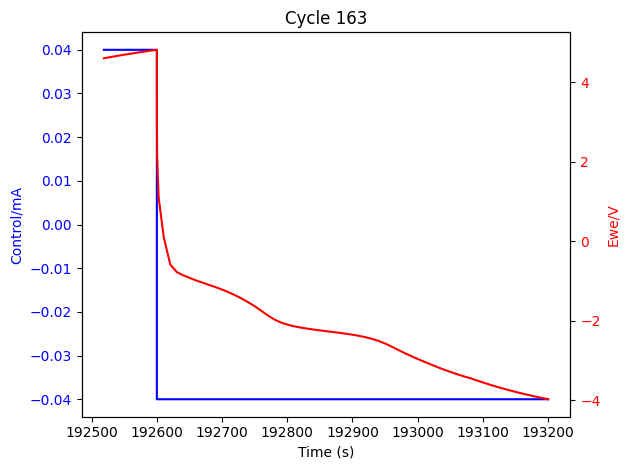

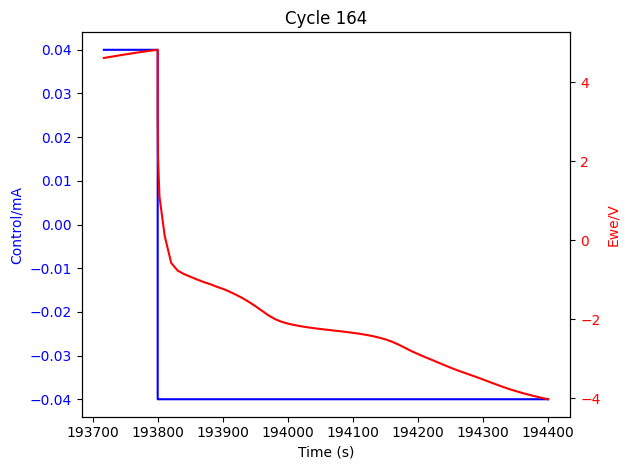

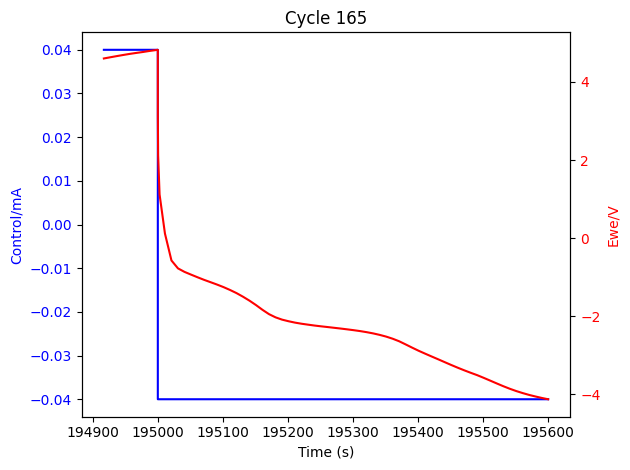

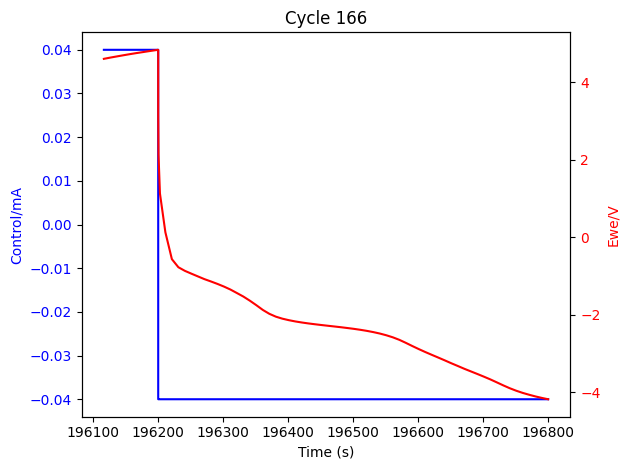

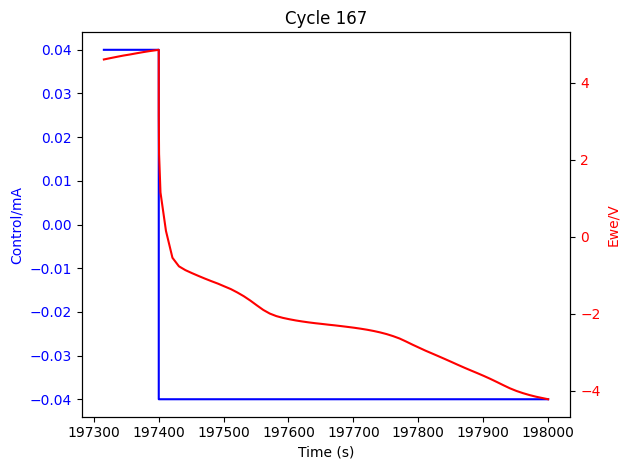

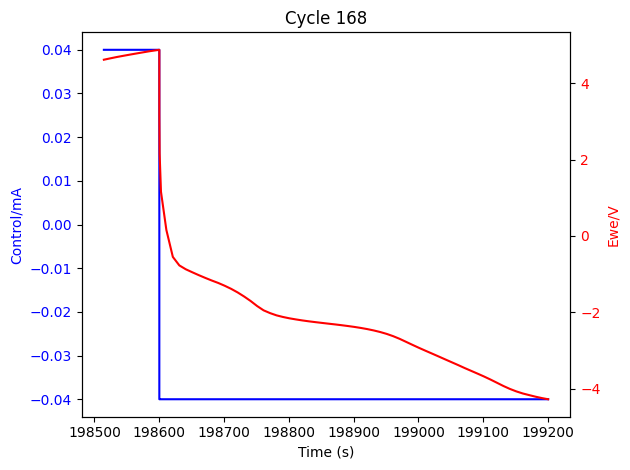

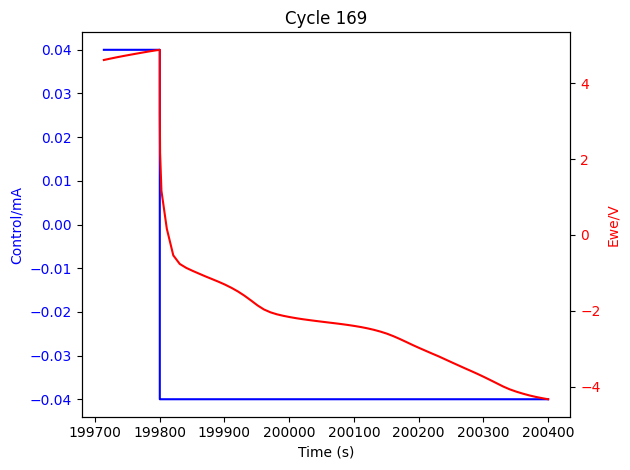

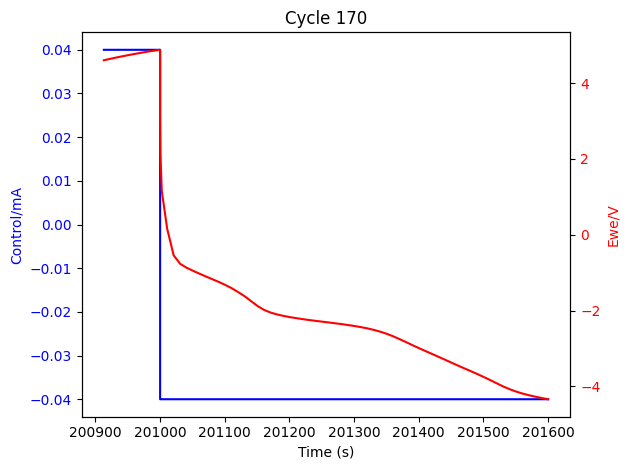

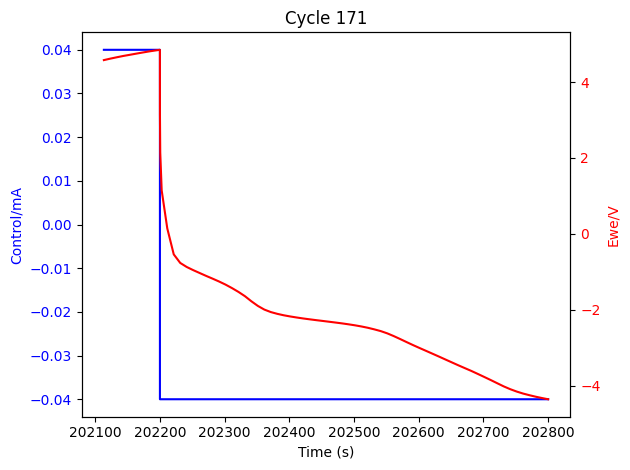

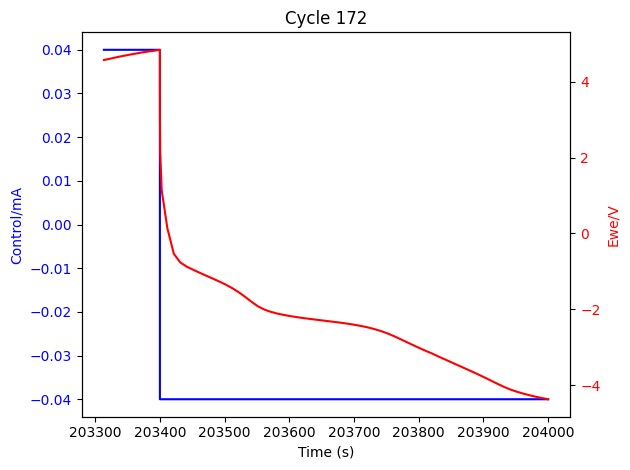

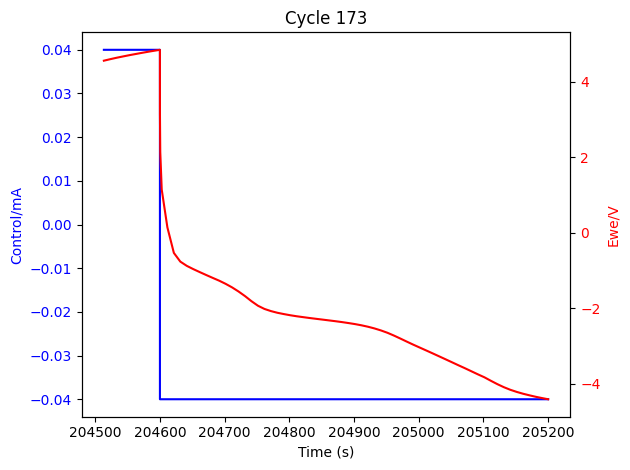

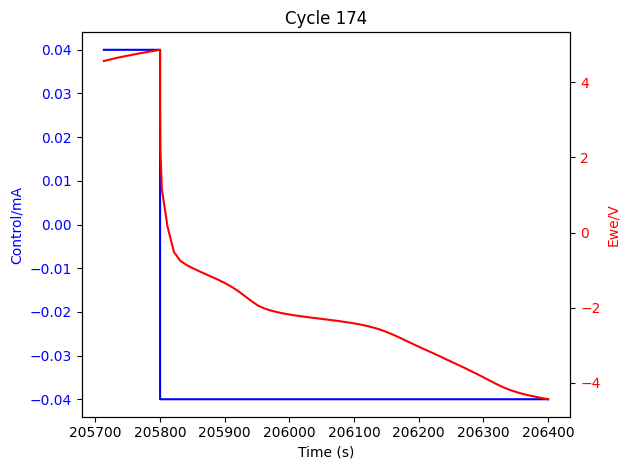

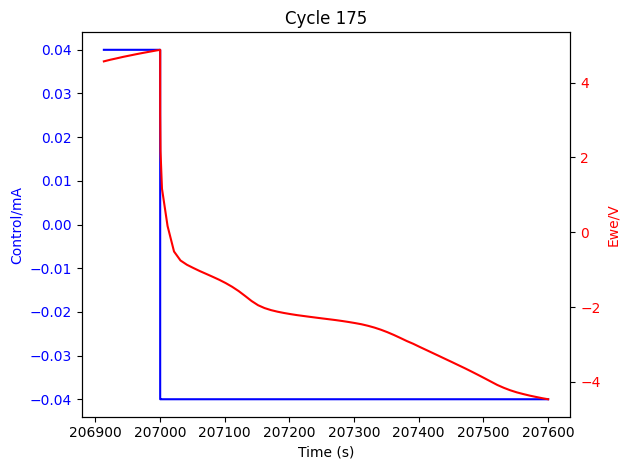

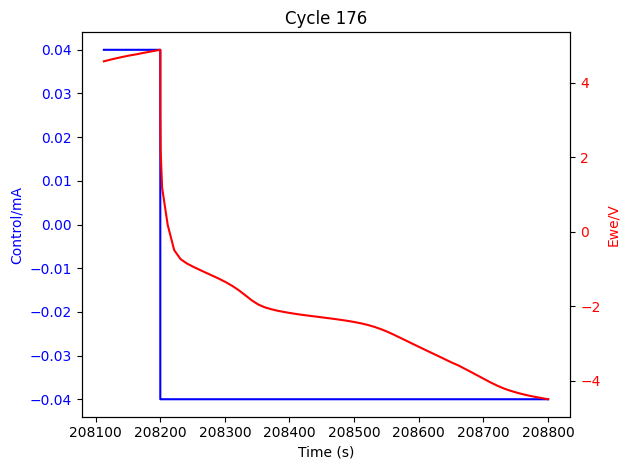

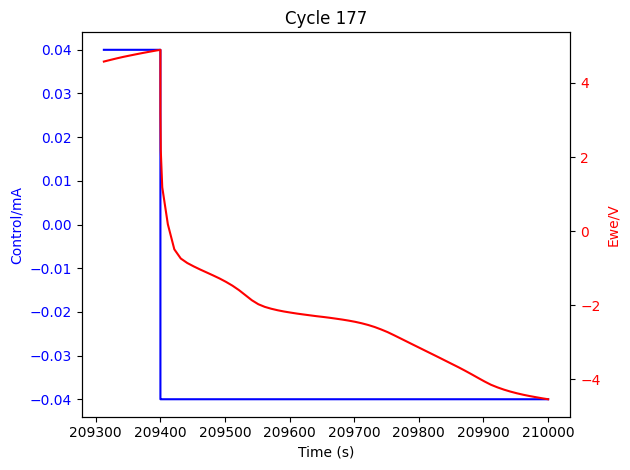

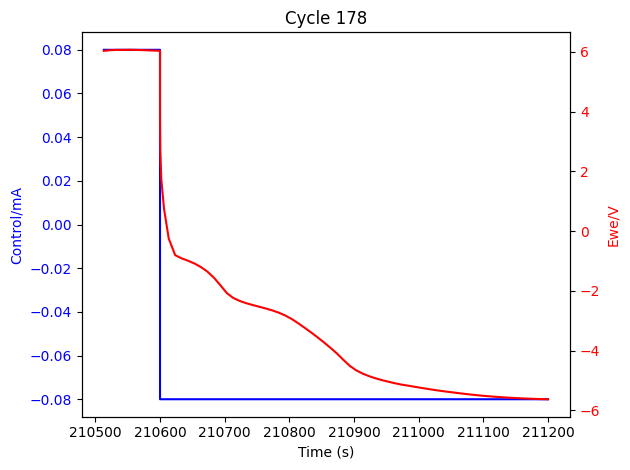

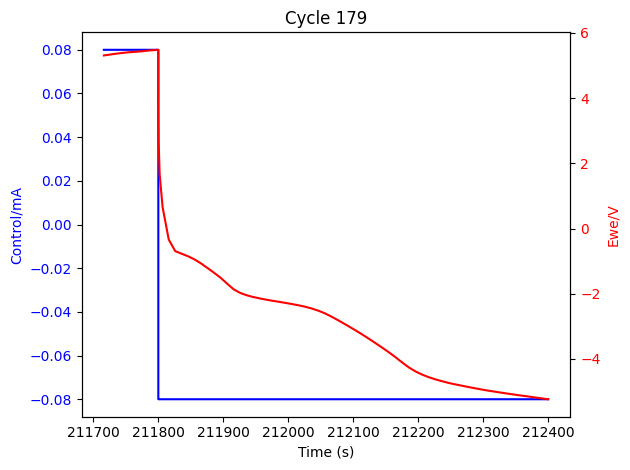

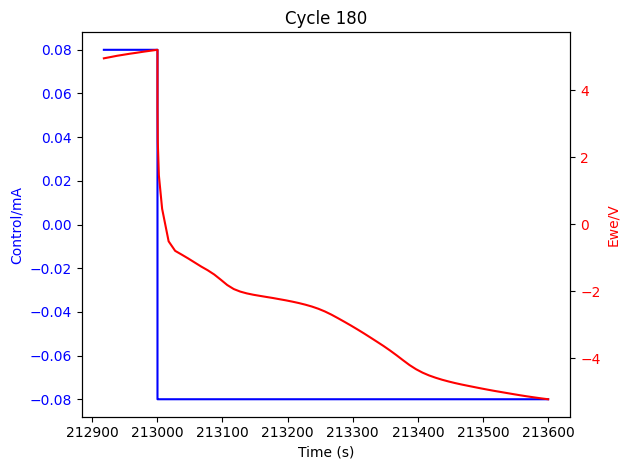

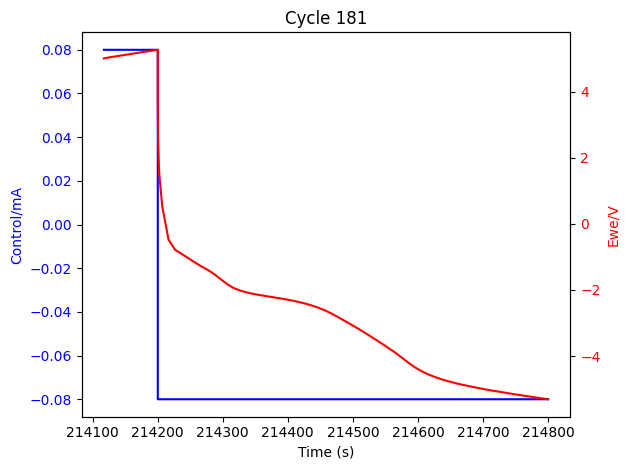

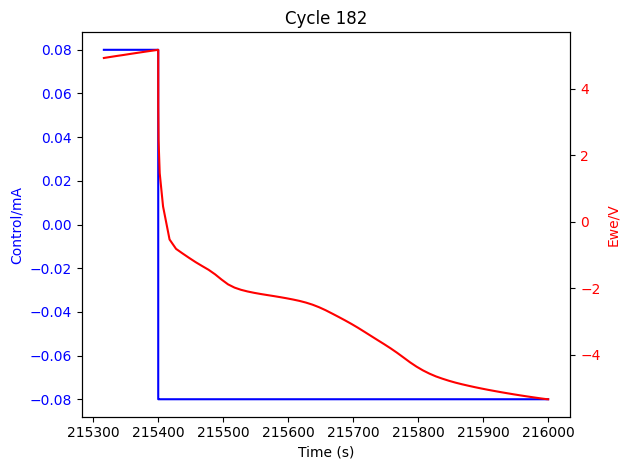

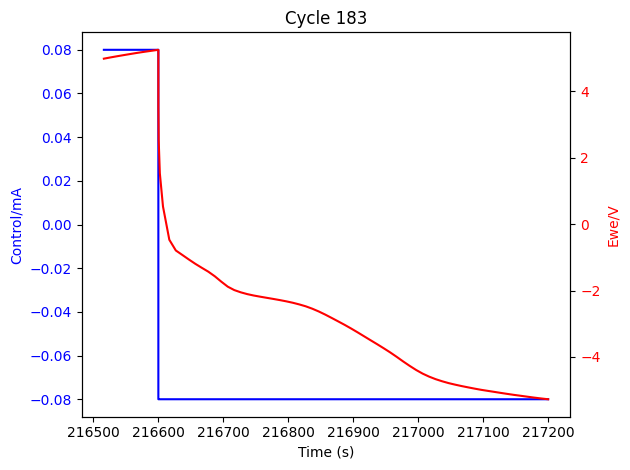

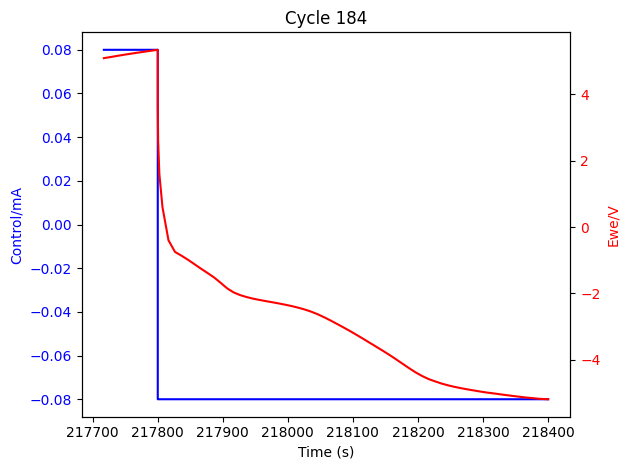

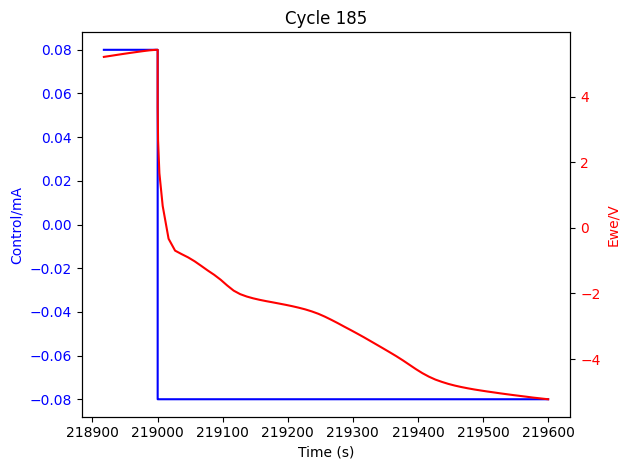

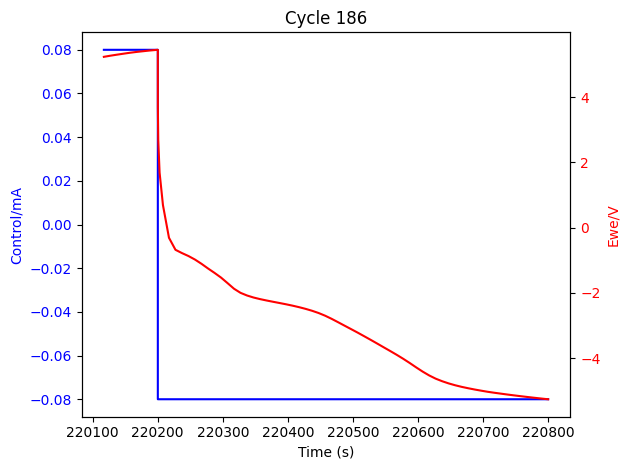

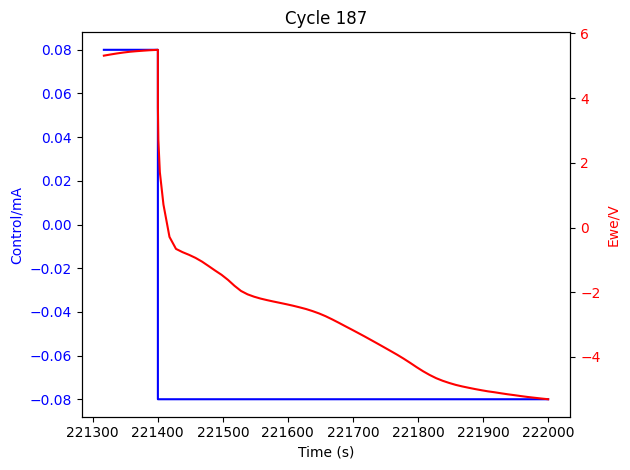

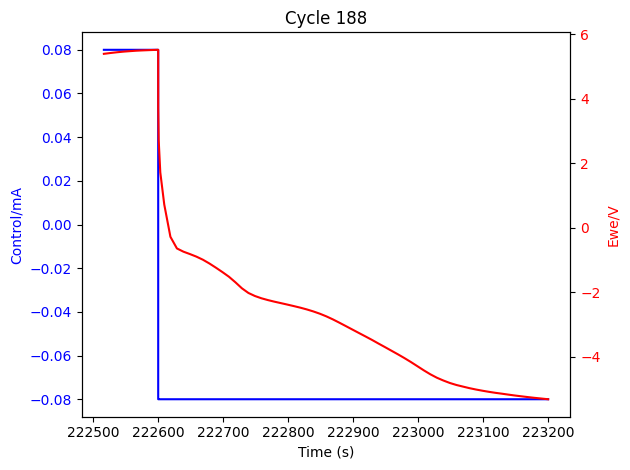

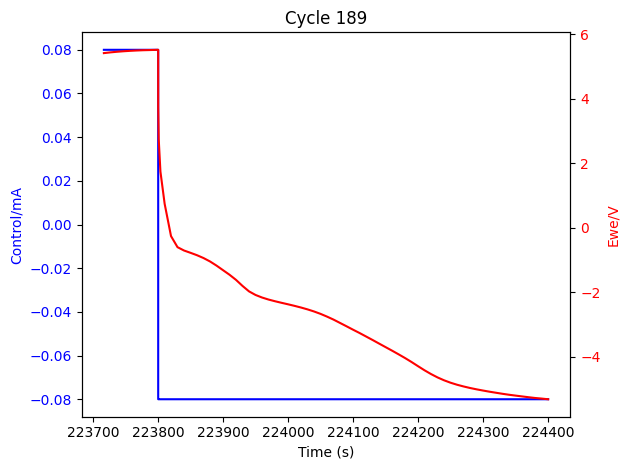

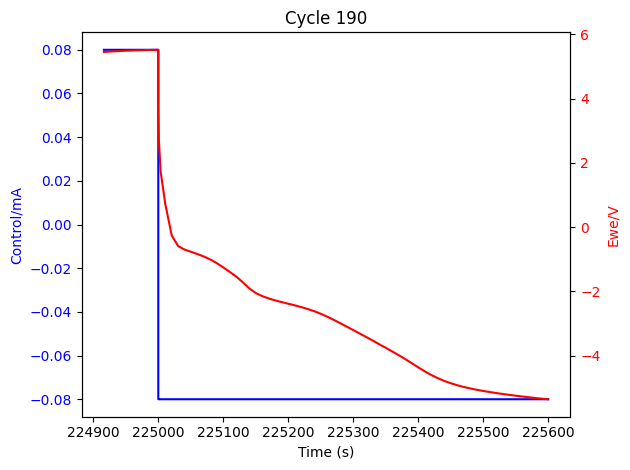

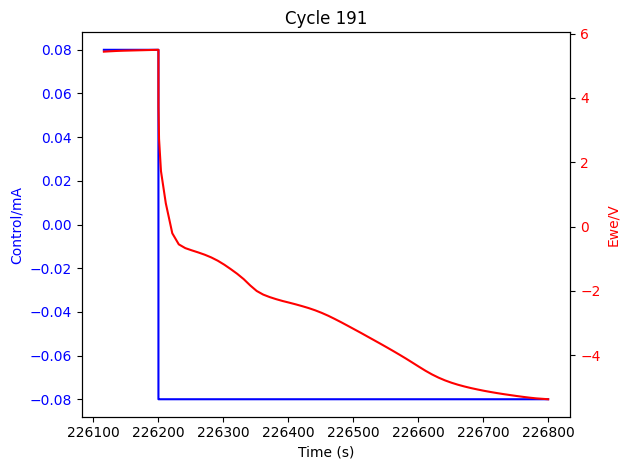

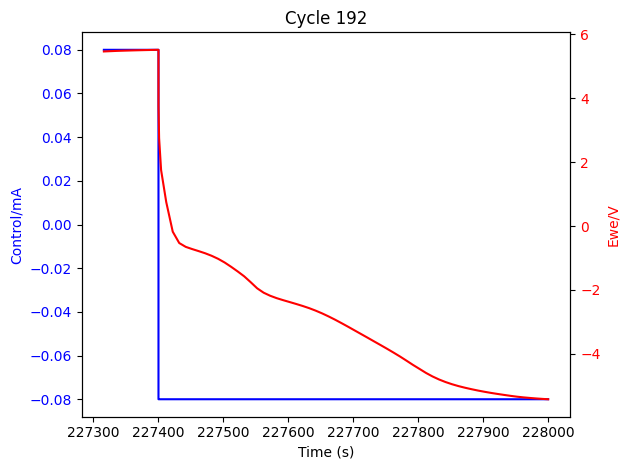

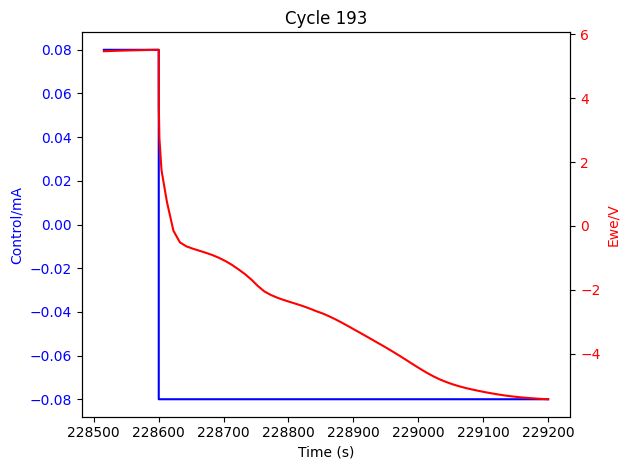

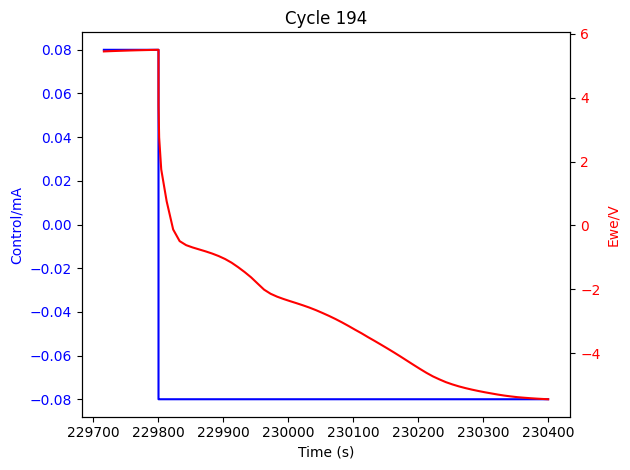

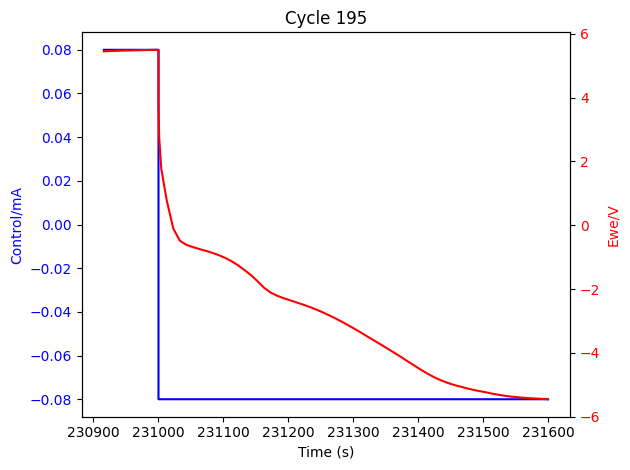

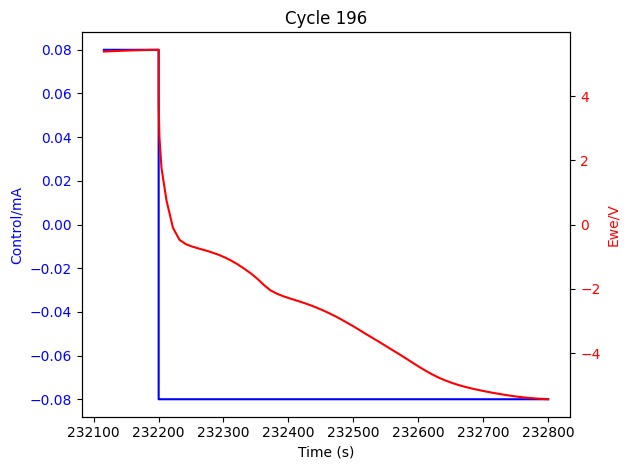

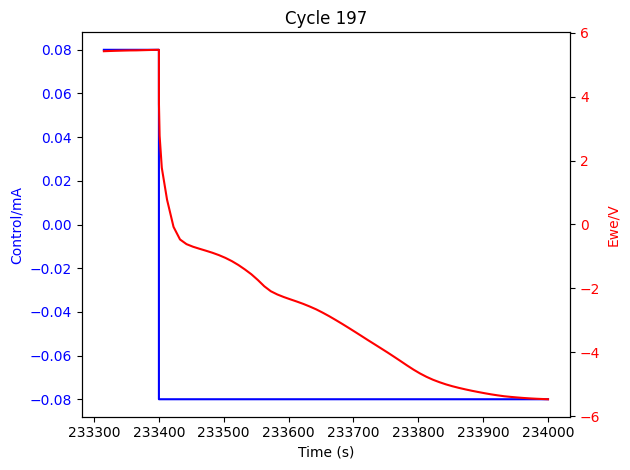

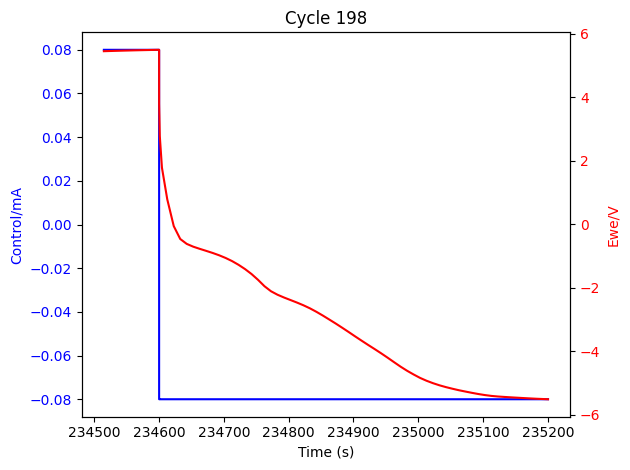

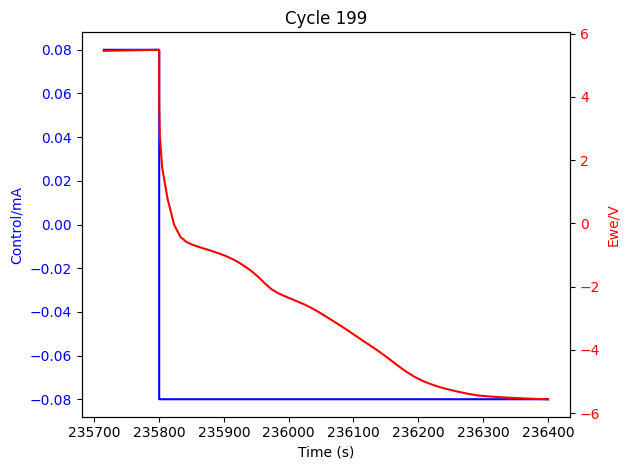

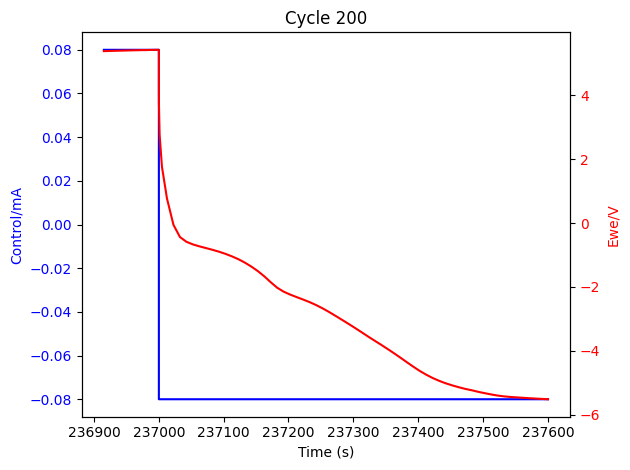

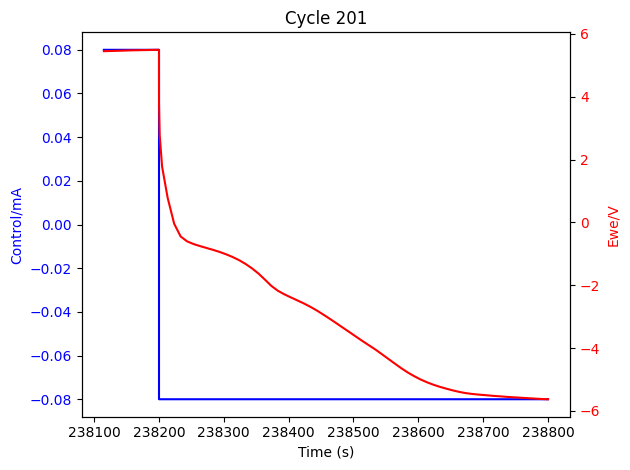

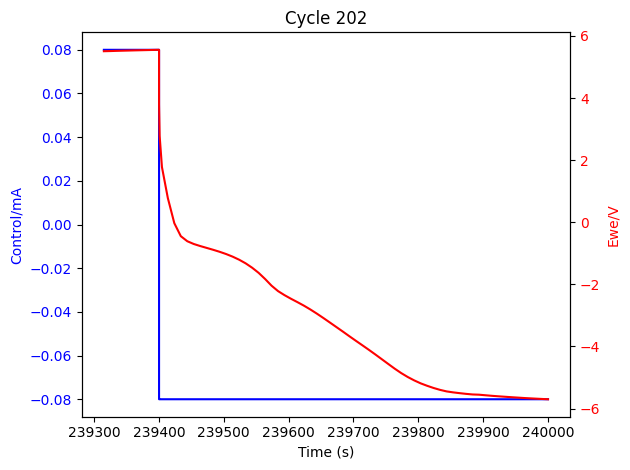

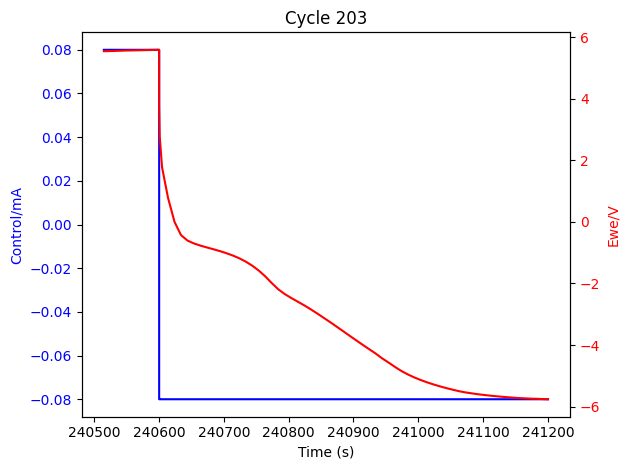

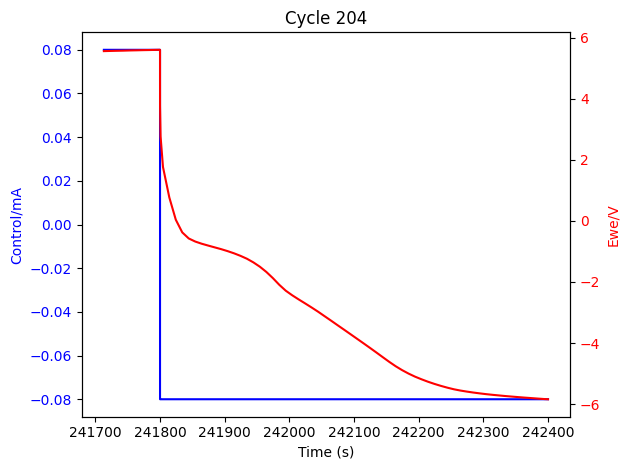

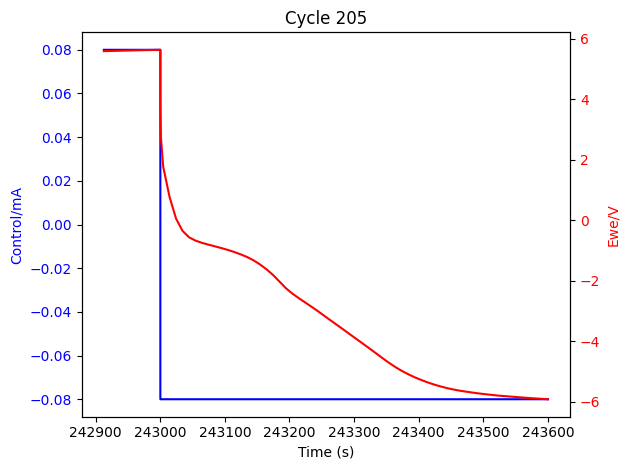

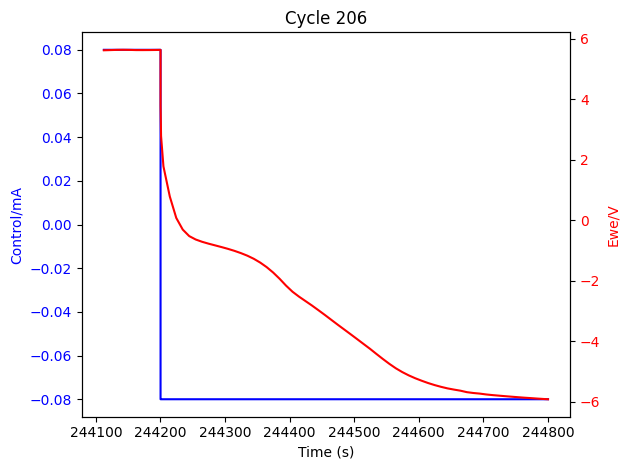

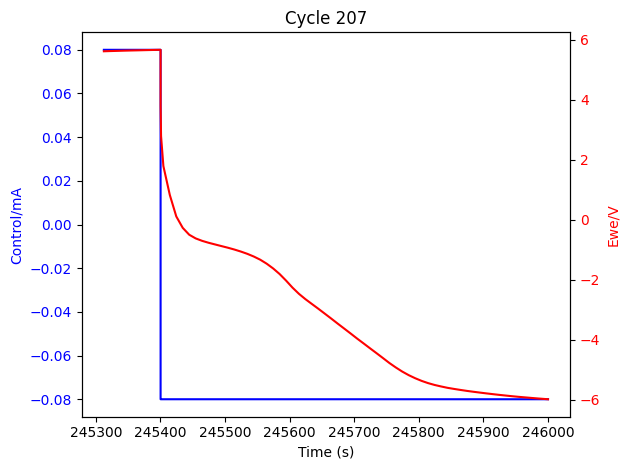

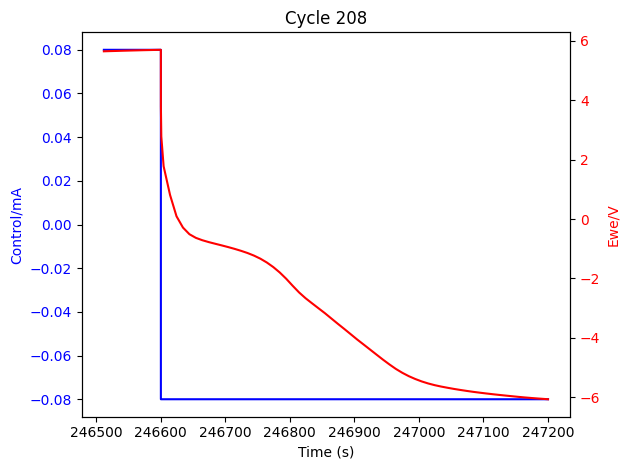

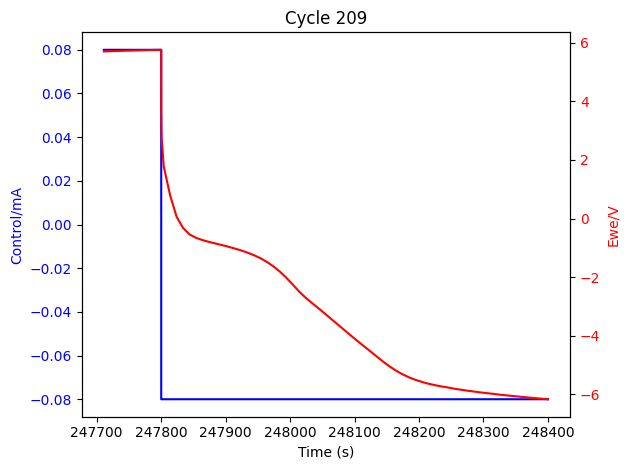

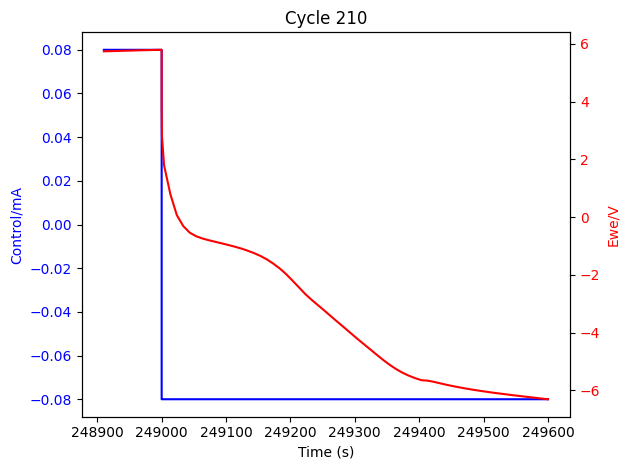

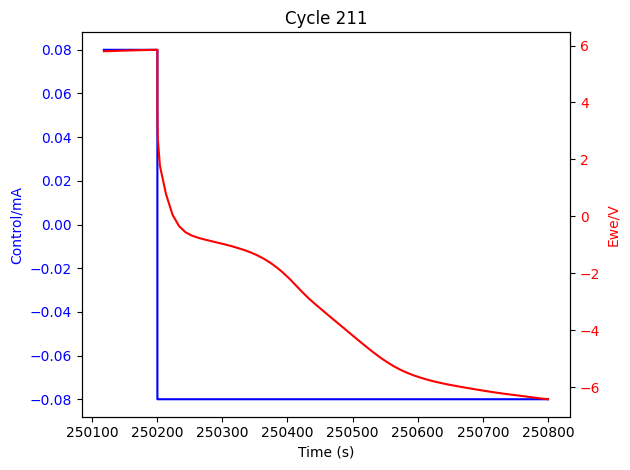

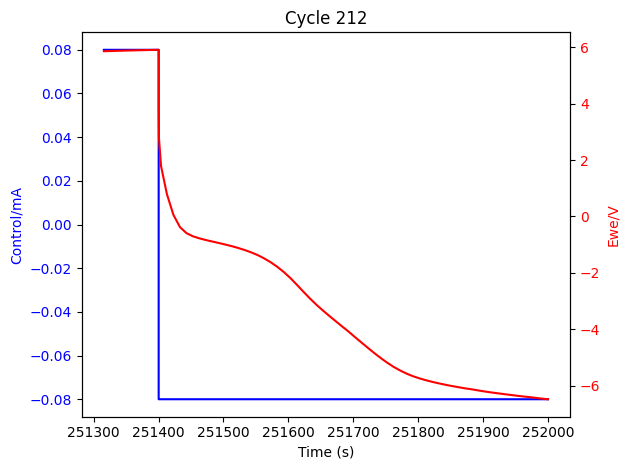

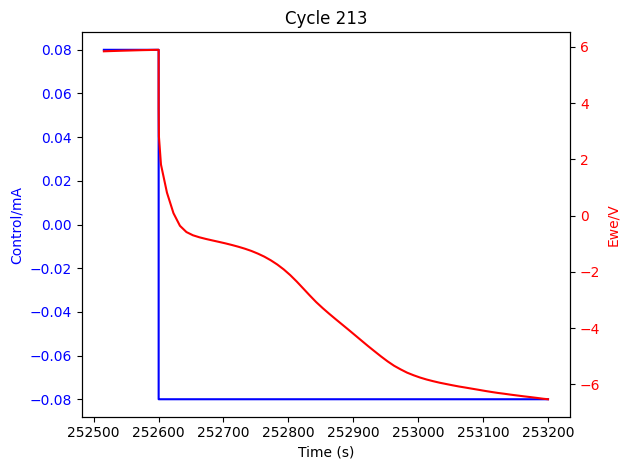

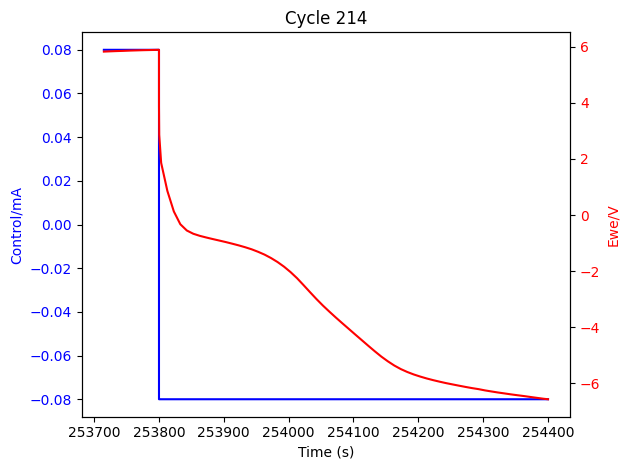

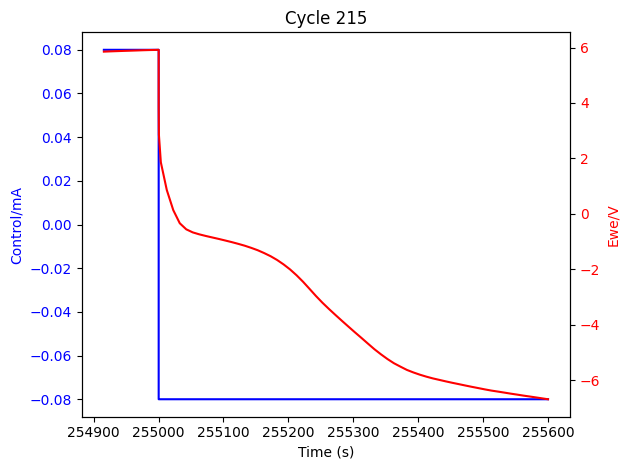

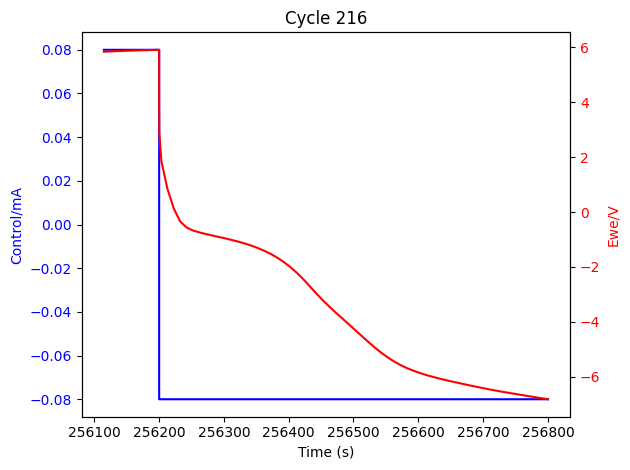

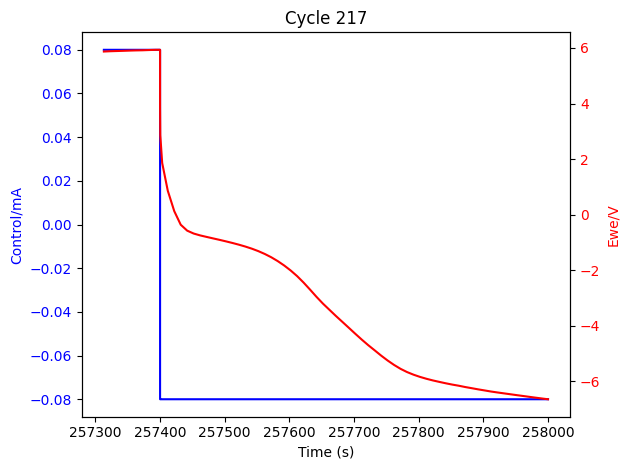

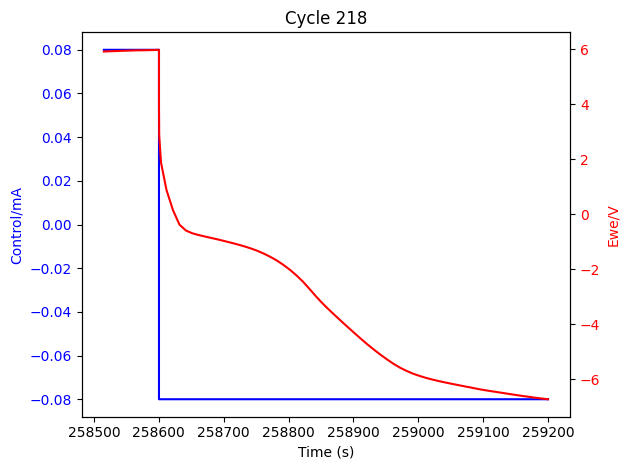

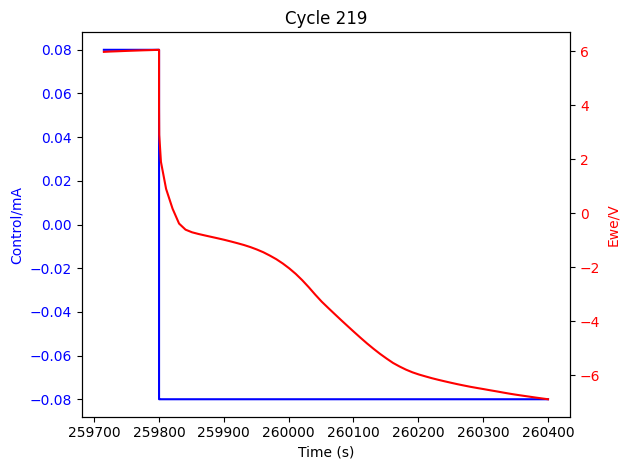

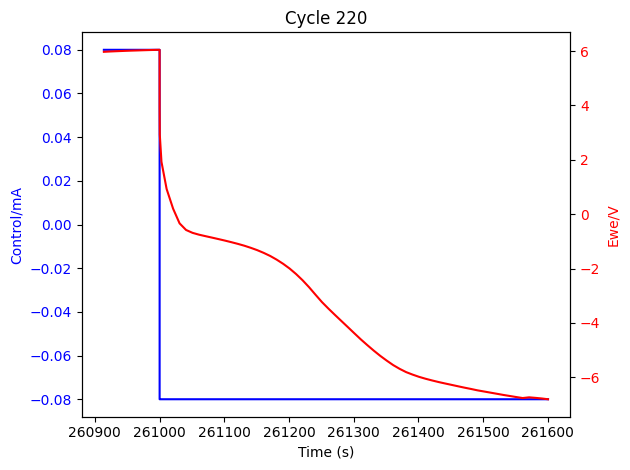

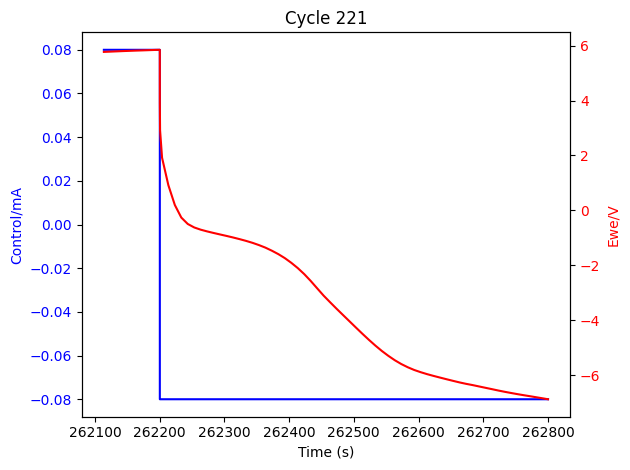

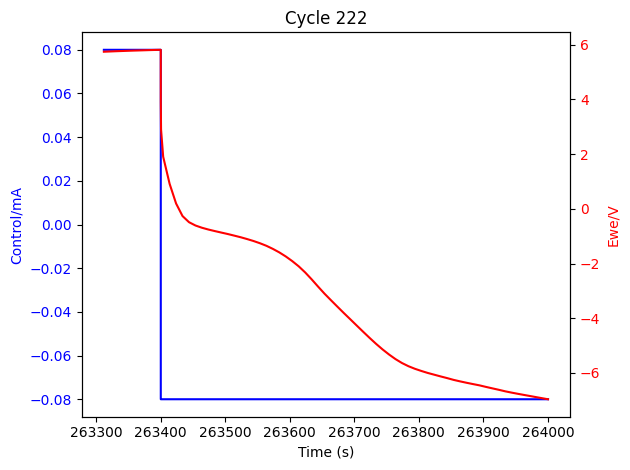

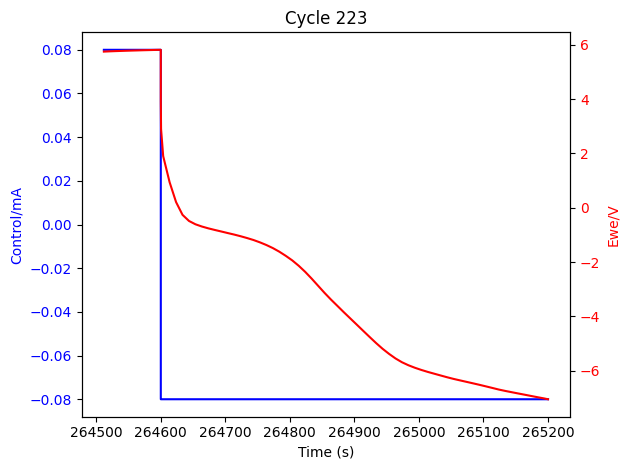

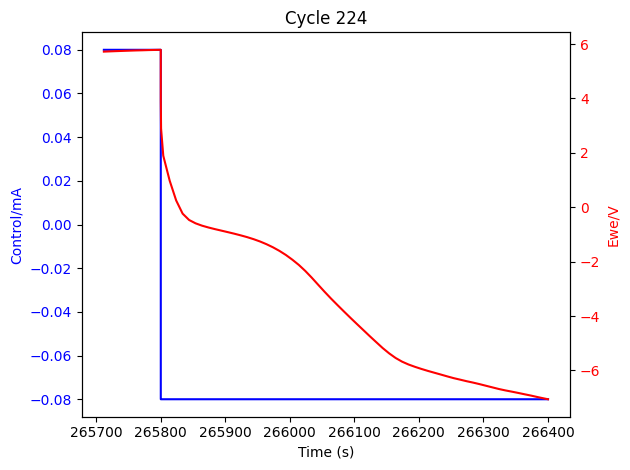

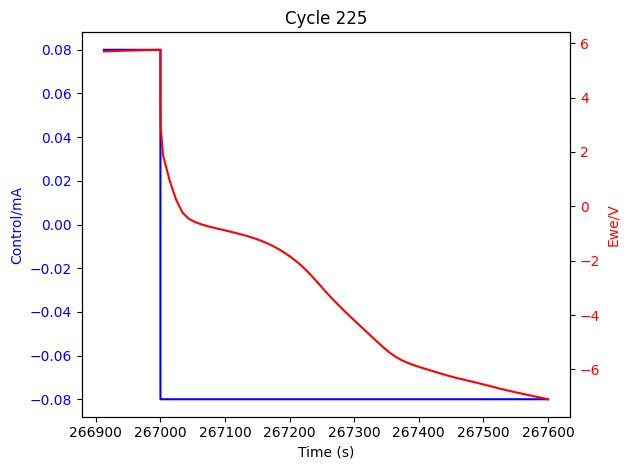

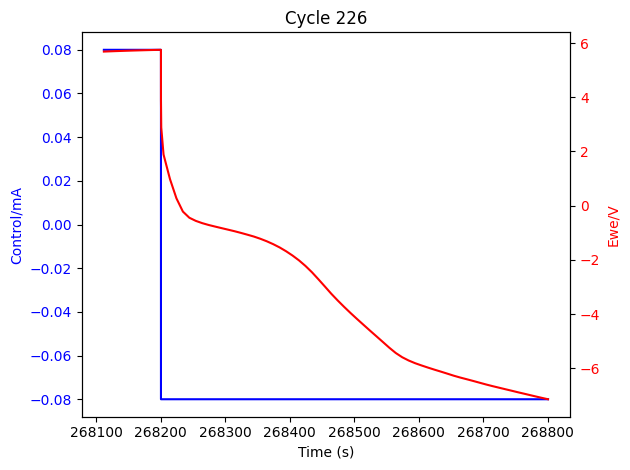

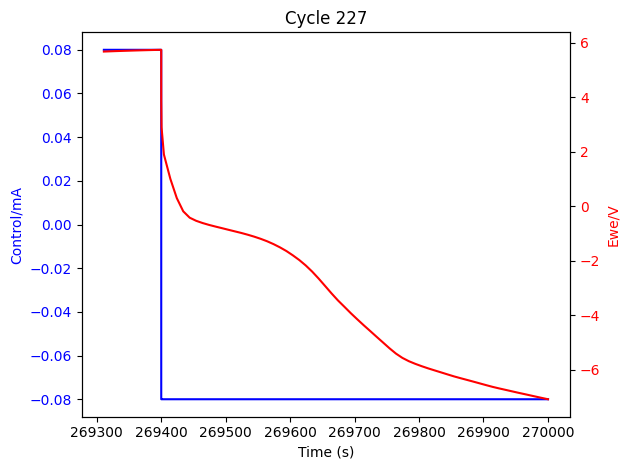

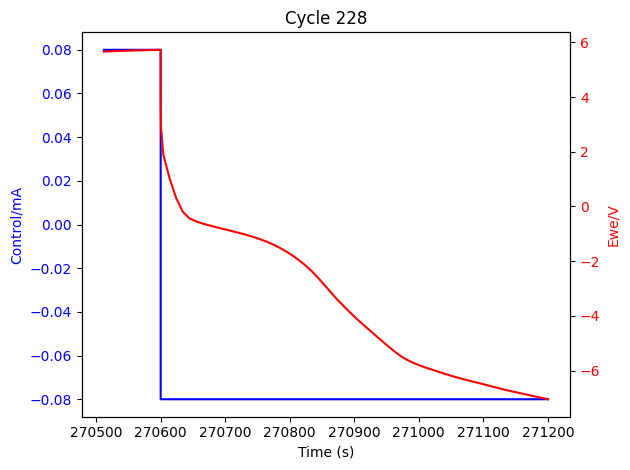

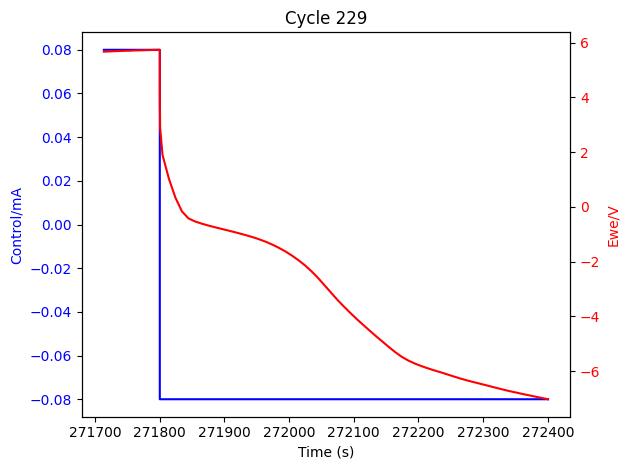

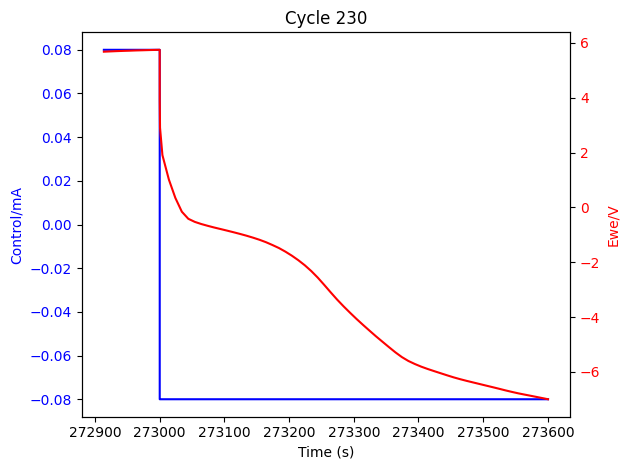

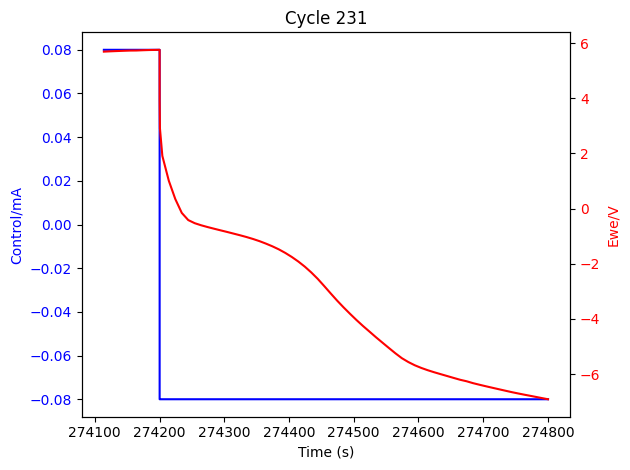

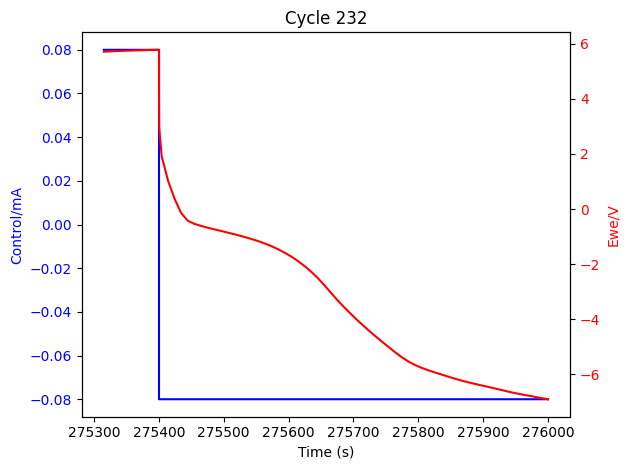

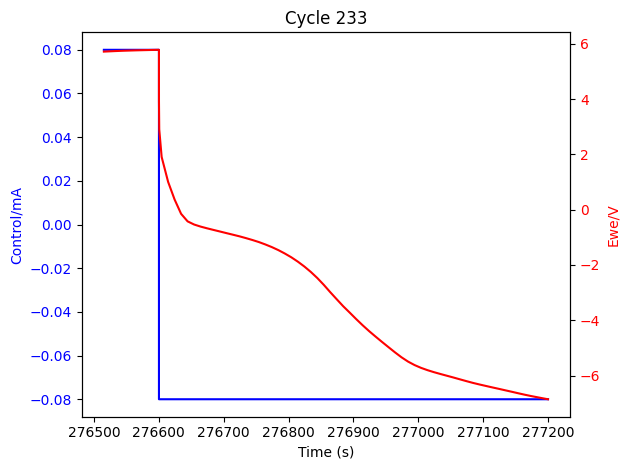

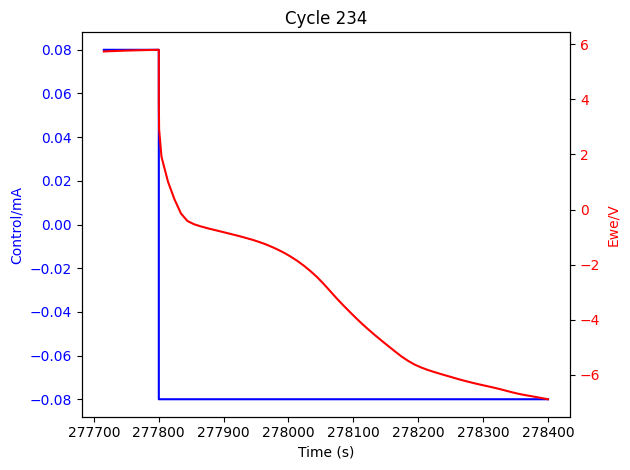

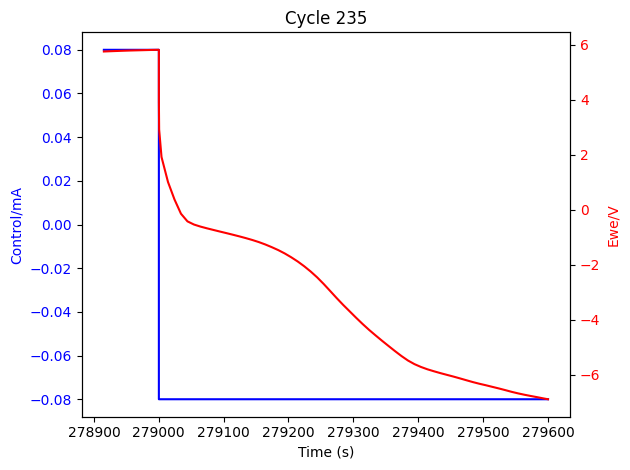

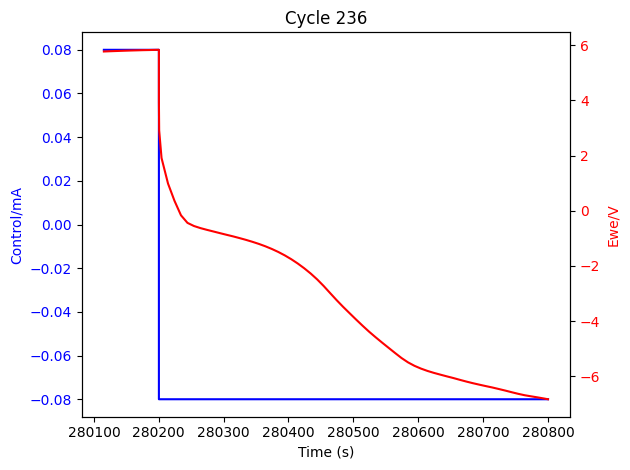

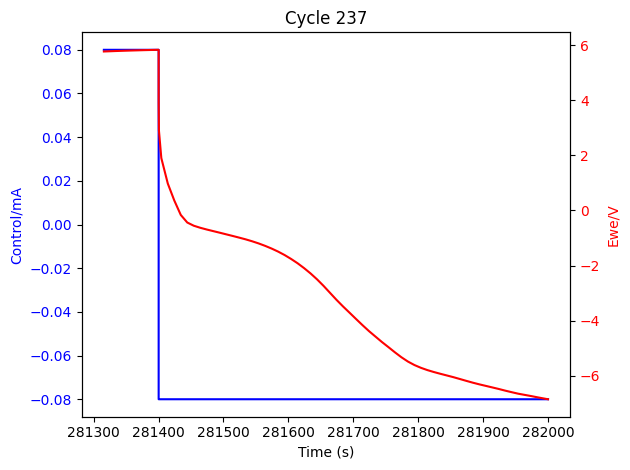

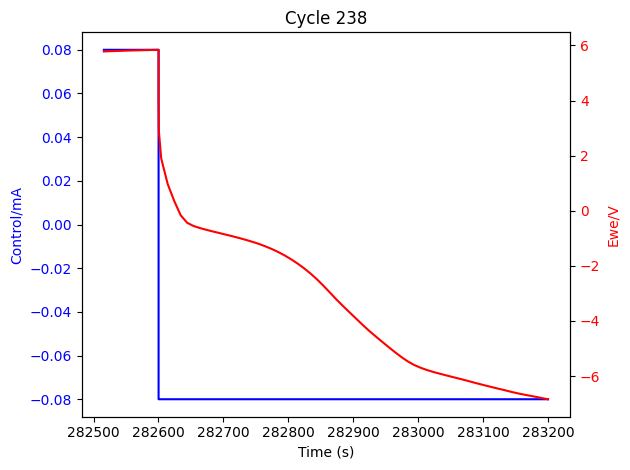

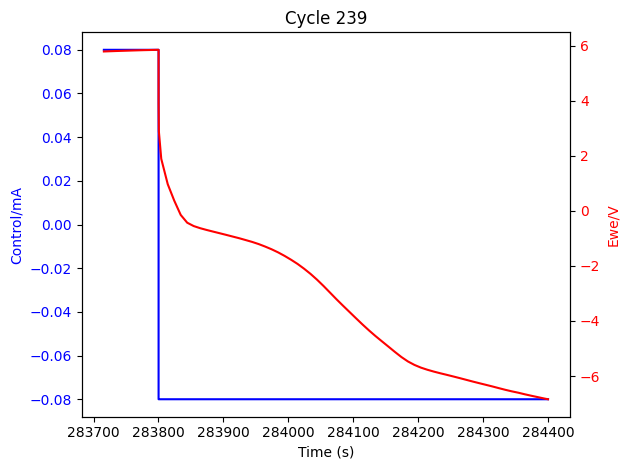

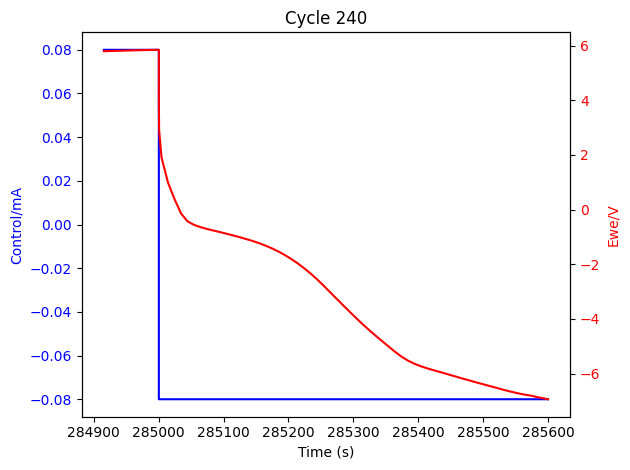

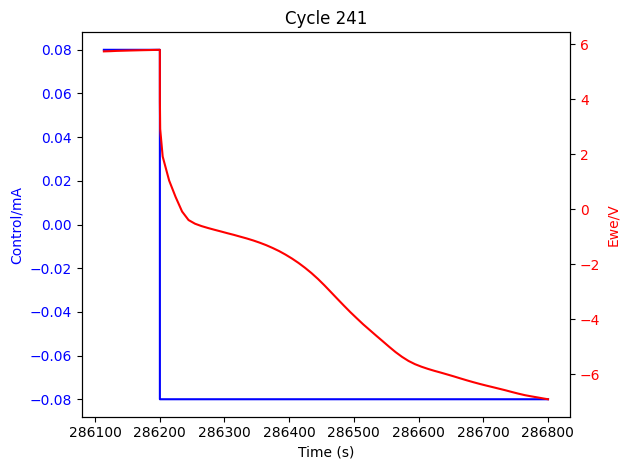

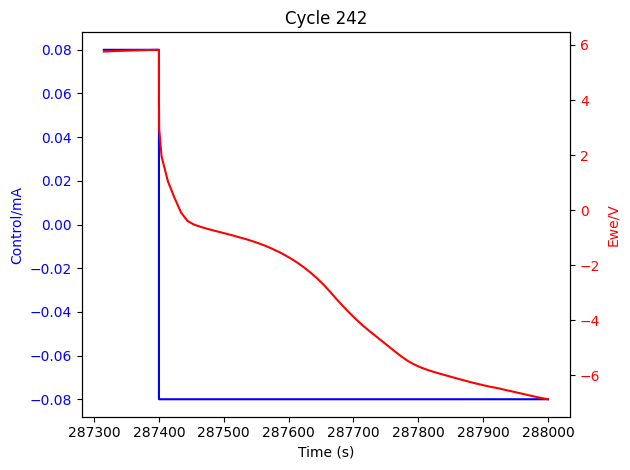

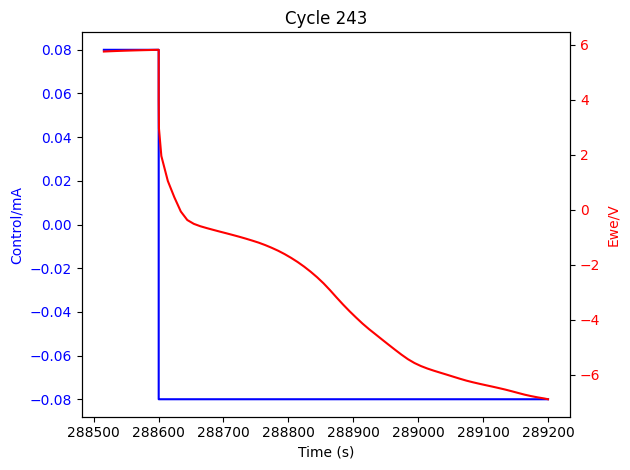

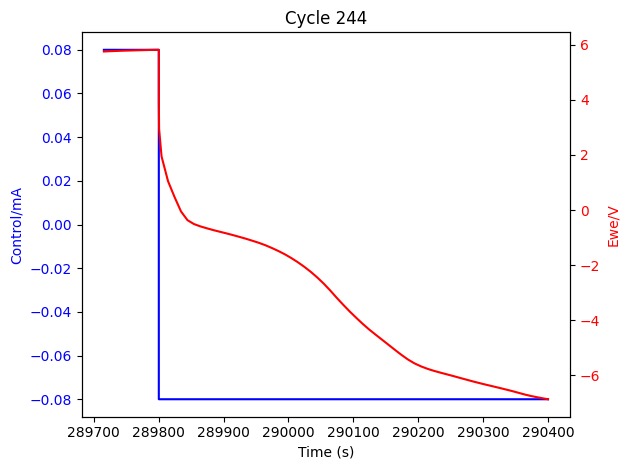

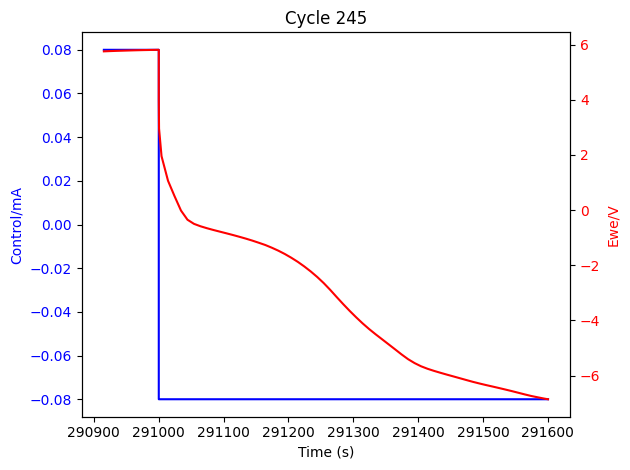

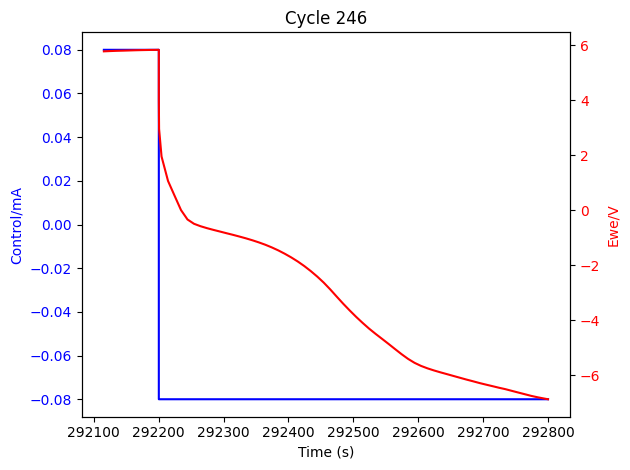

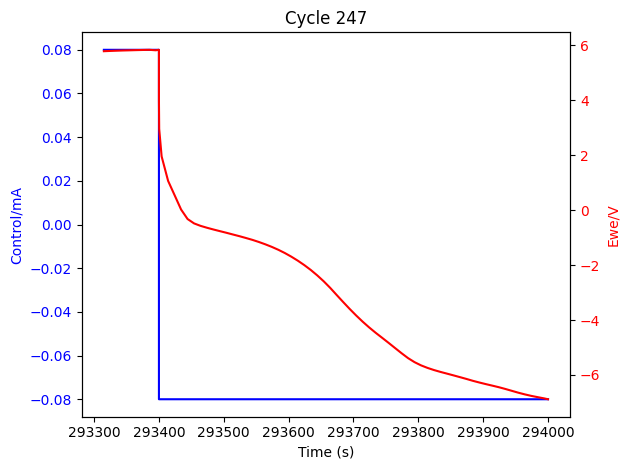

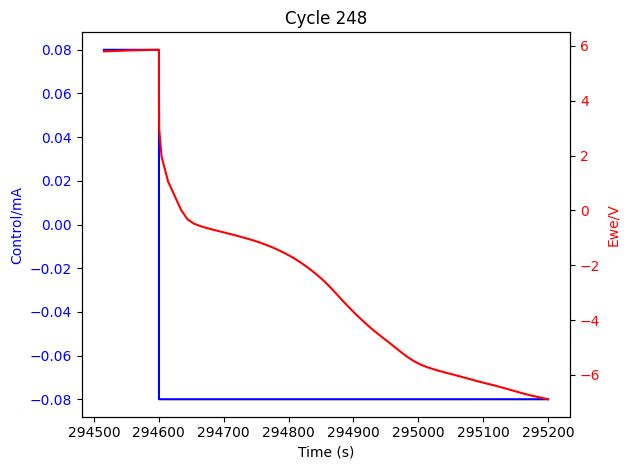

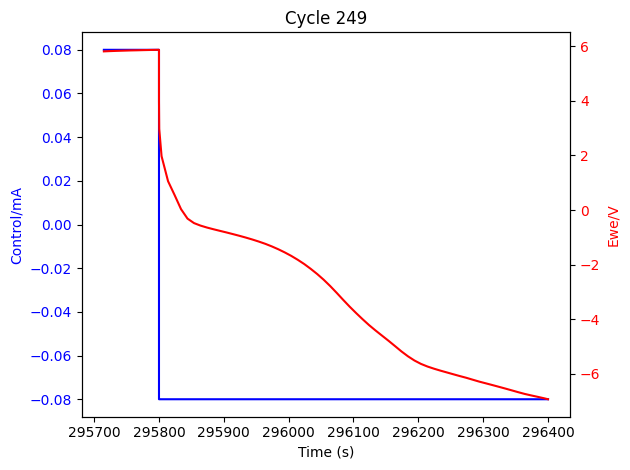

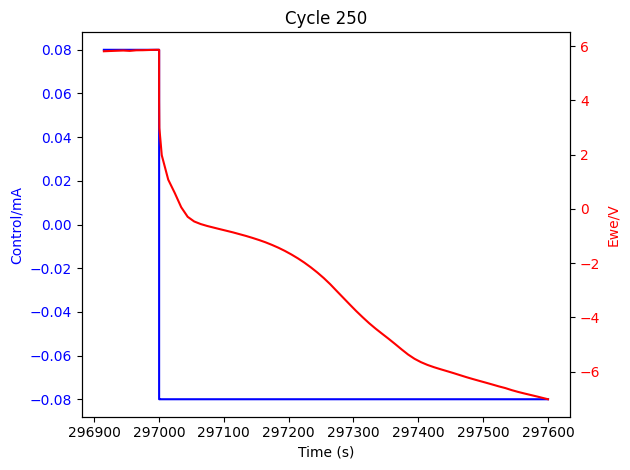

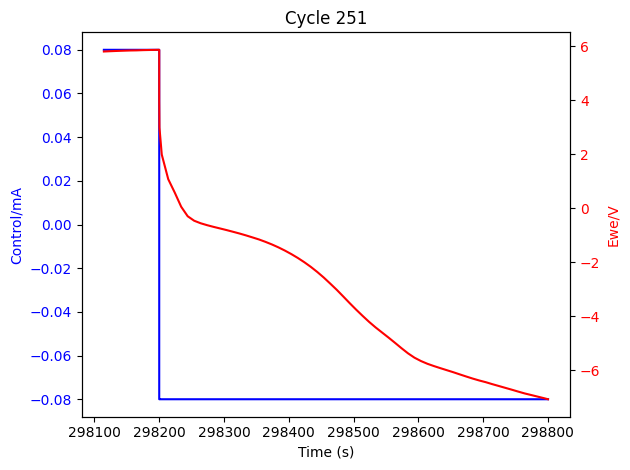

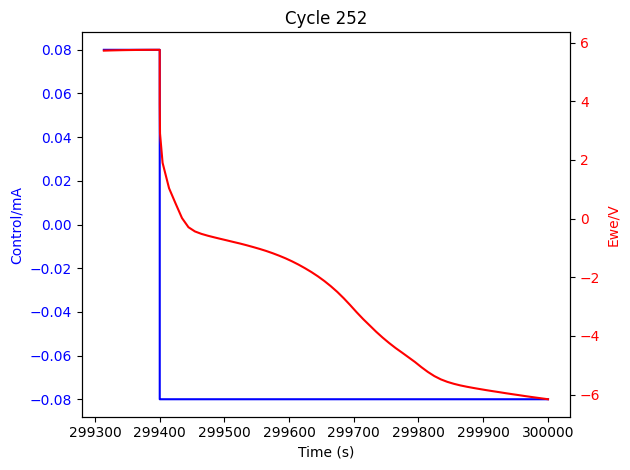

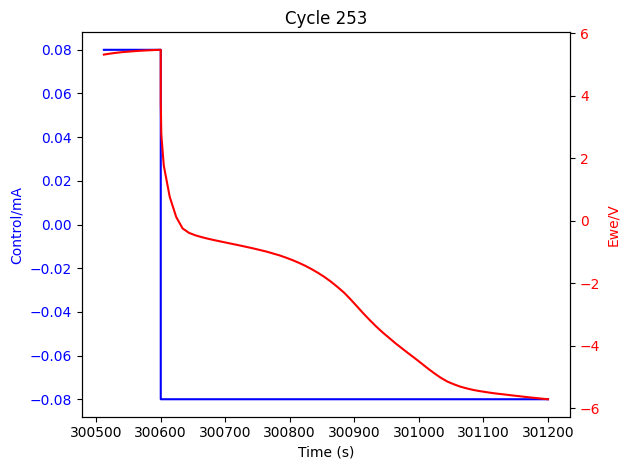

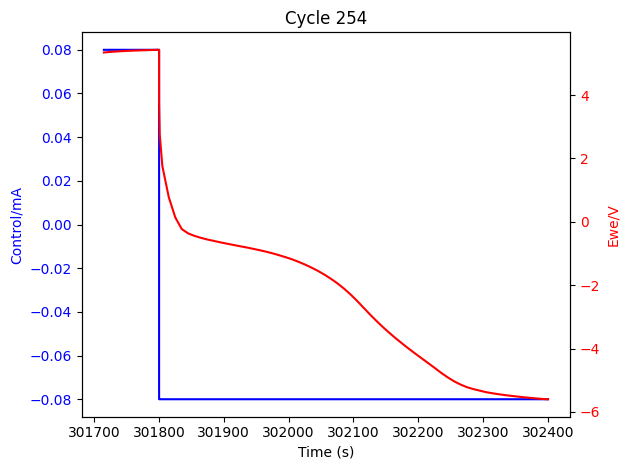

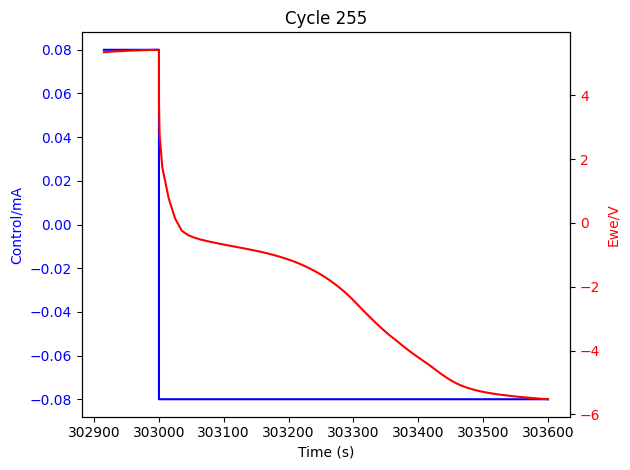

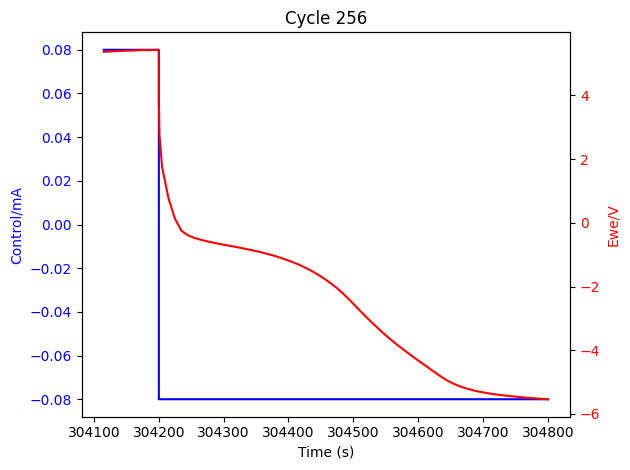

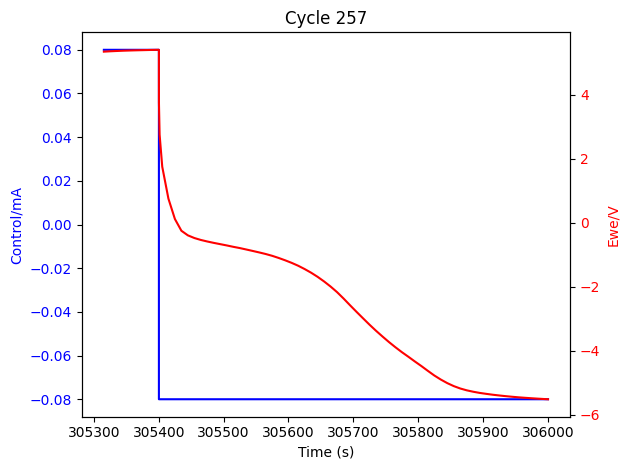

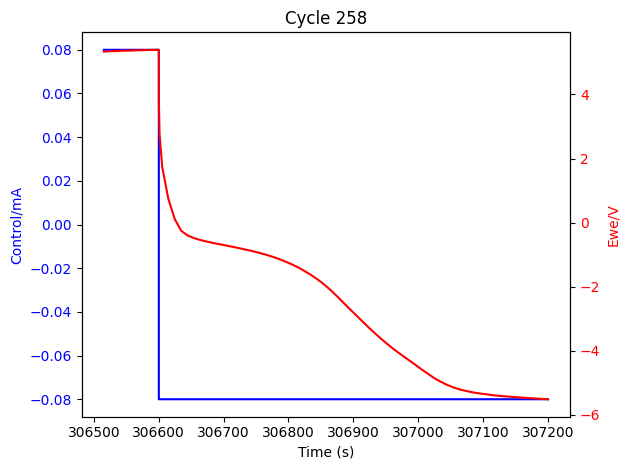

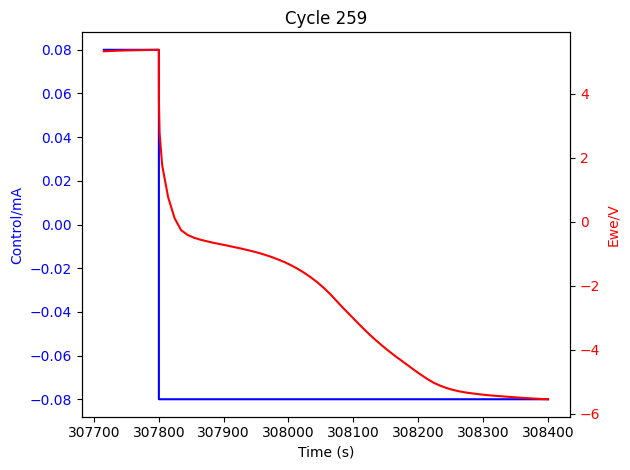

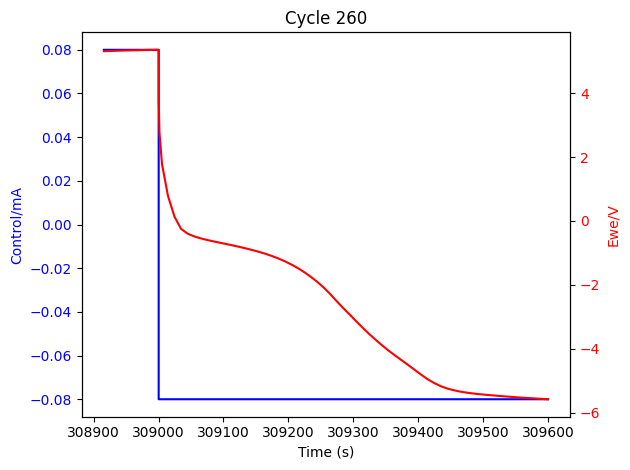

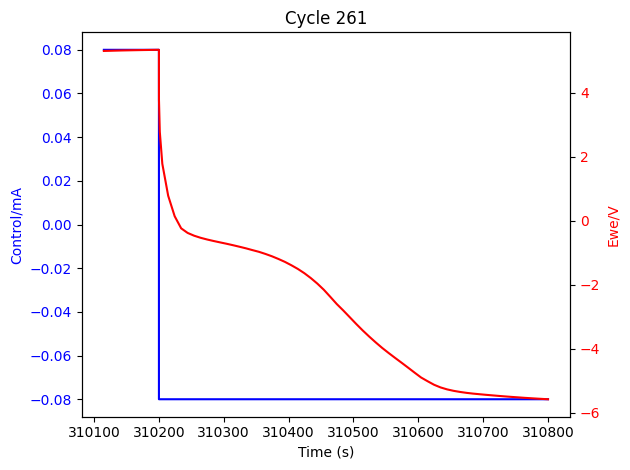

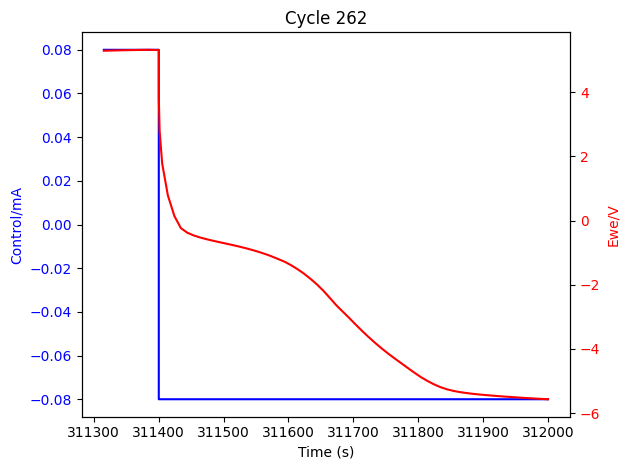

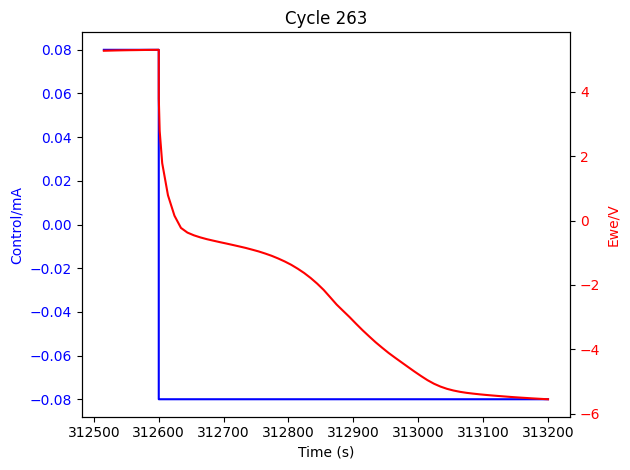

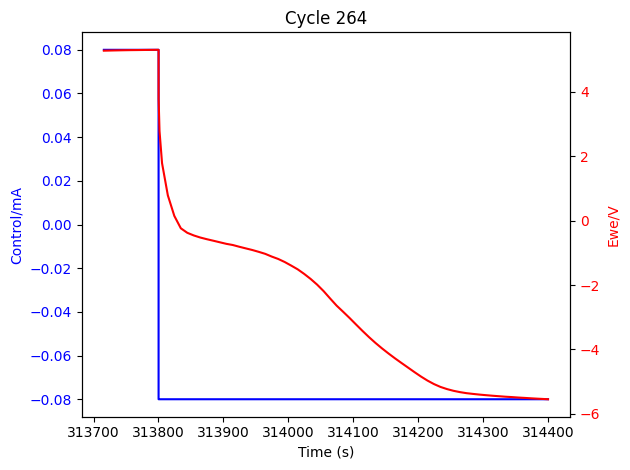

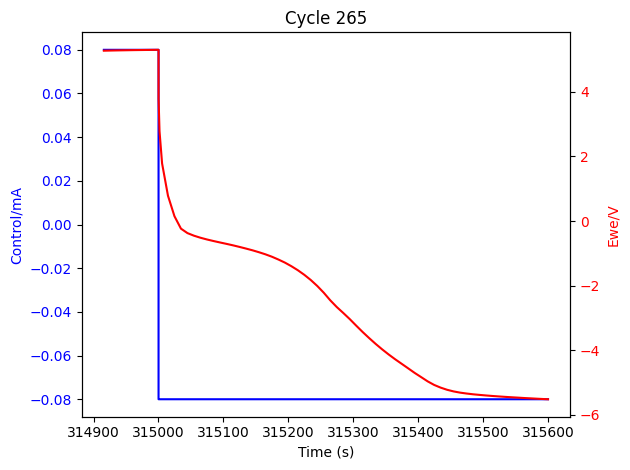

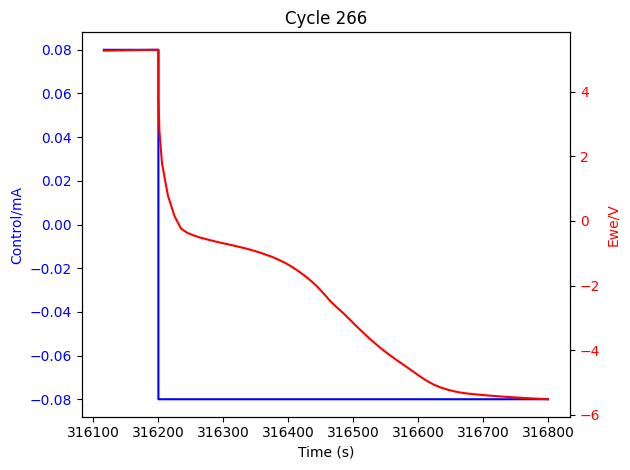

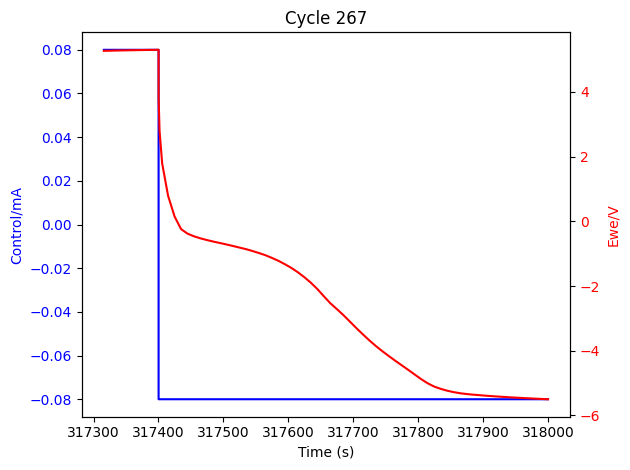

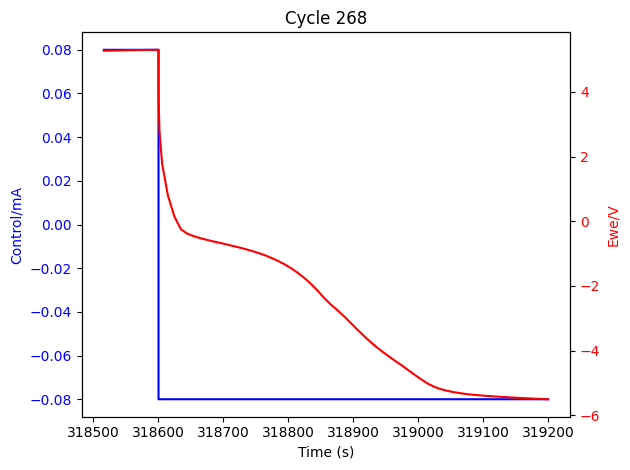

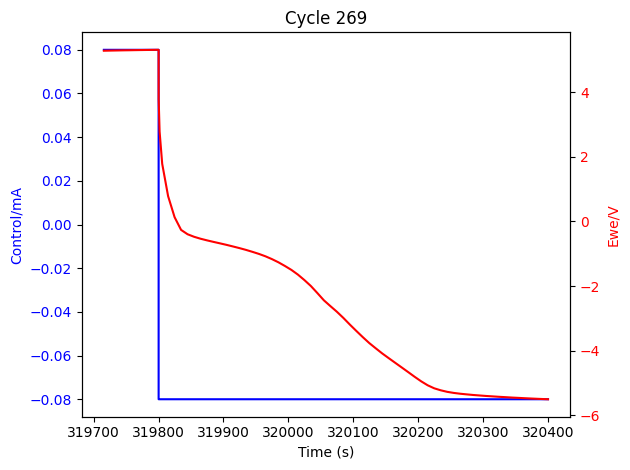

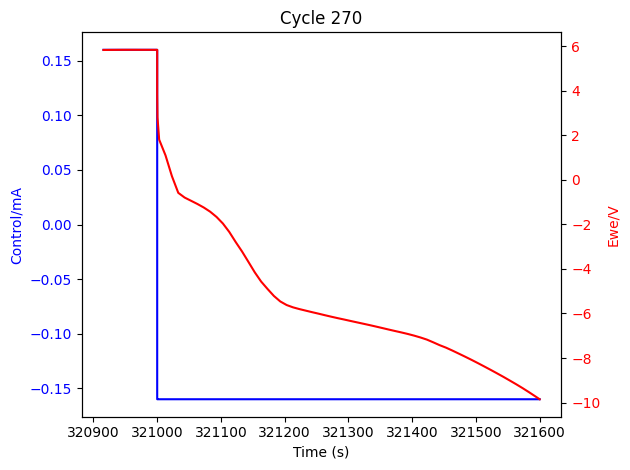

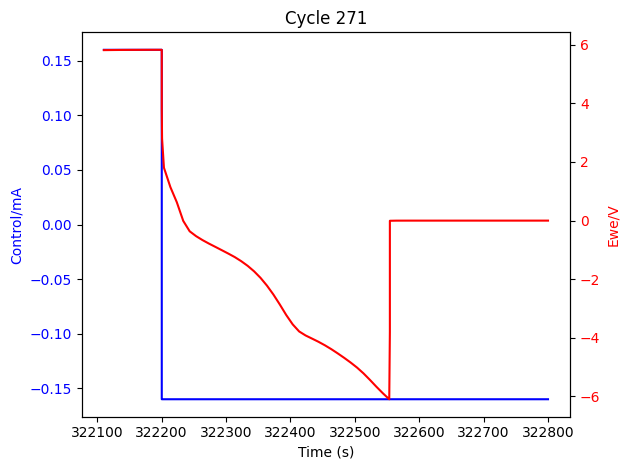

In [21]:
cycles = dp.find_discharging_cycles(df4)

# Plot the cycles
plot.plot_cycles(cycles)


In [22]:
df4.columns

Index(['control/mA', 'Ewe/V'], dtype='object')

In [23]:
# Run the find_charging_cycles function
charging_cycles = dp.find_discharging_cycles(df4)

# Extracting 'Ewe/V' and 'control/mA' for each cycle
yy = [cycle['Ewe/V'].values for cycle in charging_cycles]
uu = [cycle['control/mA'].values for cycle in charging_cycles]

In [24]:
# nf = 2
# nb = 2
# nc = 0
# nd = 0
# na = nf
# nk = 0

# # Initialize lists to store results
# theta_arx_list = []
# theta_bj_list = []
# optimization_results_list = []

# # Iterate through all arrays in yy and uu
# for i in range(0, len(yy)): # No need to skip the first cycle
#     uu[i] = uu[i] - uu[i][0] * np.ones(len(uu[i]))
#     yy[i] = yy[i] - yy[i][0] * np.ones(len(yy[i]))

#     # Calculate the ARX model parameters
#     n_arx = [nf, nb, nk]
#     theta_arx = sid.V_arx_lin_reg(n_arx, yy[i], uu[i])
    
#     # Store theta_arx in the list
#     theta_arx_list.append(theta_arx)
    
#     # Prepare initial guess for Box-Jenkins model
#     theta_box_jenkins = np.concatenate((
#         theta_arx[n_arx[0]:np.sum(n_arx)], 
#         np.zeros(nc + nd), 
#         theta_arx[0:n_arx[0]]
#     ))

#     # Define the structure for the Box-Jenkins model
#     n_bj = [nb, nc, nd, nf, nk]
    
#     # Perform optimization
#     optimization_results = sp.optimize.least_squares(
#         sid.V_box_jenkins, 
#         theta_box_jenkins, 
#         jac=sid.jac_V_bj, 
#         args=(n_bj, yy[i], uu[i])
#     )
    
#     # Store the optimization results in the list
#     optimization_results_list.append(optimization_results)

In [ ]:
nf = 3
nb = 4
nc = 0
nd = 0
na = nf
nk = 0

# Initialize lists to store results
theta_arx_list = []
theta_bj_list = []
optimization_results_list = []

# Iterate through all arrays in yy and uu
# for i in range(199, 200):
for i in range(1, 2): # Skip the first cycle
    uu[i] = uu[i] - uu[i][0] * np.ones(len(uu[i]))
    yy[i] = yy[i] - yy[i][0] * np.ones(len(yy[i]))

    # Calculate the ARX model parameters
    n_arx = [nf, nb, nk]
    n_bj = [nb, nc, nd, nf, nk]
    n_high_order_approx = [10,10]
    theta_init = sid.get_initial_estimate_box_jenkins(n_bj,n_high_order_approx, yy[i],uu[i])
    
    # Store theta_arx in the list
    theta_arx_list.append(theta_init)
    
    # Perform optimization
    optimization_results = sp.optimize.least_squares(
        sid.V_box_jenkins, 
        theta_init, 
        jac=sid.jac_V_bj, 
        args=(n_bj, yy[i], uu[i])
    )
    
    # Store the optimization results in the list
    optimization_results_list.append(optimization_results)

c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:141: RuntimeWarning: invalid value encountered in scalar multiply
  alpha = max(0.001 * alpha_upper, (alpha_lower * alpha_upper)**0.5)
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in square
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: invalid value encountered in divide
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\scipy\optimize\_lsq\common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
c:\USERS\ONYER\ONEDRIVE\D

In [27]:
print(optimization_results_list)

[     message: The maximum number of function evaluations is exceeded.
     success: False
      status: 0
         fun: [ 0.000e+00  2.271e-03 ... -5.949e+105  3.461e+107]
           x: [ 2.318e+03 -1.717e+03 -1.415e+03  8.450e+02  5.665e+01
               -8.824e+01  3.085e+01]
        cost: 5.992513358009891e+214
         jac: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
               [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
               ...
               [-2.535e+102  4.358e+100 ...  9.942e+103 -1.679e+102]
               [ 1.475e+104 -2.535e+102 ... -5.884e+105  9.942e+103]]
        grad: [ 5.107e+211 -8.779e+209  1.509e+208 -2.593e+206  1.205e+215
               -2.037e+213  3.442e+211]
  optimality: 1.2053470210297114e+215
 active_mask: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
                0.000e+00  0.000e+00]
        nfev: 700
        njev: 1,      message: The maximum number of function evaluations is exceeded.
     success: False
      st

In [28]:
# Lists to store x and cost values
x_values = []
cost_values = []

# Iterate through the optimization results
for result in optimization_results_list:
    x_values.append(result.x)
    cost_values.append(result.cost)
    
    # Print x and cost
    print("x:", result.x)
    print("cost:", result.cost)
    print()


x: [ 2317.51094723 -1717.45956284 -1414.79915562   845.04126228
    56.65435697   -88.24122067    30.85268696]
cost: 5.992513358009891e+214

x: [ 3068.92219198 -2449.85753113 -2123.85756655  1547.8260442
    61.04057858  -102.76871651    41.04245164]
cost: 8.195340103854098e+218

x: [  70.09307951 -146.59038915  239.07509716 -227.38324188   -1.70297488
    3.12174363   -2.30869031]
cost: 3137.3318135668305

x: [ 756.44866361 -302.38096454 -466.3962015    64.8702999    11.07396856
  -14.75620381    3.02078191]
cost: 7.548528646928605e+134

x: [ 722.46622539 -257.95151147 -403.99419346  -11.56594526   10.25467942
  -13.08023147    2.12233014]
cost: 8.067477471357306e+130

x: [1029.35887512 -315.83442517 -538.67276638  -98.15505353   15.18031365
  -17.97751042    2.24505639]
cost: 1.2428242602735263e+150

x: [1084.91454262 -315.96048326 -526.75970856 -165.4793465    15.95990999
  -18.51836803    1.98958703]
cost: 3.6443201966654344e+152

x: [1049.44340344 -288.28360156 -467.52146944 -209.

c:\USERS\ONYER\ONEDRIVE\DESKTOP\RESEARCH WORK\1. PROJECTS\BATTERY_ANALYSIS1\ENVENV\Lib\site-packages\numpy\_core\_methods.py:194: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


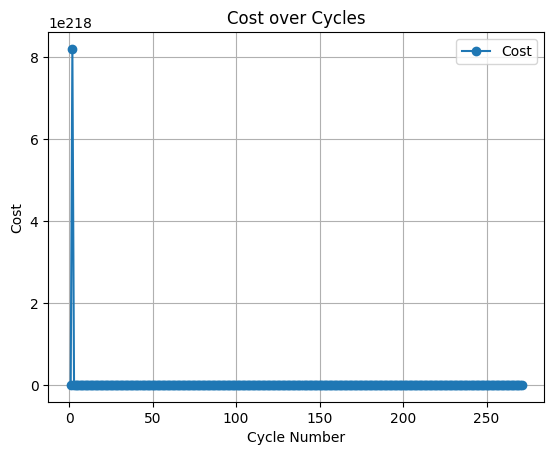

In [29]:
# Calculate mean and standard deviation of the cost values
mean_cost = np.mean(cost_values)
std_cost = np.std(cost_values)

# Calculate Z-scores
z_scores = [(cost - mean_cost) / std_cost for cost in cost_values]

# Threshold for identifying outliers (e.g., Z-score > 2)
threshold = 2
outliers = [(i + 1, cost_values[i], z_scores[i]) for i in range(len(z_scores)) if abs(z_scores[i]) > threshold]

# Print outliers
for cycle, cost, z_score in outliers:
    print(f"Outlier detected - Cycle: {cycle}, Cost: {cost:.2f}, Z-Score: {z_score:.2f}")

# Plot cost over cycles
plt.plot(range(1, len(cost_values) + 1), cost_values, marker='o', label='Cost')

# Highlight outliers
for cycle, cost, _ in outliers:
    plt.scatter(cycle, cost, color='red', label='Outlier' if cycle == outliers[0][0] else "")
    
plt.xlabel('Cycle Number')
plt.ylabel('Cost')
plt.title('Cost over Cycles')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Define sampling time
Ts = 0.005

# Loop through the arrays in yy and uu, skipping the first one
for i in range(1, len(yy)):
    # Extract the optimized parameters for the current cycle
    G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
        optimization_results_list[i-1].x, n_bj, Ts
    )
    
    # Print the transfer function
    print(f"Cycle {i}: G_hat_box_jenkins")
    print(G_hat_box_jenkins)
    
    # Print zeros and poles
    print(f"Cycle {i}: Zeros")
    print(G_hat_box_jenkins.zeros())
    print(f"Cycle {i}: Poles")
    print(G_hat_box_jenkins.poles())
    
    # Simulate the system's response using the identified transfer function
    tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[i])
    
    # Plot measured vs. simulated output and input on two y-axes
    fig, ax1 = plt.subplots()

    # Plot measured and simulated output on the left y-axis
    ax1.plot(yy[i], 'b-', label='Measured')
    ax1.plot(y_sim, 'g-', label='Simulated')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Voltage', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.legend(loc='center right')  # Legend location: middle right

    # Create a second y-axis for the input (control/mA)
    ax2 = ax1.twinx()
    ax2.plot(uu[i], 'r-', label='Input (control/mA)')
    ax2.set_ylabel('Control/mA', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.legend(loc='lower right')  # Legend location: lower right

    # Add title
    plt.title(f'Measured vs. Simulated Outputs and Input for Cycle {i}')
    
    # Adjust layout to avoid overlapping labels
    fig.tight_layout()

    # Show the plot
    plt.show()

    # Bode plot for the identified transfer function
    out = ct.bode_plot(G_hat_box_jenkins)


In [ ]:
# out=ct.bode_plot(G_hat_box_jenkins)

In [ ]:
# # # Iterate through all cycles, skipping the first one
# # for i in range(1, len(yy)):
# #     # Define t0
# #     t0 = 10
    
# #     # Simulate the system's response using the identified transfer function
# #     tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[i])
    
# #     # Ensure both yy[i] and y_sim have the same length after t0
# #     min_len = min(len(yy[i][t0:-1]), len(y_sim[t0:-1]))
    
# #     # Calculate the error (epsilon) between measured and simulated outputs
# #     epsilon = yy[i][t0:t0+min_len] - y_sim[t0:t0+min_len]
    
# #     # Plot the error
# #     fig, ax = plt.subplots(1)
# #     ax.plot(epsilon)
# #     ax.set_title(f'Error (epsilon) for Cycle {i}')
# #     ax.set_xlabel('Time (s)')
# #     ax.set_ylabel('Error (Measured - Simulated)')
# #     plt.show()
    
# #     # Perform auto-correlation test on the error signal
# #     sid.auto_correlation_test(epsilon, tau=20)


# # Iterate through all cycles, skipping the first one
# for i in range(1, len(yy)):
#     # Define t0
#     t0 = 10
    
#     # Simulate the system's response using the identified transfer function
#     tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[i])
    
#     # Ensure both yy[i] and y_sim have the same length after t0
#     yy_i_sliced = yy[i][t0:-1]  # Slice yy[i] starting from t0
#     y_sim_sliced = y_sim[t0:-1]  # Slice y_sim starting from t0
#     min_len = min(len(yy_i_sliced), len(y_sim_sliced))
    
#     # Adjust yy_i_sliced and y_sim_sliced to have the same length
#     yy_i_sliced = yy_i_sliced[:min_len]
#     y_sim_sliced = y_sim_sliced[:min_len]
    
#     # Calculate the error (epsilon) between measured and simulated outputs
#     epsilon = yy_i_sliced - y_sim_sliced
    
#     # Plot the error
#     fig, ax = plt.subplots(1)
#     ax.plot(epsilon)
#     ax.set_title(f'Error (epsilon) for Cycle {i}')
#     ax.set_xlabel('Time (s)')
#     ax.set_ylabel('Error (Measured - Simulated)')
#     plt.show()
    
#     # Perform auto-correlation test on the error signal
#     sid.auto_correlation_test(epsilon, tau=20)


In [ ]:
# sid.auto_correlation_test(epsilon,tau=20)

In [ ]:
# Define sampling time
Ts = 0.005

# Function to process a single cycle
def process_cycle(cycle_num, nb, nf):
    nc = 0
    nd = 0
    na = nf
    nk = 0
    
    # Adjust input and output signals
    uu[cycle_num] = uu[cycle_num] - uu[cycle_num][0] * np.ones(len(uu[cycle_num]))
    yy[cycle_num] = yy[cycle_num] - yy[cycle_num][0] * np.ones(len(yy[cycle_num]))

    # Calculate the ARX model parameters
    n_arx = [nf, nb, nk]
    theta_arx = sid.V_arx_lin_reg(n_arx, yy[cycle_num], uu[cycle_num])
    
    # Prepare initial guess for Box-Jenkins model
    theta_box_jenkins = np.concatenate((
        theta_arx[n_arx[0]:np.sum(n_arx)], 
        np.zeros(nc + nd), 
        theta_arx[0:n_arx[0]]
    ))

    # Define the structure for the Box-Jenkins model
    n_bj = [nb, nc, nd, nf, nk]
    
    # Perform optimization
    optimization_results = sp.optimize.least_squares(
        sid.V_box_jenkins, 
        theta_box_jenkins, 
        jac=sid.jac_V_bj, 
        args=(n_bj, yy[cycle_num], uu[cycle_num])
    )
    
    # Extract the optimized parameters
    G_hat_box_jenkins, H_hat_box_jenkins = sid.theta_2_tf_box_jenkins(
        optimization_results.x, n_bj, Ts
    )
    
    # Print the transfer function, zeros, and poles
    print(f"Cycle {cycle_num}: G_hat_box_jenkins")
    print(G_hat_box_jenkins)
    print(f"Cycle {cycle_num}: Zeros")
    print(G_hat_box_jenkins.zeros())
    print(f"Cycle {cycle_num}: Poles")
    print(G_hat_box_jenkins.poles())
    
    # Simulate the system's response
    tt, y_sim = ct.forced_response(G_hat_box_jenkins, U=uu[cycle_num])
    
    # Plot measured vs. simulated output with input on a secondary y-axis
    fig, ax1 = plt.subplots()
    
    # Primary y-axis (left): Measured and Simulated outputs
    ax1.plot(yy[cycle_num], label='Measured', color='blue')
    ax1.plot(y_sim, label='Simulated', color='orange')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Voltage')
    ax1.legend(loc='upper left')
    
    # Secondary y-axis (right): Input
    ax2 = ax1.twinx()
    ax2.plot(uu[cycle_num], label='Input', color='green')
    ax2.set_ylabel('Control (mA)')
    ax2.legend(loc='upper right')
    
    # Title
    plt.title(f'Measured vs. Simulated Outputs and Input for Cycle {cycle_num}')
    
    # Show plot
    plt.show()
    
    # Bode plot
    ct.bode_plot(G_hat_box_jenkins)

# Process cycle 5 with nb=2, nf=3 (2nd order model)
process_cycle(5, nb=2, nf=3)

# Process cycle 5 with nb=3, nf=4 (better fit)
process_cycle(5, nb=3, nf=4)

# Process cycle 102 with nb=2, nf=3 (showing degradation)
process_cycle(102, nb=2, nf=3)

# Process cycle 126 (unstable model fit)
process_cycle(126, nb=2, nf=3)
